# Social Network Analysis - Amber Heard Case - CrossPlatformAnalysis
MAHMOUD NAGY - JUNE 2022

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> CrossPlatformAnalysis - Social Network Analysis on Amber Heard's Case 

In [1]:
import pandas as pd
import os
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sb
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import pickle
import re
import warnings
import datetime
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")
%matplotlib inline

import plotly.io as pio
pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550


# To Apply helpers updates without resarting the kernel
import importlib
import helpers
importlib.reload(helpers)

from load_data import *

# # To keep track of any module updates
# %load_ext autoreload
# %autoreload2

%config InlineBackend.figure_format = 'retina'

In [2]:
print(tweets.shape)
tweets.head(1)

(1720317, 31)


n_statuses          created_at  \
0       59595 2018-01-01 00:21:13   

                                    user_description     user_created_at  \
0  today in #3Dprint\n#hadronscollider\n#medtech\... 2016-07-09 16:08:42   

              user_id          username  is_verified user_location  \
0  751810315759693824  americaearnmoney        False       america   

   n_followers user_url lang  \
0         5983      NaN   en   

                                  profile_banner_url  \
0  https://pbs.twimg.com/profile_banners/75181031...   

                                   profile_image_url  \
0  http://pbs.twimg.com/profile_images/7518904223...   

                                                text  n_friends  \
0  tv news: amber heard and elon musk are spendin...       6021   

             tweet_id user_screen_name       date  year month  dayofmonth  \
0  947623710281871360  americearnmoney 2018-01-01  2018   Jan           1   

   hour               diff  days_diff  minutes_diff  retweet_count  \
0     0  540 days 08:12:31        540        492.52            0.0   

   reply_count  like_count  quote_count  total_retweets  tweets_interactions  
0          0.0         0.0          0.0             0.0                  0.0

In [3]:
print(youtube_comments.shape)
youtube_comments.head(1)

(6251459, 21)


video_id                 comment_etag                  comment_id  \
108078  wT3RhIJZu4k  k3aisQ61gTt1ShrvAOZM2hF2TLA  Ugwoqs1OcEGmGAdARJF4AaABAg   

                                                     text          username  \
108078  wow that's what i call a master! after every s...  Shakera Williams   

                    author_ch_id  nlikes                   p_dtime  \
108078  UCRPA3NvO8zjCBJVbeg-QPmw       0 2018-01-01 00:31:41+00:00   

                     u_dtime  nreplies  \
108078  2018-01-01T00:31:41Z         0   

       snippet.topLevelComment.snippet.moderationStatus\r comment_reply  \
108078                                                 \r       comment   

       parent_id author_ch_url author_profile_image moderation_status  \
108078      none          none                 none               NaN   

              date  year month  dayofmonth  hour  
108078  2018-01-01  2018   Jan           1     0

In [4]:
print(youtube_videos.shape)
youtube_videos.head(1)

(7360, 22)


etag           id                   p_dtime  \
7078  IYKu2Dsjy0k394xABy13omQUVdU  eNmYd42UYHg 2018-01-01 09:23:04+00:00   

                         ch_id  \
7078  UChJk7sDal5ajRRtx15hxMEA   

                                                  title  \
7078  Amber Heard And Elon Musk Vacation Together In...   

                                            description          ch_title  \
7078  Amber Heard And Elon Musk Vacation Together In...  The Gossip Story   

                                           snippet.tags        category  \
7078  ['amber heard and elon musk back together', 'a...  People & Blogs   

     language audio_language contentDetails.duration  is_licensed  n_views  \
7078    en-US            NaN                 PT2M20S        False     93.0   

      n_likes  n_comments       date  year month  dayofmonth  hour  \
7078      2.0         0.0 2018-01-01  2018   Jan           1     9   

      youtube_videos_interactions  
7078                         95.0

In [5]:
print(instagram_comments.shape)
instagram_comments.head(1)

(1434395, 19)


message            datetime                 id  n_replies  \
686542  見とれますね(笑)😁❗ 2018-01-14 12:14:02  17893409533187748        1.0   

        n_likes             media_id parent_id     user_id      username  \
686542      1.0  1692013694866470912         n  6115944446  hiro.68.9.29   

        is_verified                             account_url  year month  \
686542        False  https://www.instagram.com/hiro.68.9.29  2018   Jan   

        dayofmonth       date  hour  clean_text           tokens  \
686542          14 2018-01-14    12  見とれますね(笑)❗  {'見とれますね', '笑'}   

        instagram_comments_interactions  
686542                              2.0

In [6]:
# print(reddit_contributions.reset_index(drop=True).permalink.iloc[11])
# reddit_contributions.reset_index(drop=True).head(20)

In [7]:
print(reddit_contributions.shape)
reddit_contributions.head(1)

(177384, 30)


child_id                                          permalink  \
0  t1_ds0ns4c  /r/JerkOffToCelebs/comments/7nbhsf/amber_heard...   

                                                text  parent_id  \
0  She is giving you that look to put it in her a...  t3_7nbhsf   

           subreddit          created_at sentiment_blob sentiment_nltk  score  \
0  r/JerkOffToCelebs 2018-01-01 00:14:23        Neutral       Positive    8.0   

    top_level submission_comment  \
0  submission            comment   

                                 submission_text removed_deleted  \
0  amber_heard_would_be_such_a_dirty_slut_in_bed          others   

       user_name  has_verified_email  is_mod  is_gold  is_banned  \
0  Contractzzz95               False   False    False      False   

   comment_karma  link_karma     user_created_at banned_unverified  \
0         2465.0       846.0 2017-02-09 09:52:42        unverified   

  creation_year               diff  days_after_creation  year        date  \
0        others  325 days 14:21:41                325.0  2018  2018-01-01   

  month  dayofmonth  hour  
0   Jan           1     0

- **`reddit_contributions_score = upvotes - downvotes`** (for the comment or submission)
- **comment_karma**: author total comments karma
- **link_karma**: author total posts karma

---

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

|Platform | Color|
|:-|:-|
|Twitter| <font color='blue'>Blue</font>|
|YouTube| <font color='orange'>Orange</font>|
|Instagram| <font color='green'>Green</font>|
|Reddit| <font color='red'>Red</font>|

## <a id='over_time'></a>
> ## Exploring Contributions OVER TIME
> <ul>
 <li><a href="#over_time"><b>Contributions OVER TIME</b></a></li>
 <li><a href="#interactions_over_time">Interactions OVER TIME</a></li>
 <li><a href="#top_text">Most Repeated Text</a></li>
 <li><a href="#top_users">Top Commented Users</a></li>
 </ul>

<a id='all_days'></a>
>>### CrossPlatforms Contributions TimeSeries
> <ul>
 <li><a href="#all_days"><b>CrossPlatforms Contributions TimeSeries</b></a></li>
 <li><a href="#all_years">CrossPlatforms Contributions over Years</a></li>
 <li><a href="#all_months">CrossPlatforms Contributions over Months</a></li>
 <li><a href="#over_days">CrossPlatforms Contributions in Each Day</a></li>
 </ul>

In [8]:
df_days = df_creations.groupby('date')['n_tweets', "youtube_comments", "instagram_comments", 'reddit_contributions'].sum().reset_index()
# df_days.head()

>>**Note**
>- Twitter and Youtube have the most peaks in 2022 

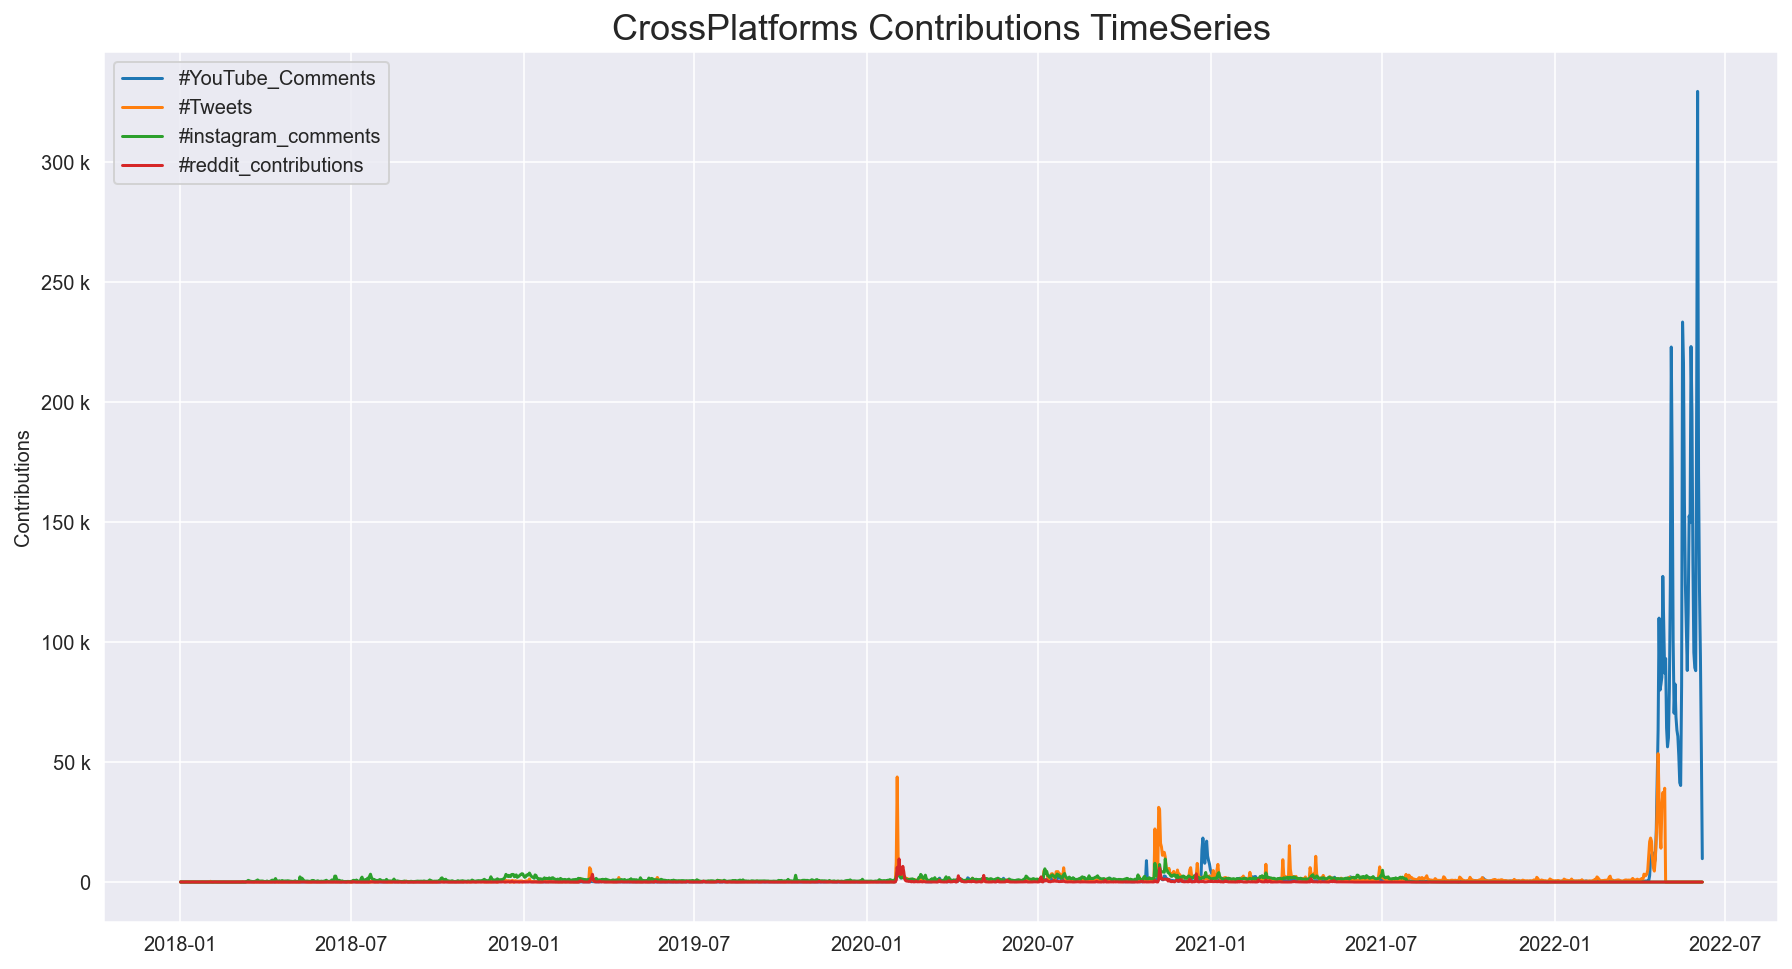

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(df_days['date'], df_days["youtube_comments"], label="#YouTube_Comments");
plt.plot(df_days['date'], df_days["n_tweets"], label="#Tweets");
plt.plot(df_days['date'], df_days["instagram_comments"], label="#instagram_comments");
plt.plot(df_days['date'], df_days["reddit_contributions"], label="#reddit_contributions");

plt.ylabel('Contributions')
plt.title("CrossPlatforms Contributions TimeSeries", fontsize=18)
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))
ax.yaxis.set_major_formatter(tkr.EngFormatter())
plt.legend();

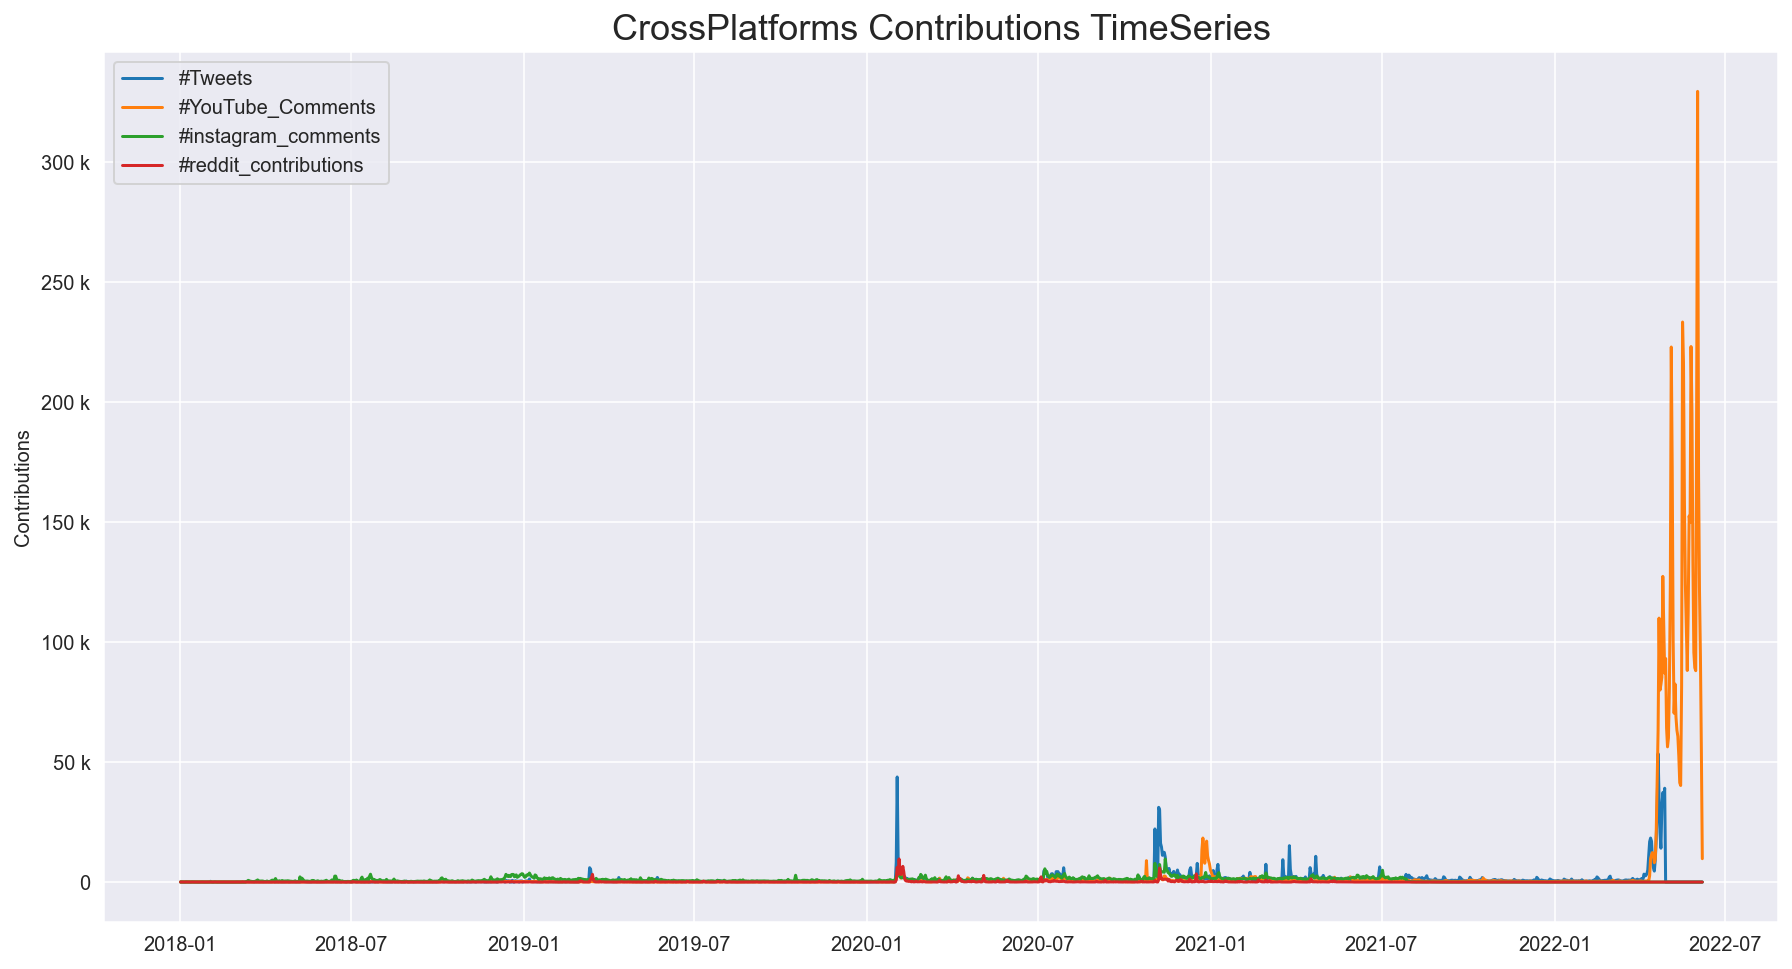

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(df_days['date'], df_days["n_tweets"], label="#Tweets");
plt.plot(df_days['date'], df_days["youtube_comments"], label="#YouTube_Comments");
plt.plot(df_days['date'], df_days["instagram_comments"], label="#instagram_comments");
plt.plot(df_days['date'], df_days["reddit_contributions"], label="#reddit_contributions");

plt.ylabel('Contributions')
plt.title("CrossPlatforms Contributions TimeSeries", fontsize=18)
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))
ax.yaxis.set_major_formatter(tkr.EngFormatter())
plt.legend();

<a id='all_years'></a>
>>### CrossPlatforms Contributions over Years
> <ul>
 <li><a href="#all_days">CrossPlatforms Contributions TimeSeries</a></li>
 <li><a href="#all_years"><b>CrossPlatforms Contributions over Years</b></a></li>
 <li><a href="#all_months">CrossPlatforms Contributions over Months</a></li>
 <li><a href="#over_days">CrossPlatforms Contributions over Days</a></li>
 </ul>

In [11]:
df_years = df_creations.groupby('year')['n_tweets', "youtube_comments", "instagram_comments", 'reddit_contributions'].sum().reset_index()

df_years2 = df_years.copy()
for col in ['n_tweets', "youtube_comments", "instagram_comments", 'reddit_contributions']:
    df_years2[col] = df_years2[col].apply(lambda x: f'{x/1000000000:.1f}B' if x/1000000000>=1 else f'{x/1000000:.1f}M' if x/1000000>=1 else f'{x/1000:.1f}K' if x/10000>=1 else f'{x}')

df_years2

year n_tweets youtube_comments instagram_comments reddit_contributions
0  2018    37.2K            34.8K             214.0K               6993.0
1  2019    94.3K            25.6K             288.8K                23.7K
2  2020   612.6K           351.2K             578.6K               128.4K
3  2021   478.9K           249.4K             352.9K                18.3K
4  2022   497.3K             5.6M                0.0                  0.0

https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi

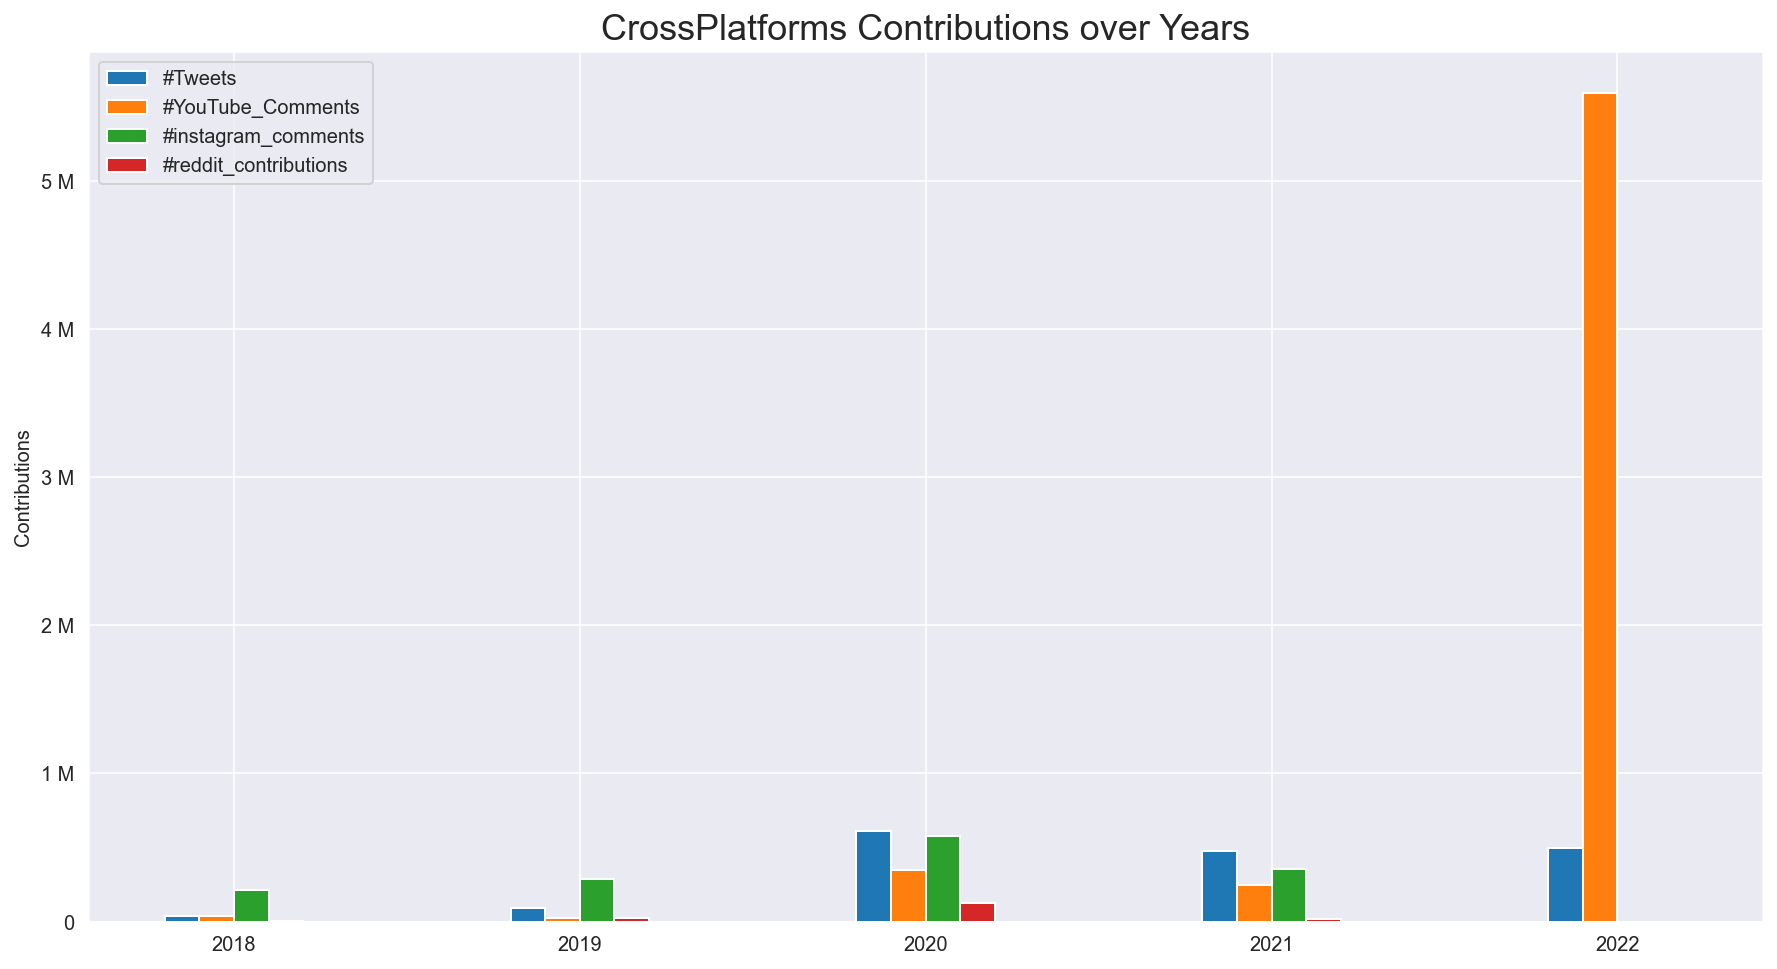

In [12]:
x_axis = df_years["year"]
fig, ax = plt.subplots(figsize=(15,8))  
plt.bar(x_axis - 0.15, df_years["n_tweets"], width=0.1, label="#Tweets");
plt.bar(x_axis - 0.05, df_years["youtube_comments"], width=0.1, label="#YouTube_Comments");
plt.bar(x_axis + 0.05, df_years["instagram_comments"], width=0.1, label="#instagram_comments");
plt.bar(x_axis + 0.15, df_years["reddit_contributions"], width=0.1, label="#reddit_contributions");

plt.ylabel('Contributions')
plt.title("CrossPlatforms Contributions over Years", fontsize=18)
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))
ax.yaxis.set_major_formatter(tkr.EngFormatter())

plt.legend();

---

<a id='all_months'></a>
>>### CrossPlatforms Contributions over Months
> <ul>
 <li><a href="#all_days">CrossPlatforms Contributions TimeSeries</a></li>
 <li><a href="#all_years">CrossPlatforms Contributions over Years</a></li>
 <li><a href="#all_months"><b>CrossPlatforms Contributions over Months</b></a></li>
 <li><a href="#over_days">CrossPlatforms Contributions over Days</a></li>
 </ul>

In [13]:
tmp = df_creations.groupby(['month', 'year'])['n_tweets', "youtube_comments", 'instagram_comments', 'reddit_contributions'].sum().reset_index()
df_month = tmp.melt(id_vars=['month', 'year'], var_name='type', value_name='contributions')
df_month.head(1)

month  year      type  contributions
0   Apr  2018  n_tweets         1661.0

https://stackoverflow.com/questions/52670304/python-facetgrid-with-sns-barplot-and-map-target-no-overlapping-group-bars <br>
https://stackoverflow.com/questions/61455874/facetplot-catplot-seaborn-how-to-change-the-bar-positions

In [14]:
## Youtube and Twitter
# df_month_yt = df_month[df_month.type.isin(['n_tweets', "youtube_comments"])]
# helpers.months_cross(df_month_yt, x="month", y="contributions", facet_on='year', n_col=2, fs=10, loc=-0.19)

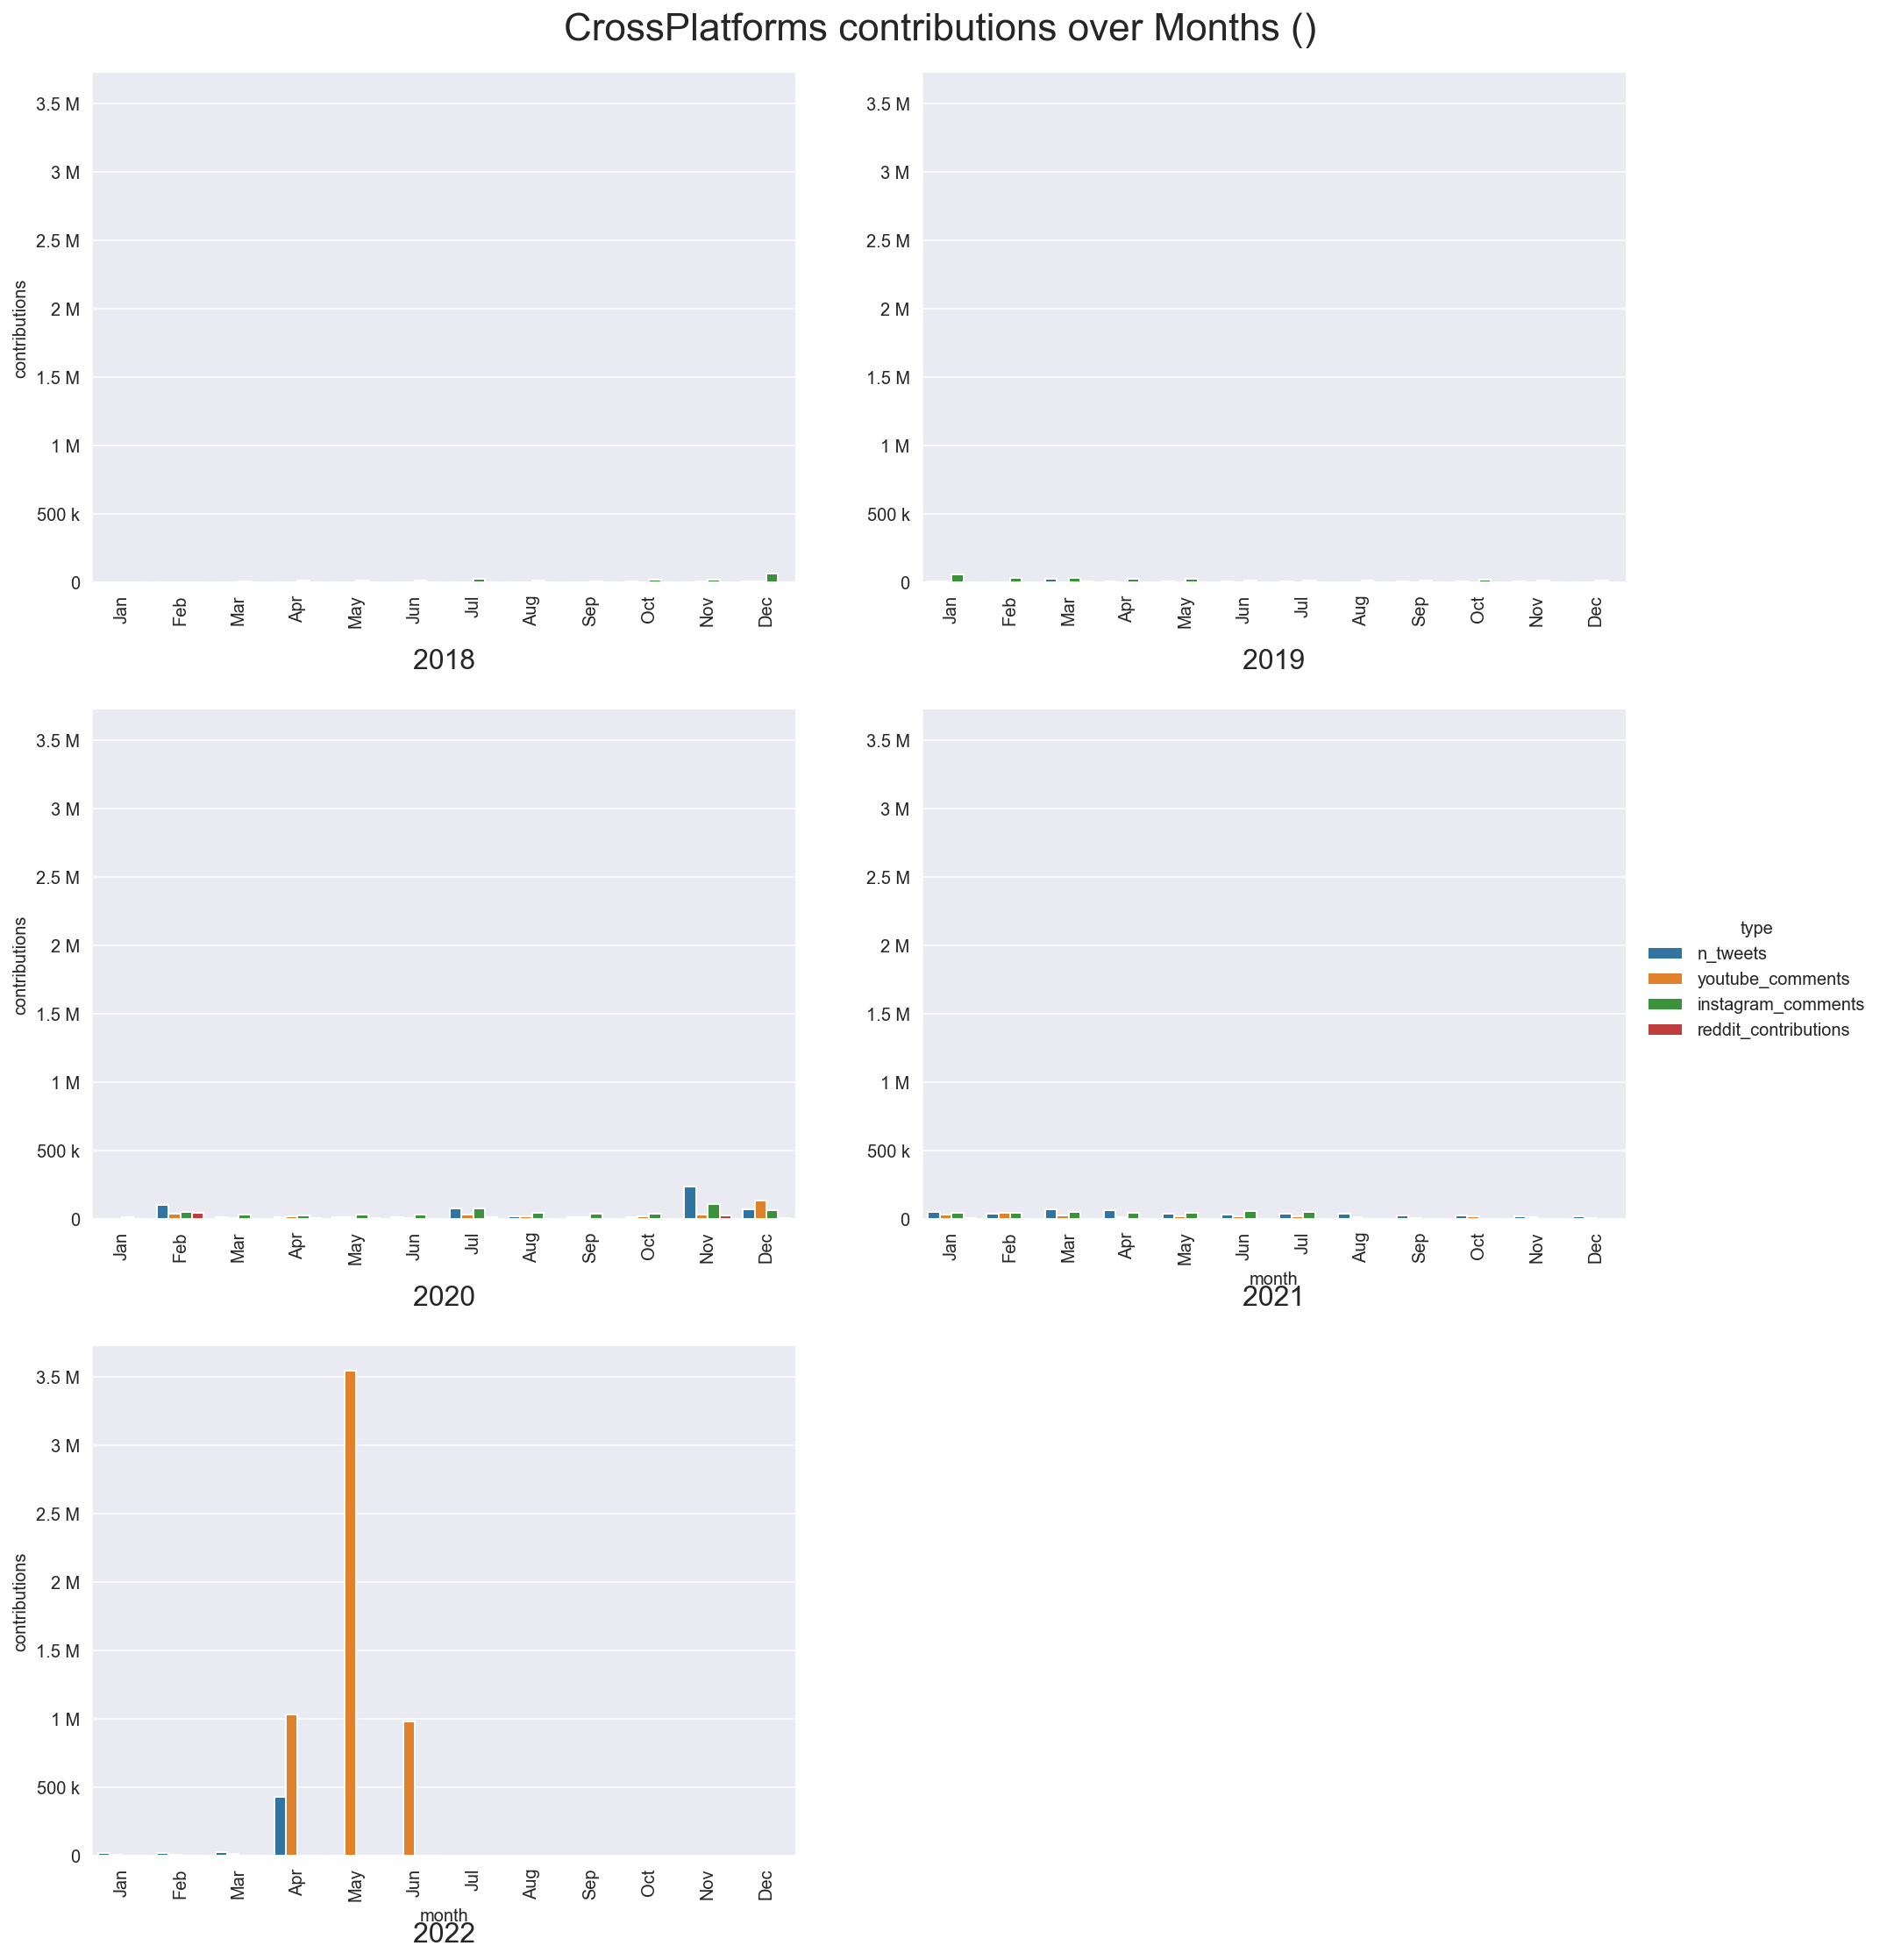

In [15]:
helpers.months_cross(df_month, x="month", y="contributions", facet_on='year', n_col=2, fs=10, loc=-0.19)

In [16]:
df_month_18 = df_month[df_month['year']==2018]
df_month_19 = df_month[df_month['year']==2019]
df_month_20 = df_month[df_month['year']==2020]
df_month_21 = df_month[df_month['year']==2021]
df_month_22 = df_month[df_month['year']==2022]

In [17]:
importlib.reload(helpers)

<module 'helpers' from '/Users/mnagy99/jupyter/AH/Cross Platforms/SNA-AH-Cross-Platforms/helpers.py'>

## 2018

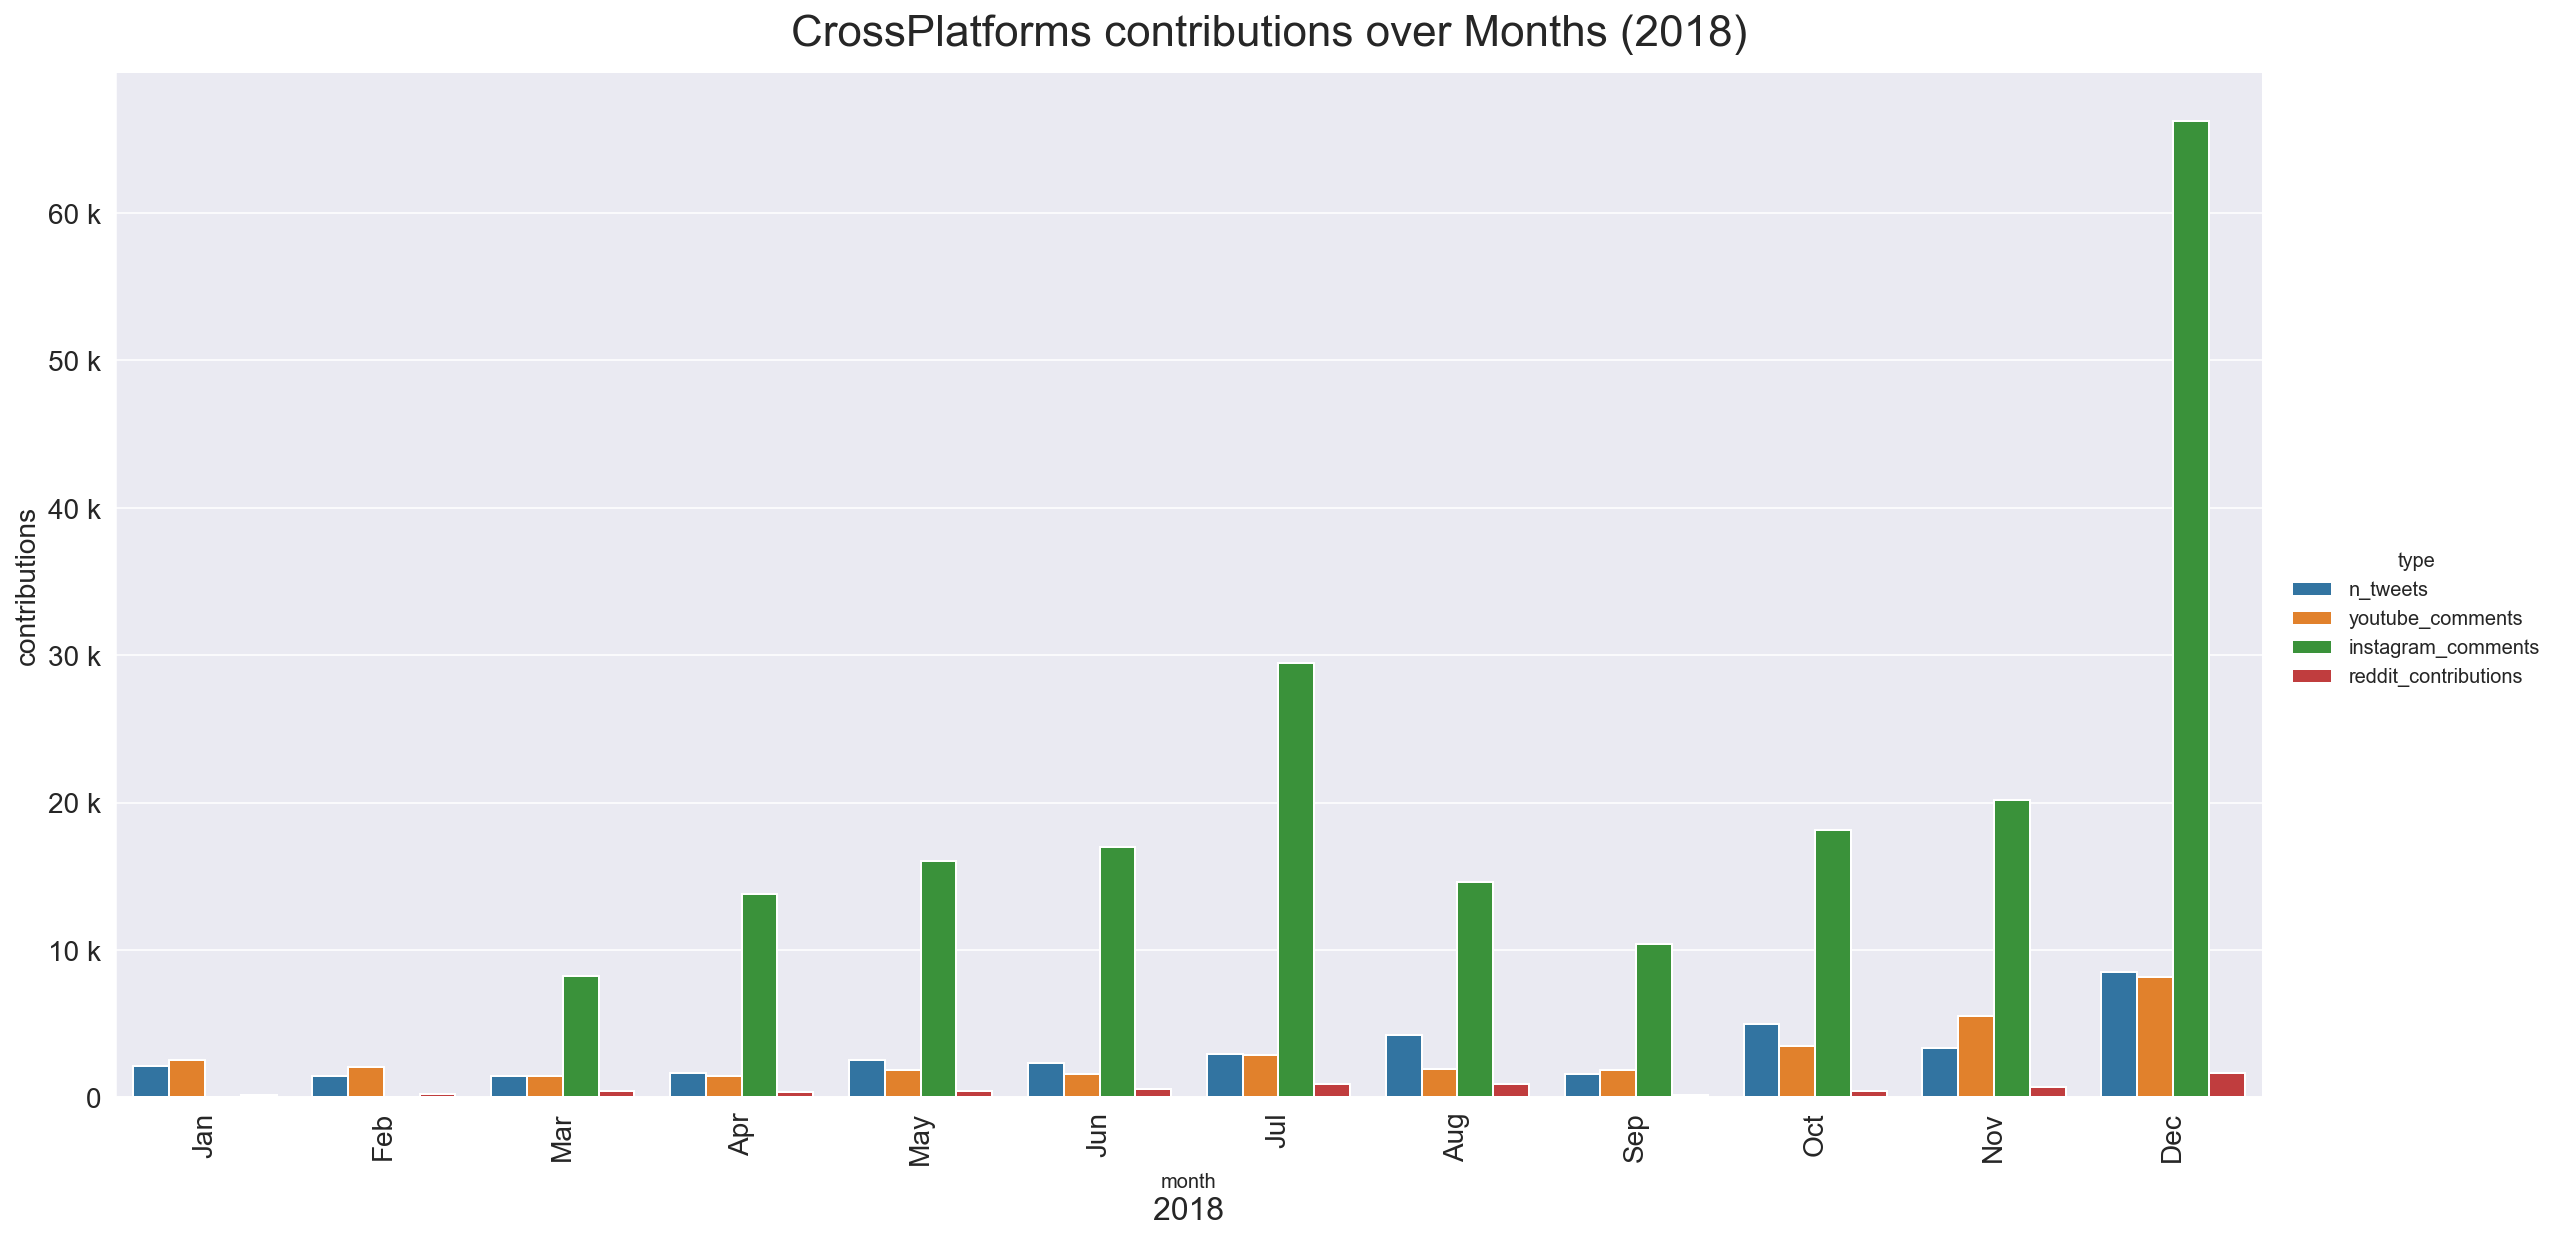

In [18]:
helpers.months_cross(df_month_18, x="month", y="contributions", facet_on='year', 
                     n_col=1, h=8, loc=-0.13, ratio=2, fs=14, year_str='2018')

## 2019

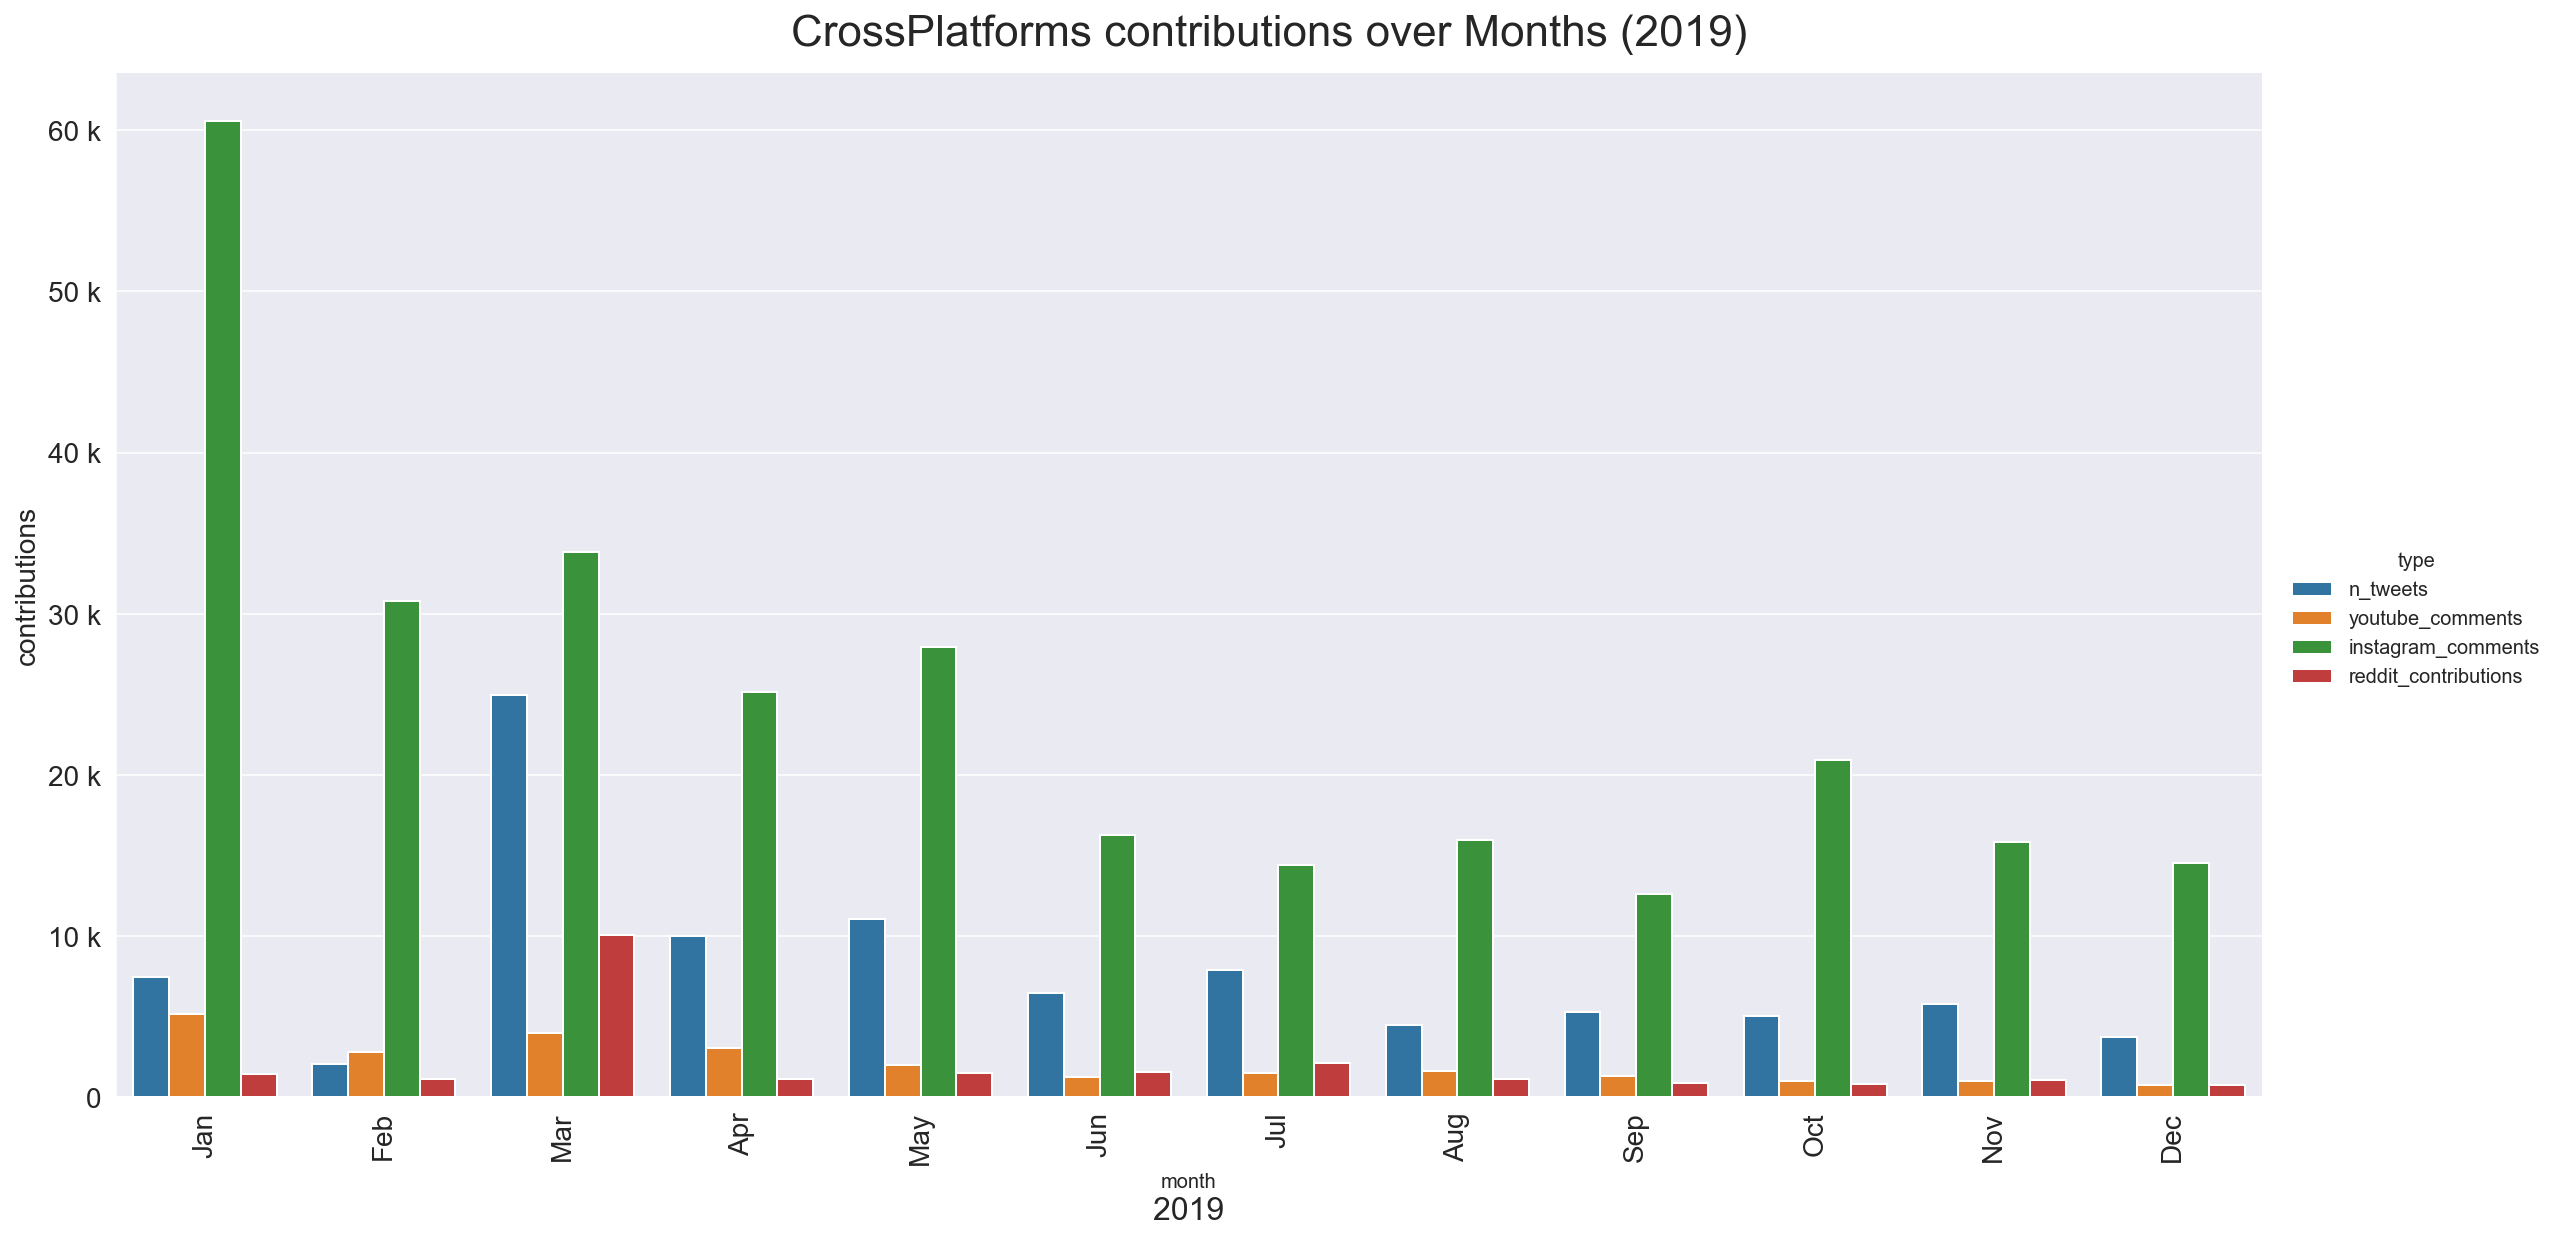

In [19]:
helpers.months_cross(df_month_19, x="month", y="contributions", facet_on='year', 
                     n_col=1, h=8, loc=-0.13, ratio=2, fs=14, year_str='2019')

## 2020

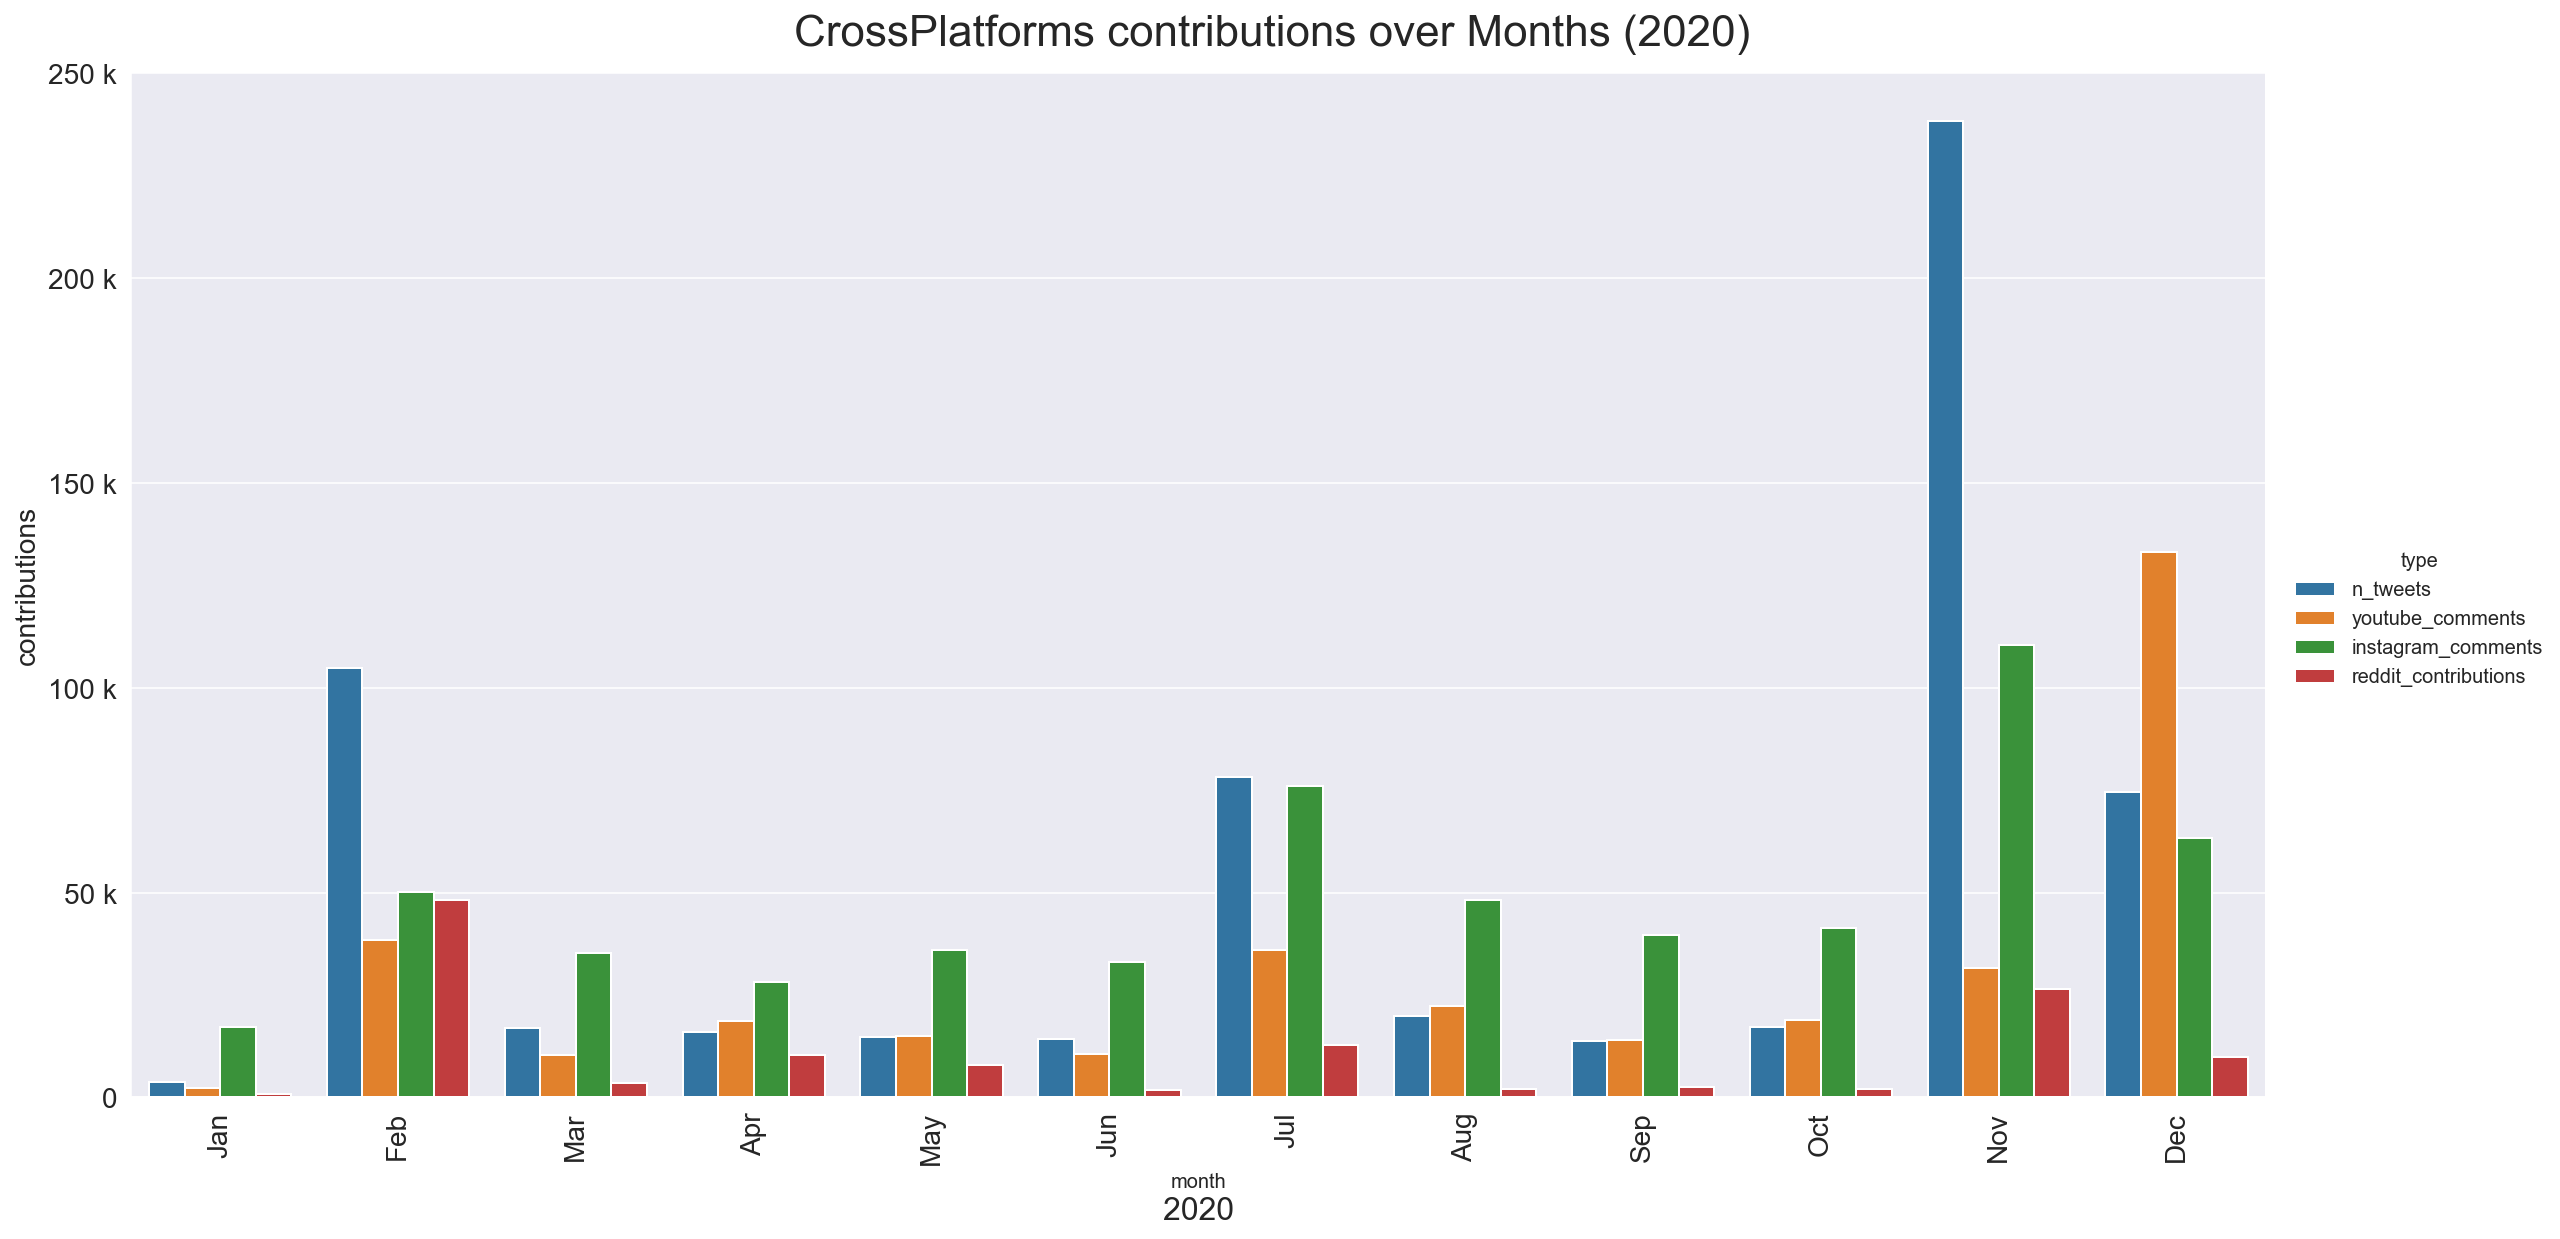

In [20]:
helpers.months_cross(df_month_20, x="month", y="contributions", facet_on='year', 
                     n_col=1, h=8, loc=-0.13, ratio=2, fs=14, year_str='2020')

## 2021

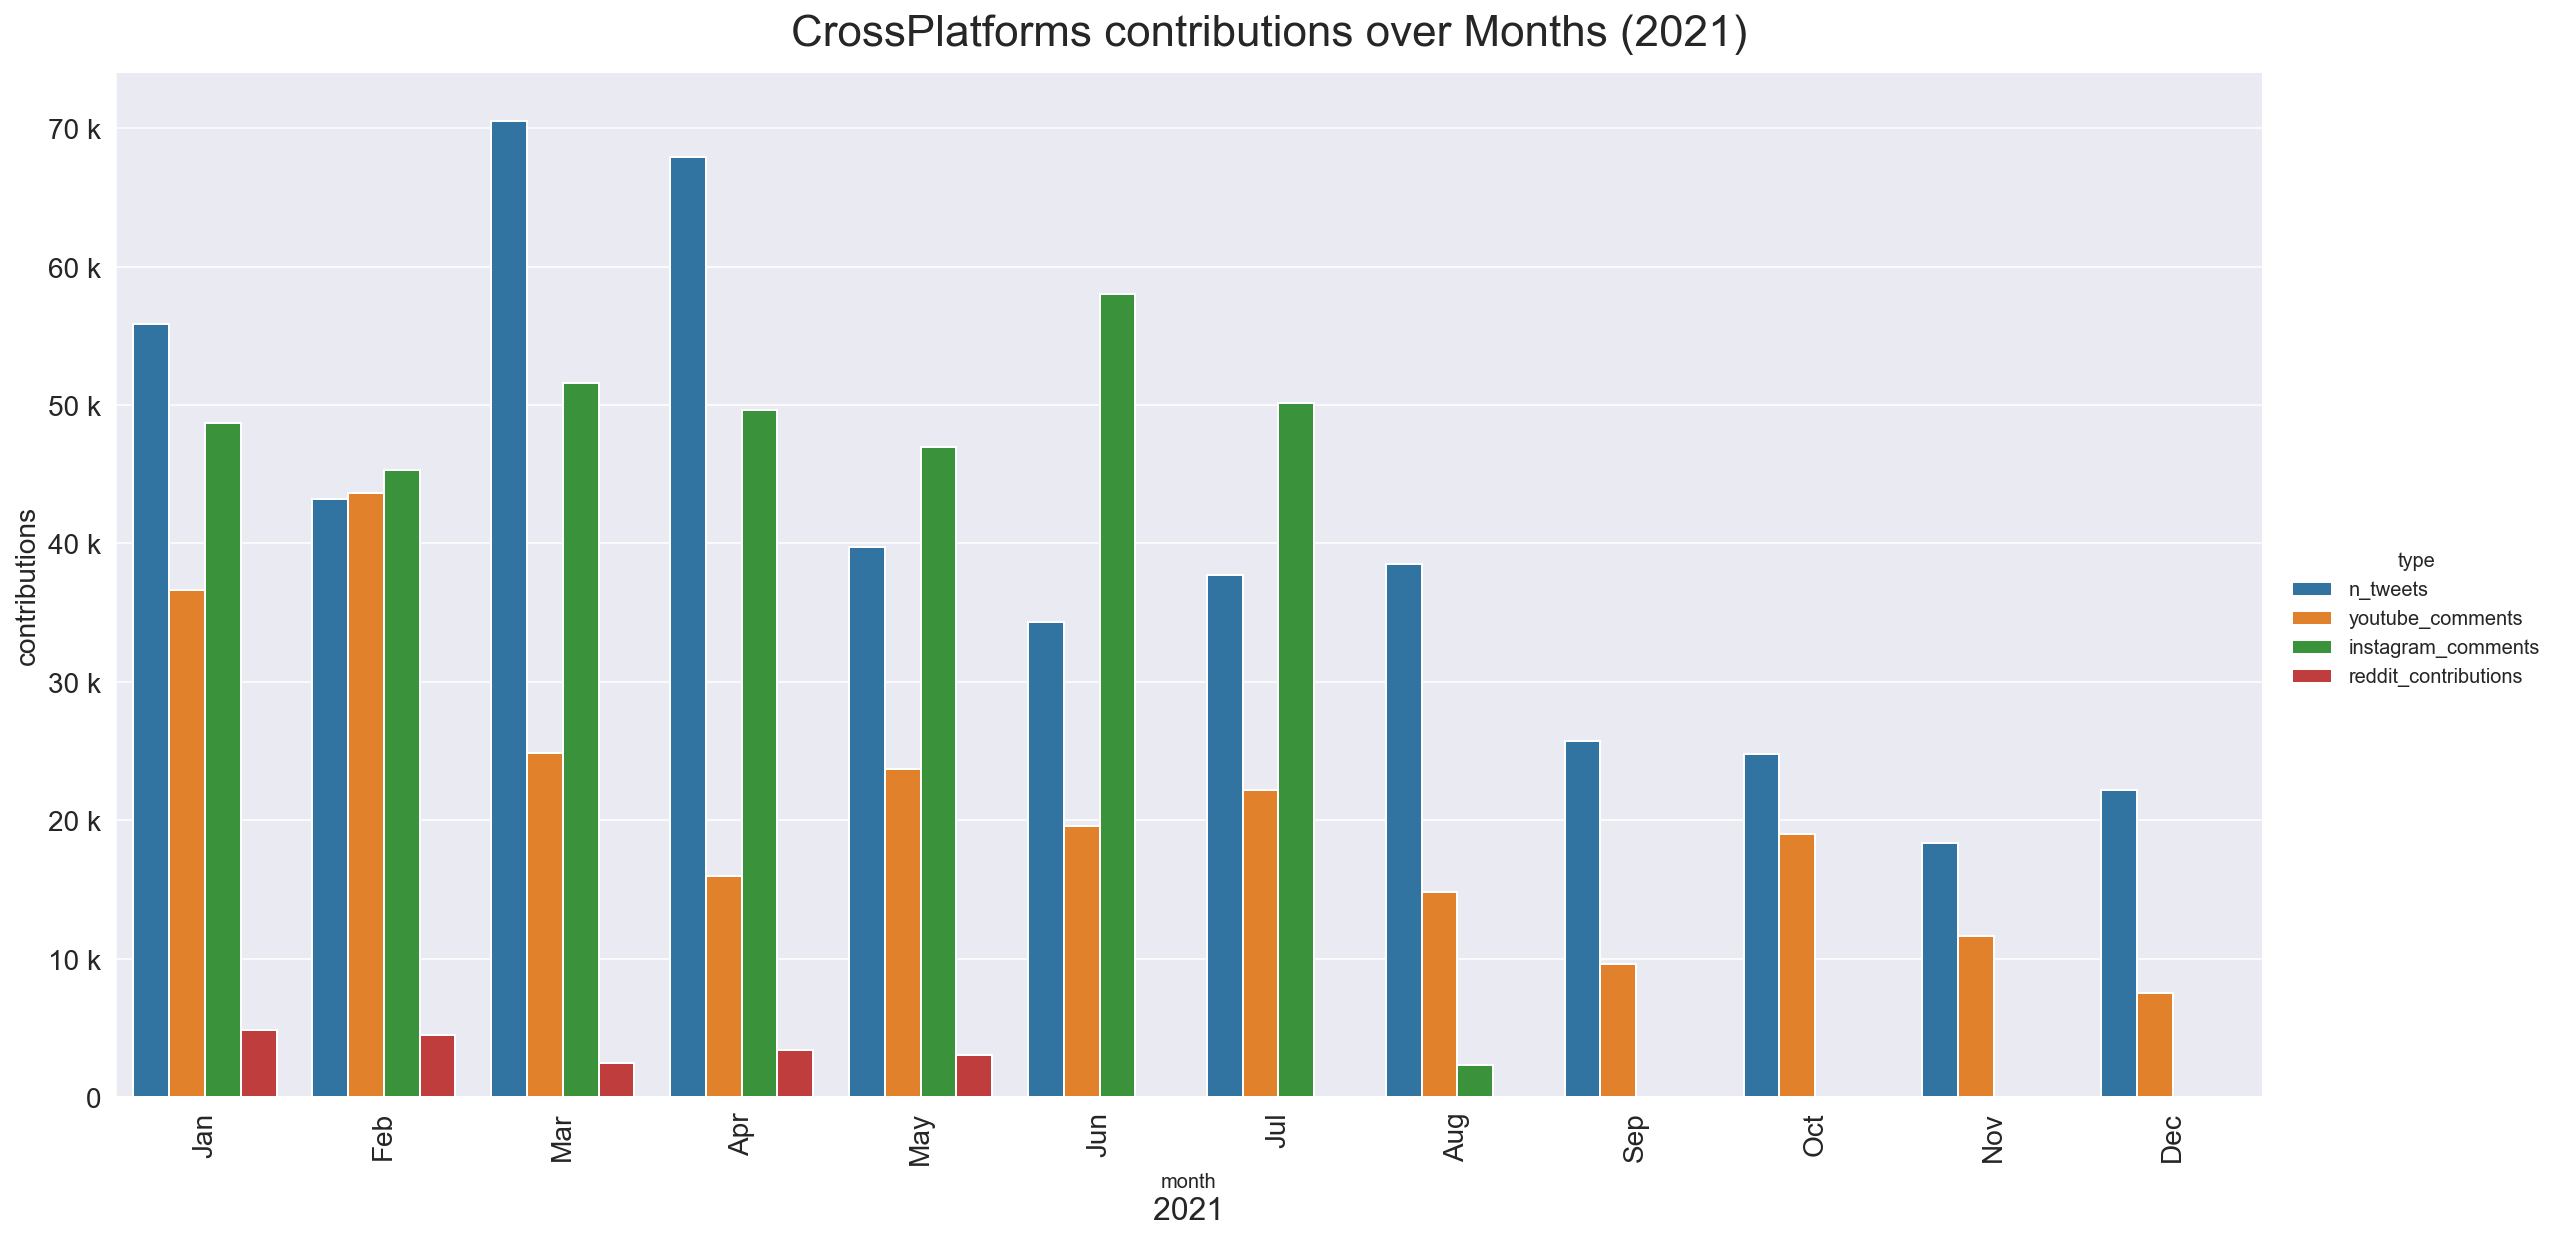

In [21]:
helpers.months_cross(df_month_21, x="month", y="contributions", facet_on='year', 
                     n_col=1, h=8, loc=-0.13, ratio=2, fs=14, year_str='2021')

## 2022

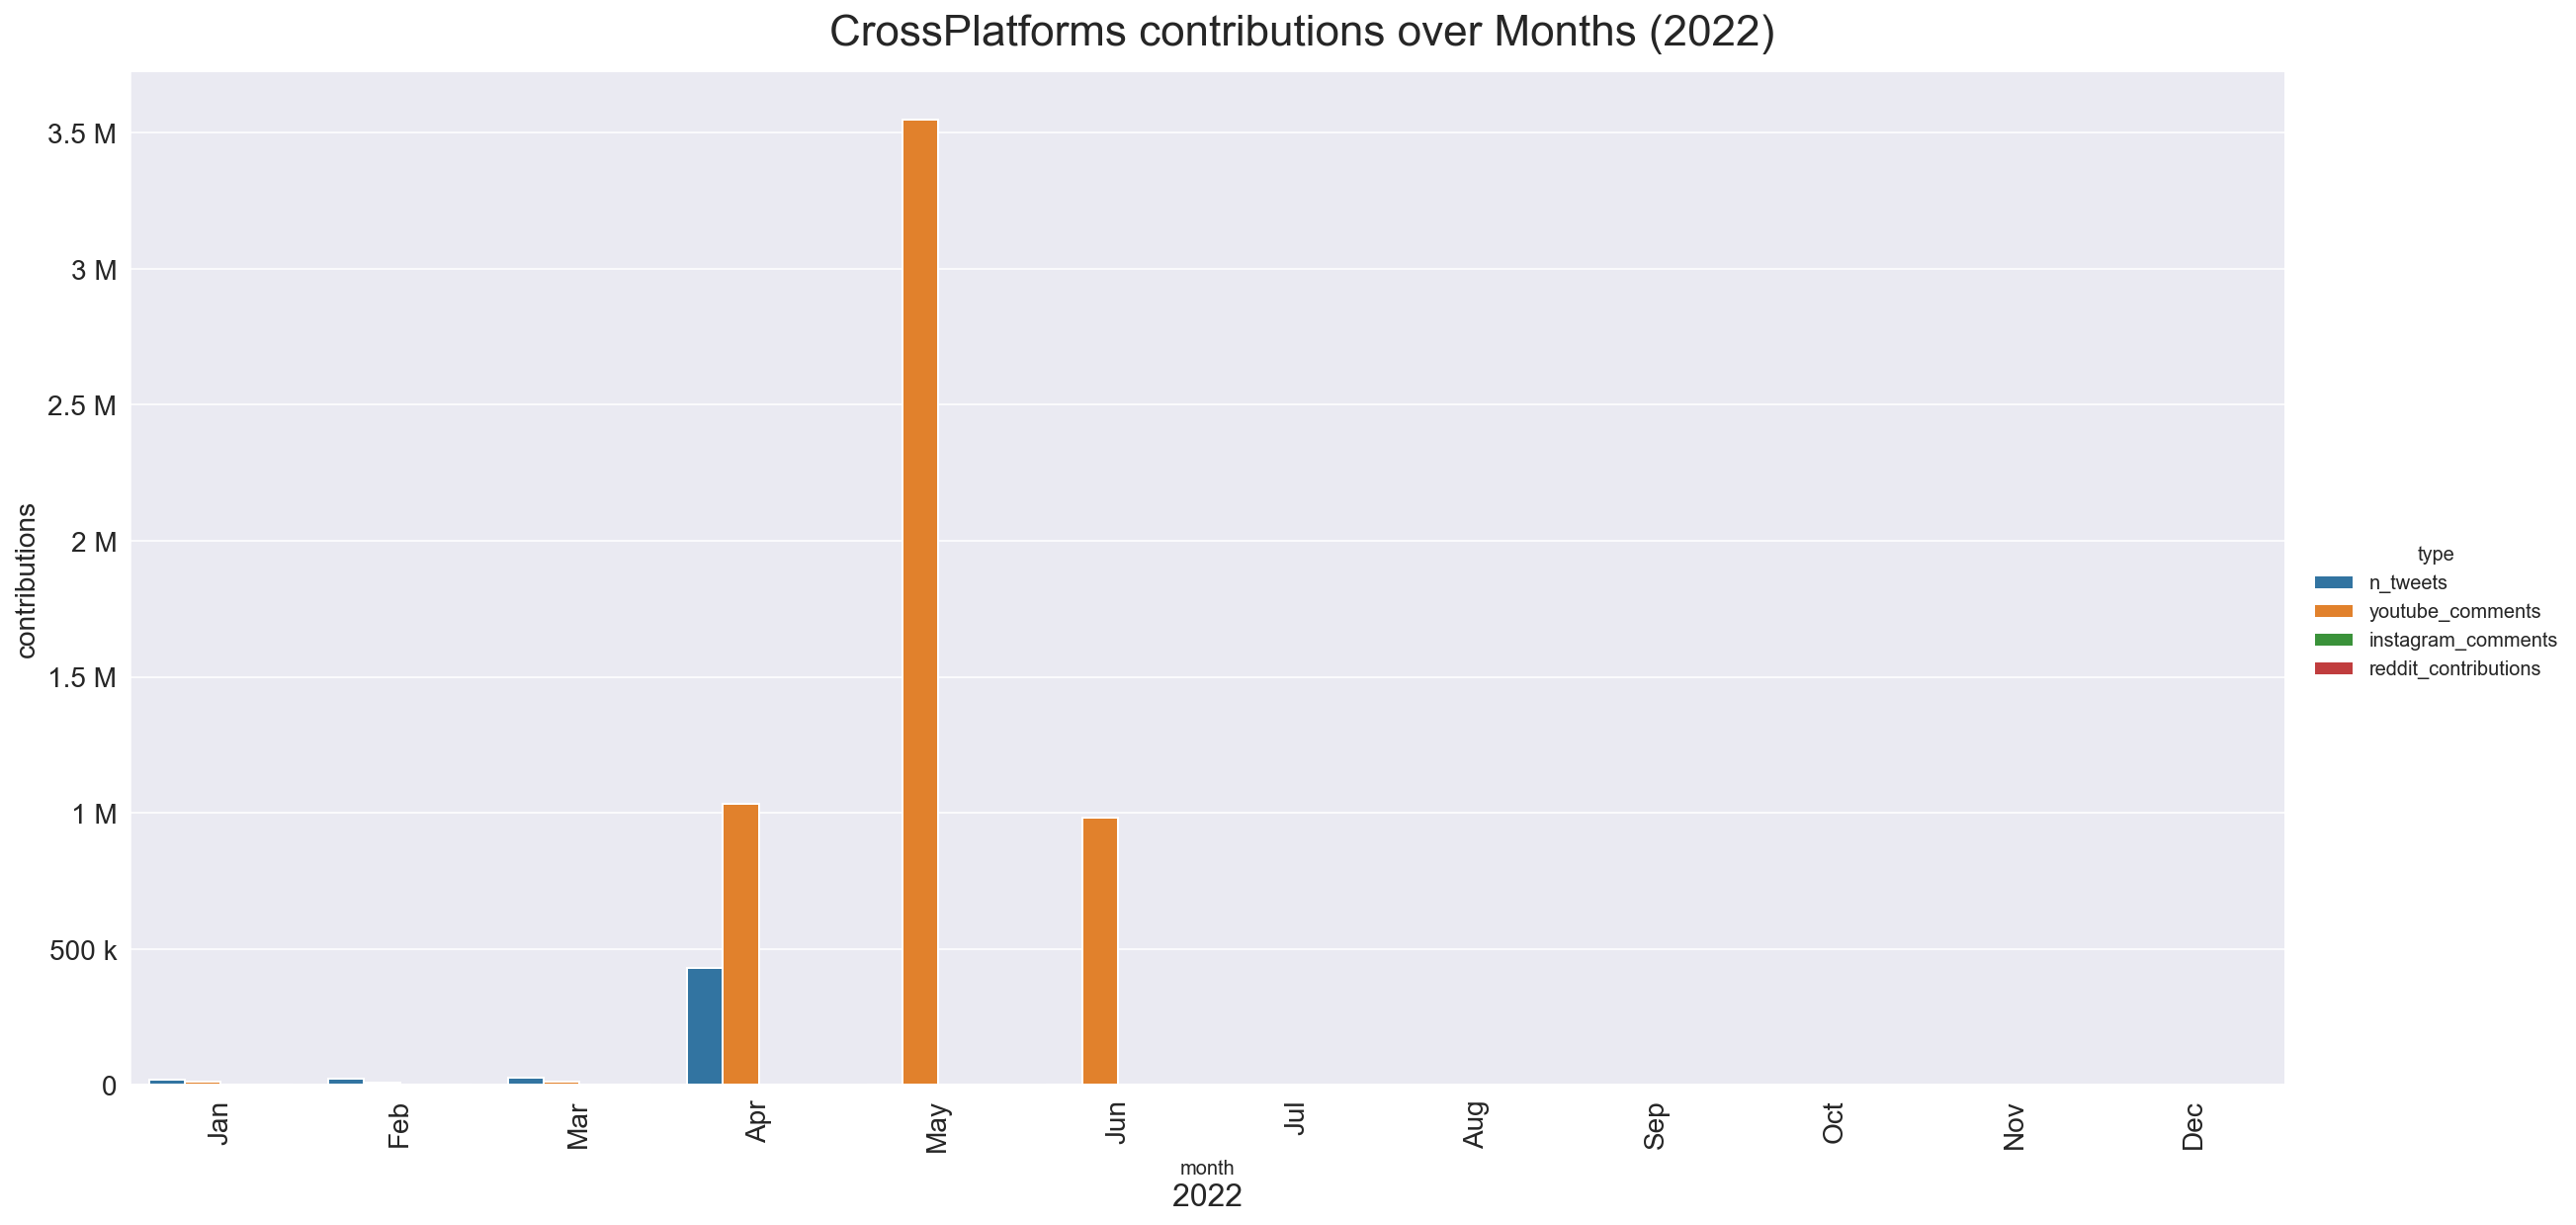

In [22]:
helpers.months_cross(df_month_22, x="month", y="contributions", facet_on='year', 
                     n_col=1, h=8, loc=-0.13, ratio=2, fs=14, year_str='2022')

---

<a id='over_days'></a>
>>### CrossPlatforms Contributions over Days
> <ul>
 <li><a href="#all_days">CrossPlatforms Contributions TimeSeries</a></li>
 <li><a href="#all_years">CrossPlatforms Contributions over Years</a></li>
 <li><a href="#all_months">CrossPlatforms Contributions over Months</a></li>
 <li><a href="#over_days"><b>CrossPlatforms Contributions over Days</b></a></li>
 </ul>

In [23]:
tmp = df_creations.groupby(['month', 'year', 'dayofmonth'])['n_tweets', "youtube_comments", 'instagram_comments', 'reddit_contributions'].sum().reset_index()
df_days2 = tmp.melt(id_vars=['month', 'year', 'dayofmonth'], var_name='type', value_name='contributions')
df_days2.head(1)

month  year  dayofmonth      type  contributions
0   Apr  2018           1  n_tweets           33.0

In [24]:
df_days_18 = df_days2[df_days2['year']==2018]
df_days_19 = df_days2[df_days2['year']==2019]
df_days_20 = df_days2[df_days2['year']==2020]
df_days_21 = df_days2[df_days2['year']==2021]
df_days_22 = df_days2[df_days2['year']==2022]

In [25]:
# importlib.reload(helpers)

## 2018

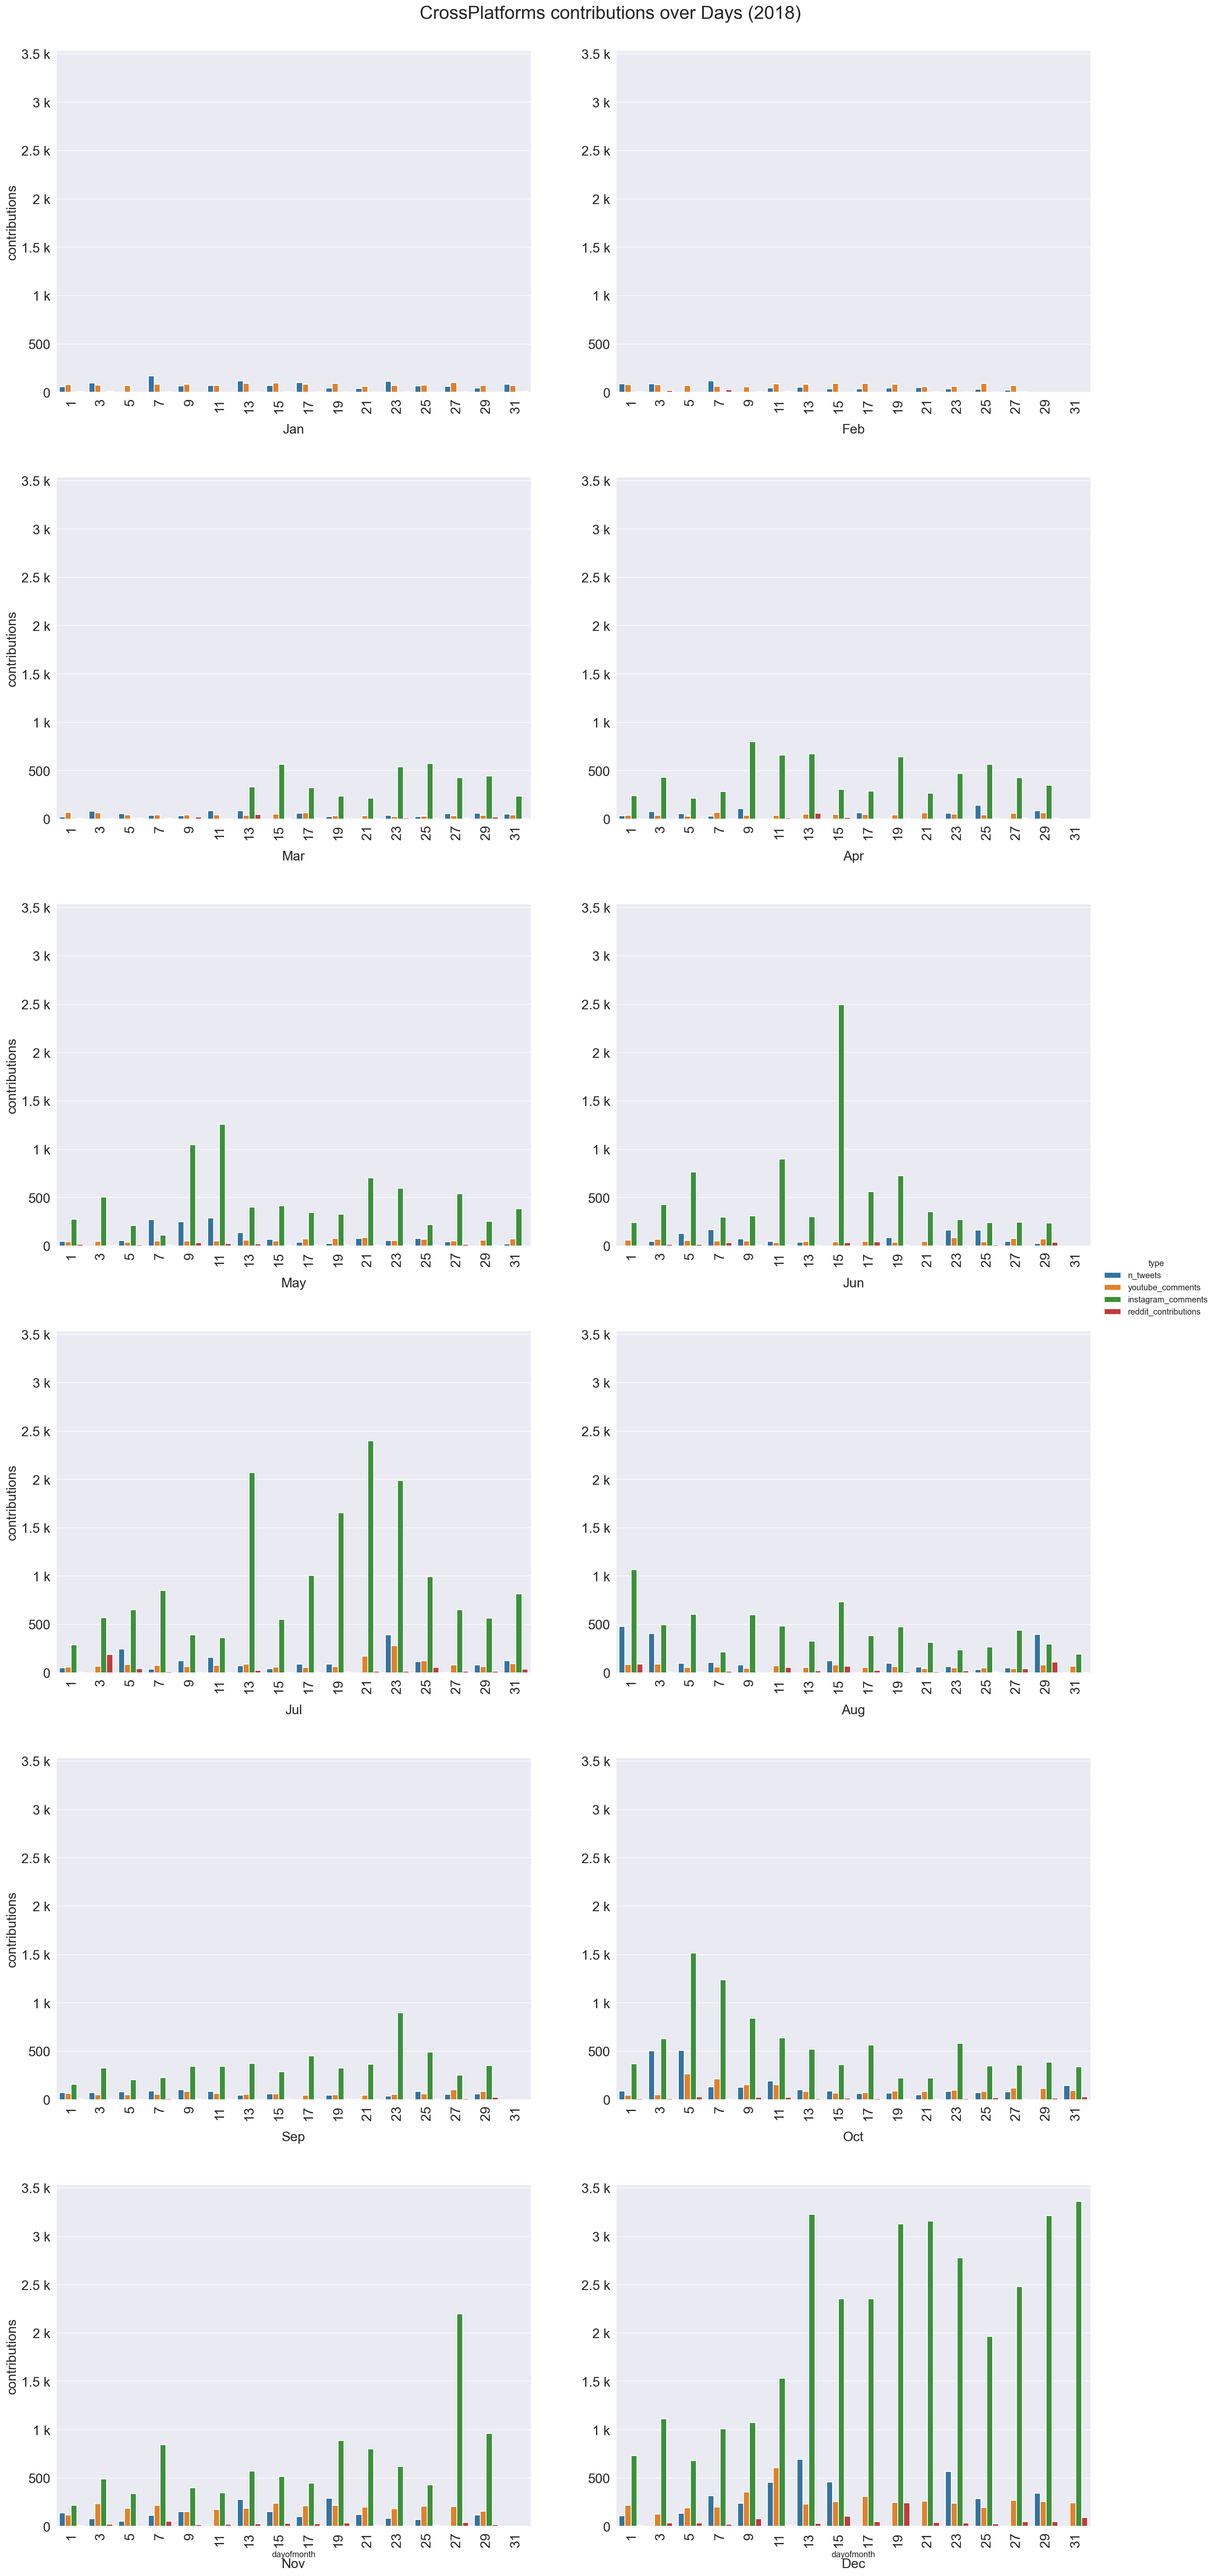

In [26]:
helpers.days_cross(df_days_18, x="dayofmonth", y="contributions", facet_on='month', n_col=2, h=7, loc=-0.135, 
                   ratio=1.3, fs=16, year_str='2018')

<br>

## 2019

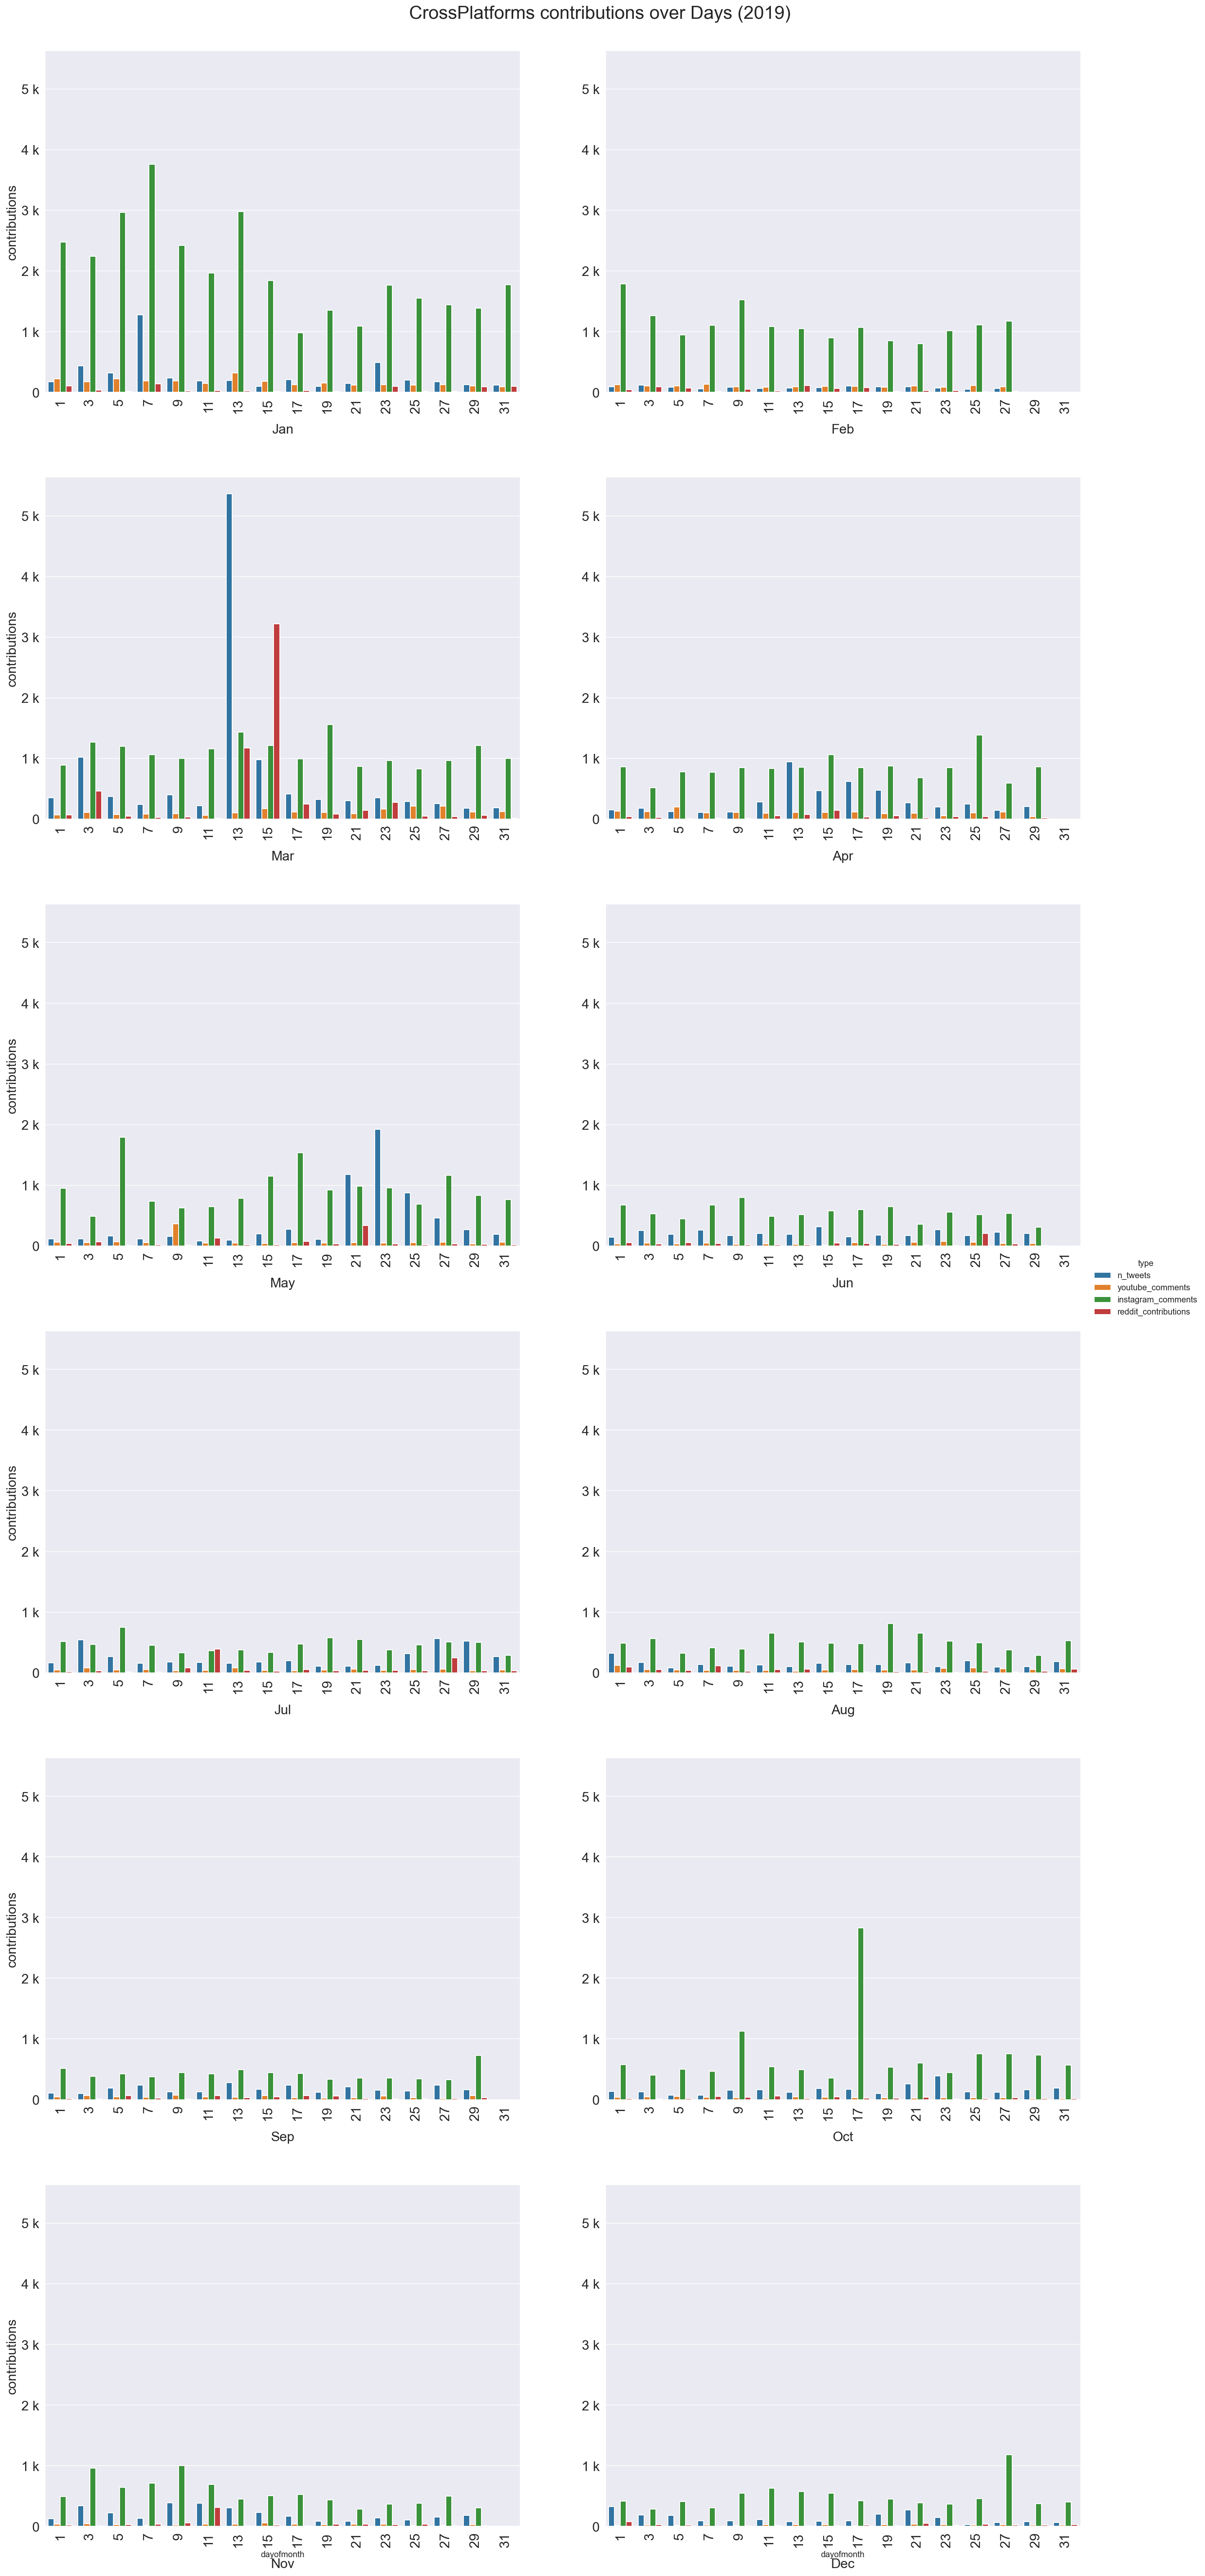

In [27]:
helpers.days_cross(df_days_19, x="dayofmonth", y="contributions", facet_on='month', n_col=2, h=7, loc=-0.135, 
                   ratio=1.3, fs=16, year_str='2019')

## 2020

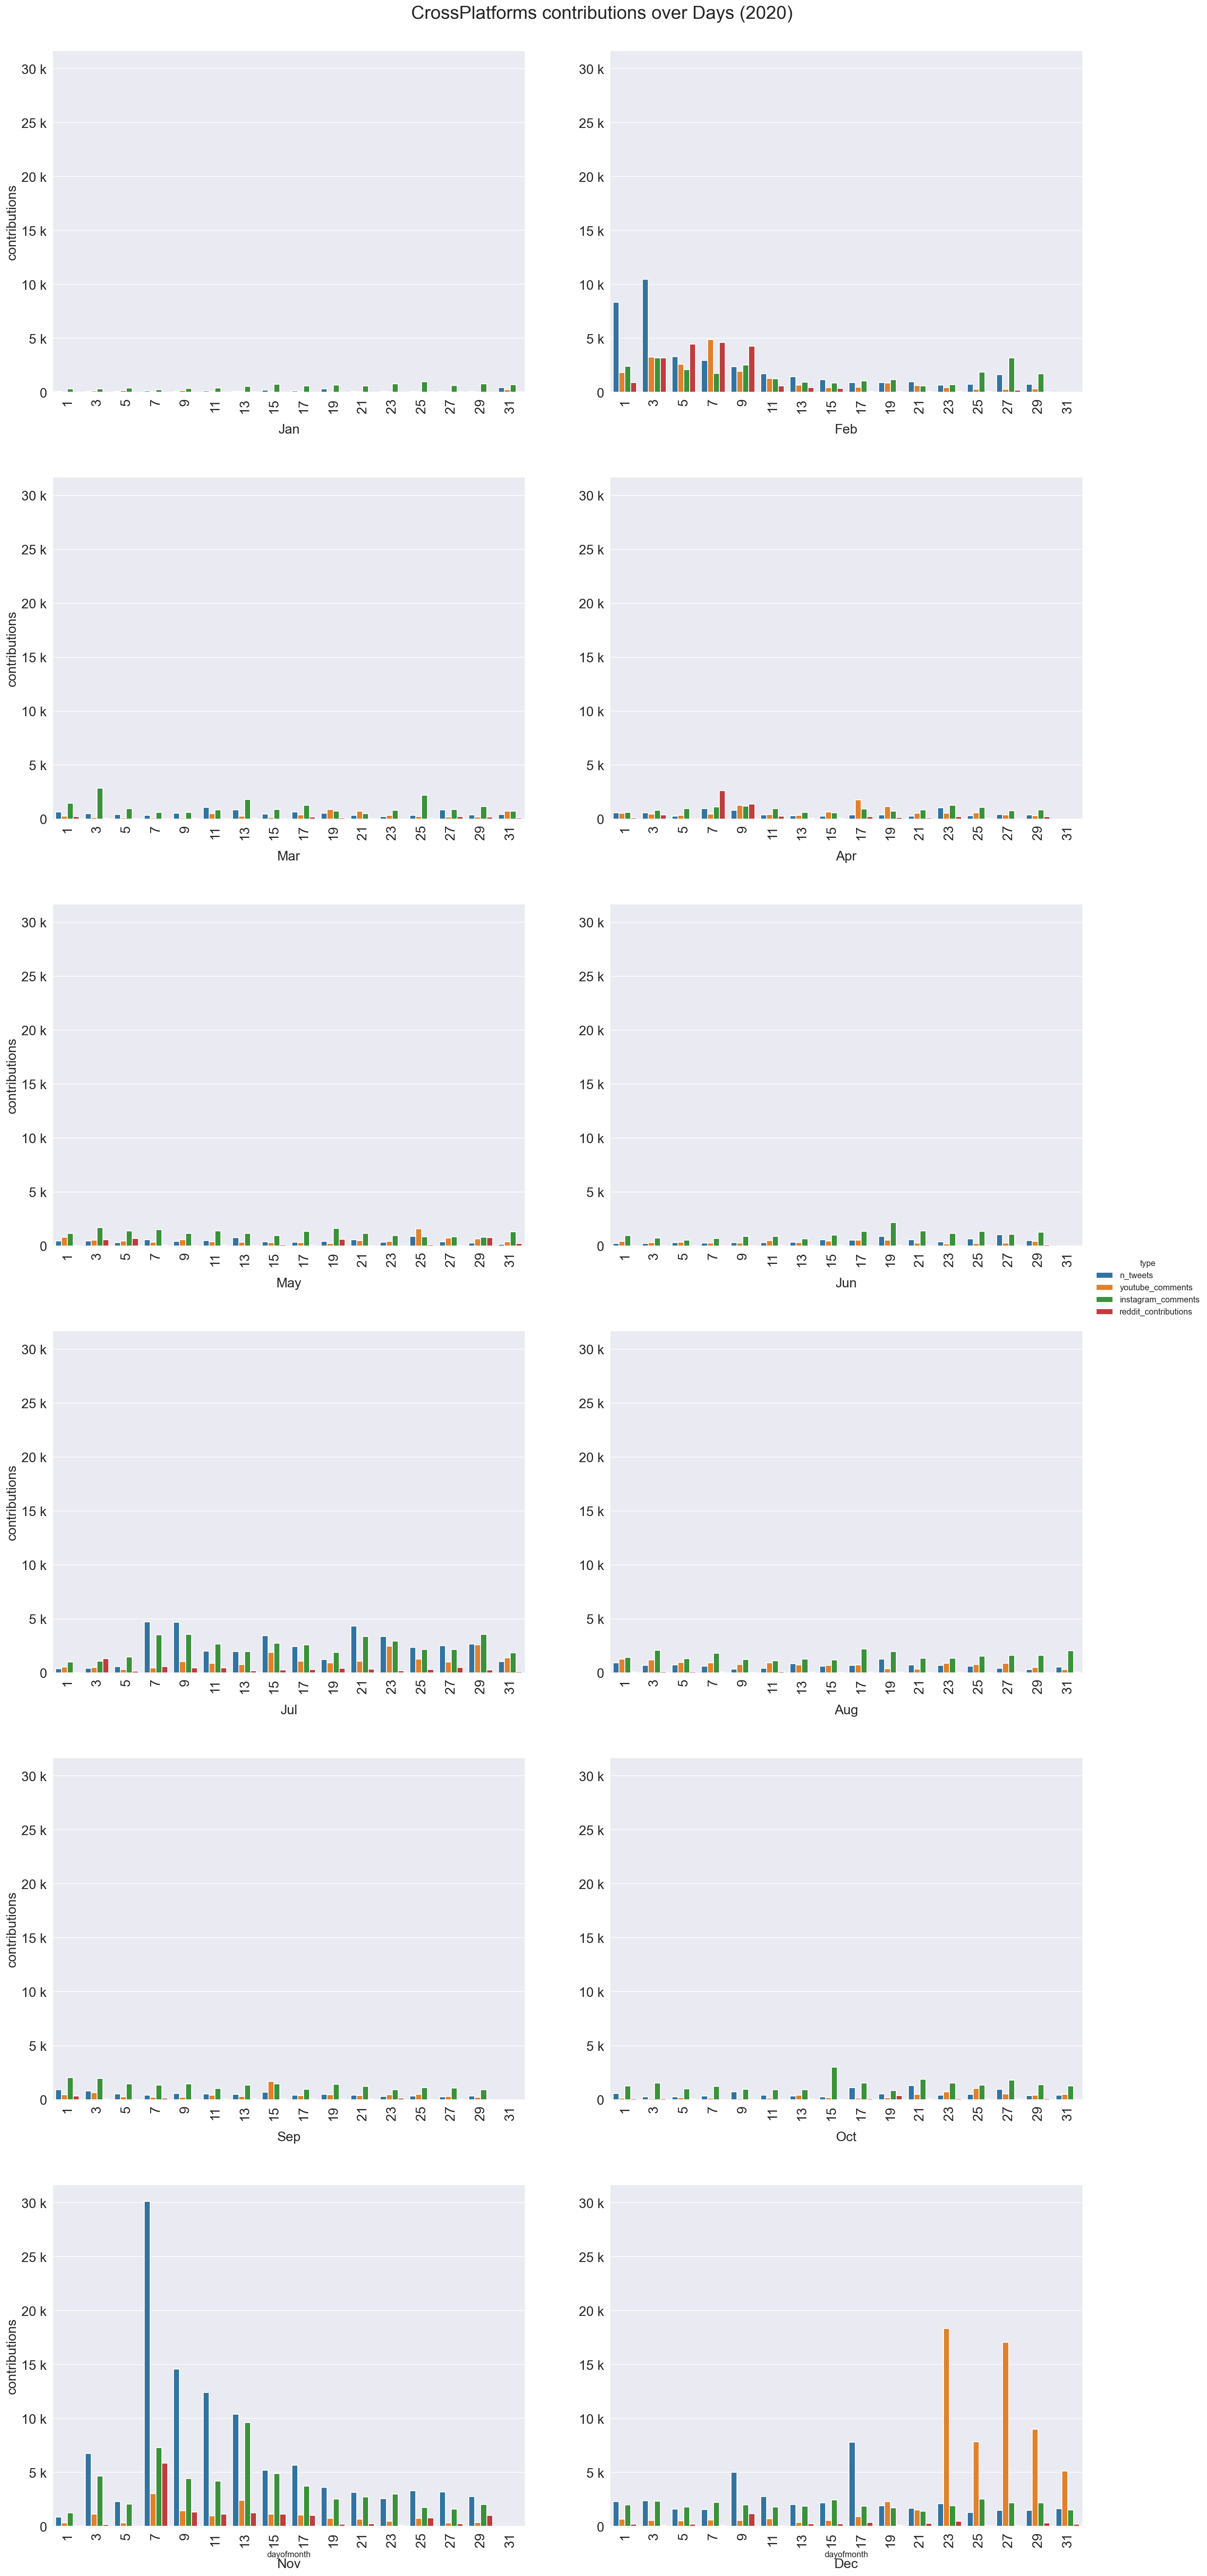

In [28]:
helpers.days_cross(df_days_20, x="dayofmonth", y="contributions", facet_on='month', n_col=2, h=7, loc=-0.135, 
                   ratio=1.3, fs=16, year_str='2020')

## 2021

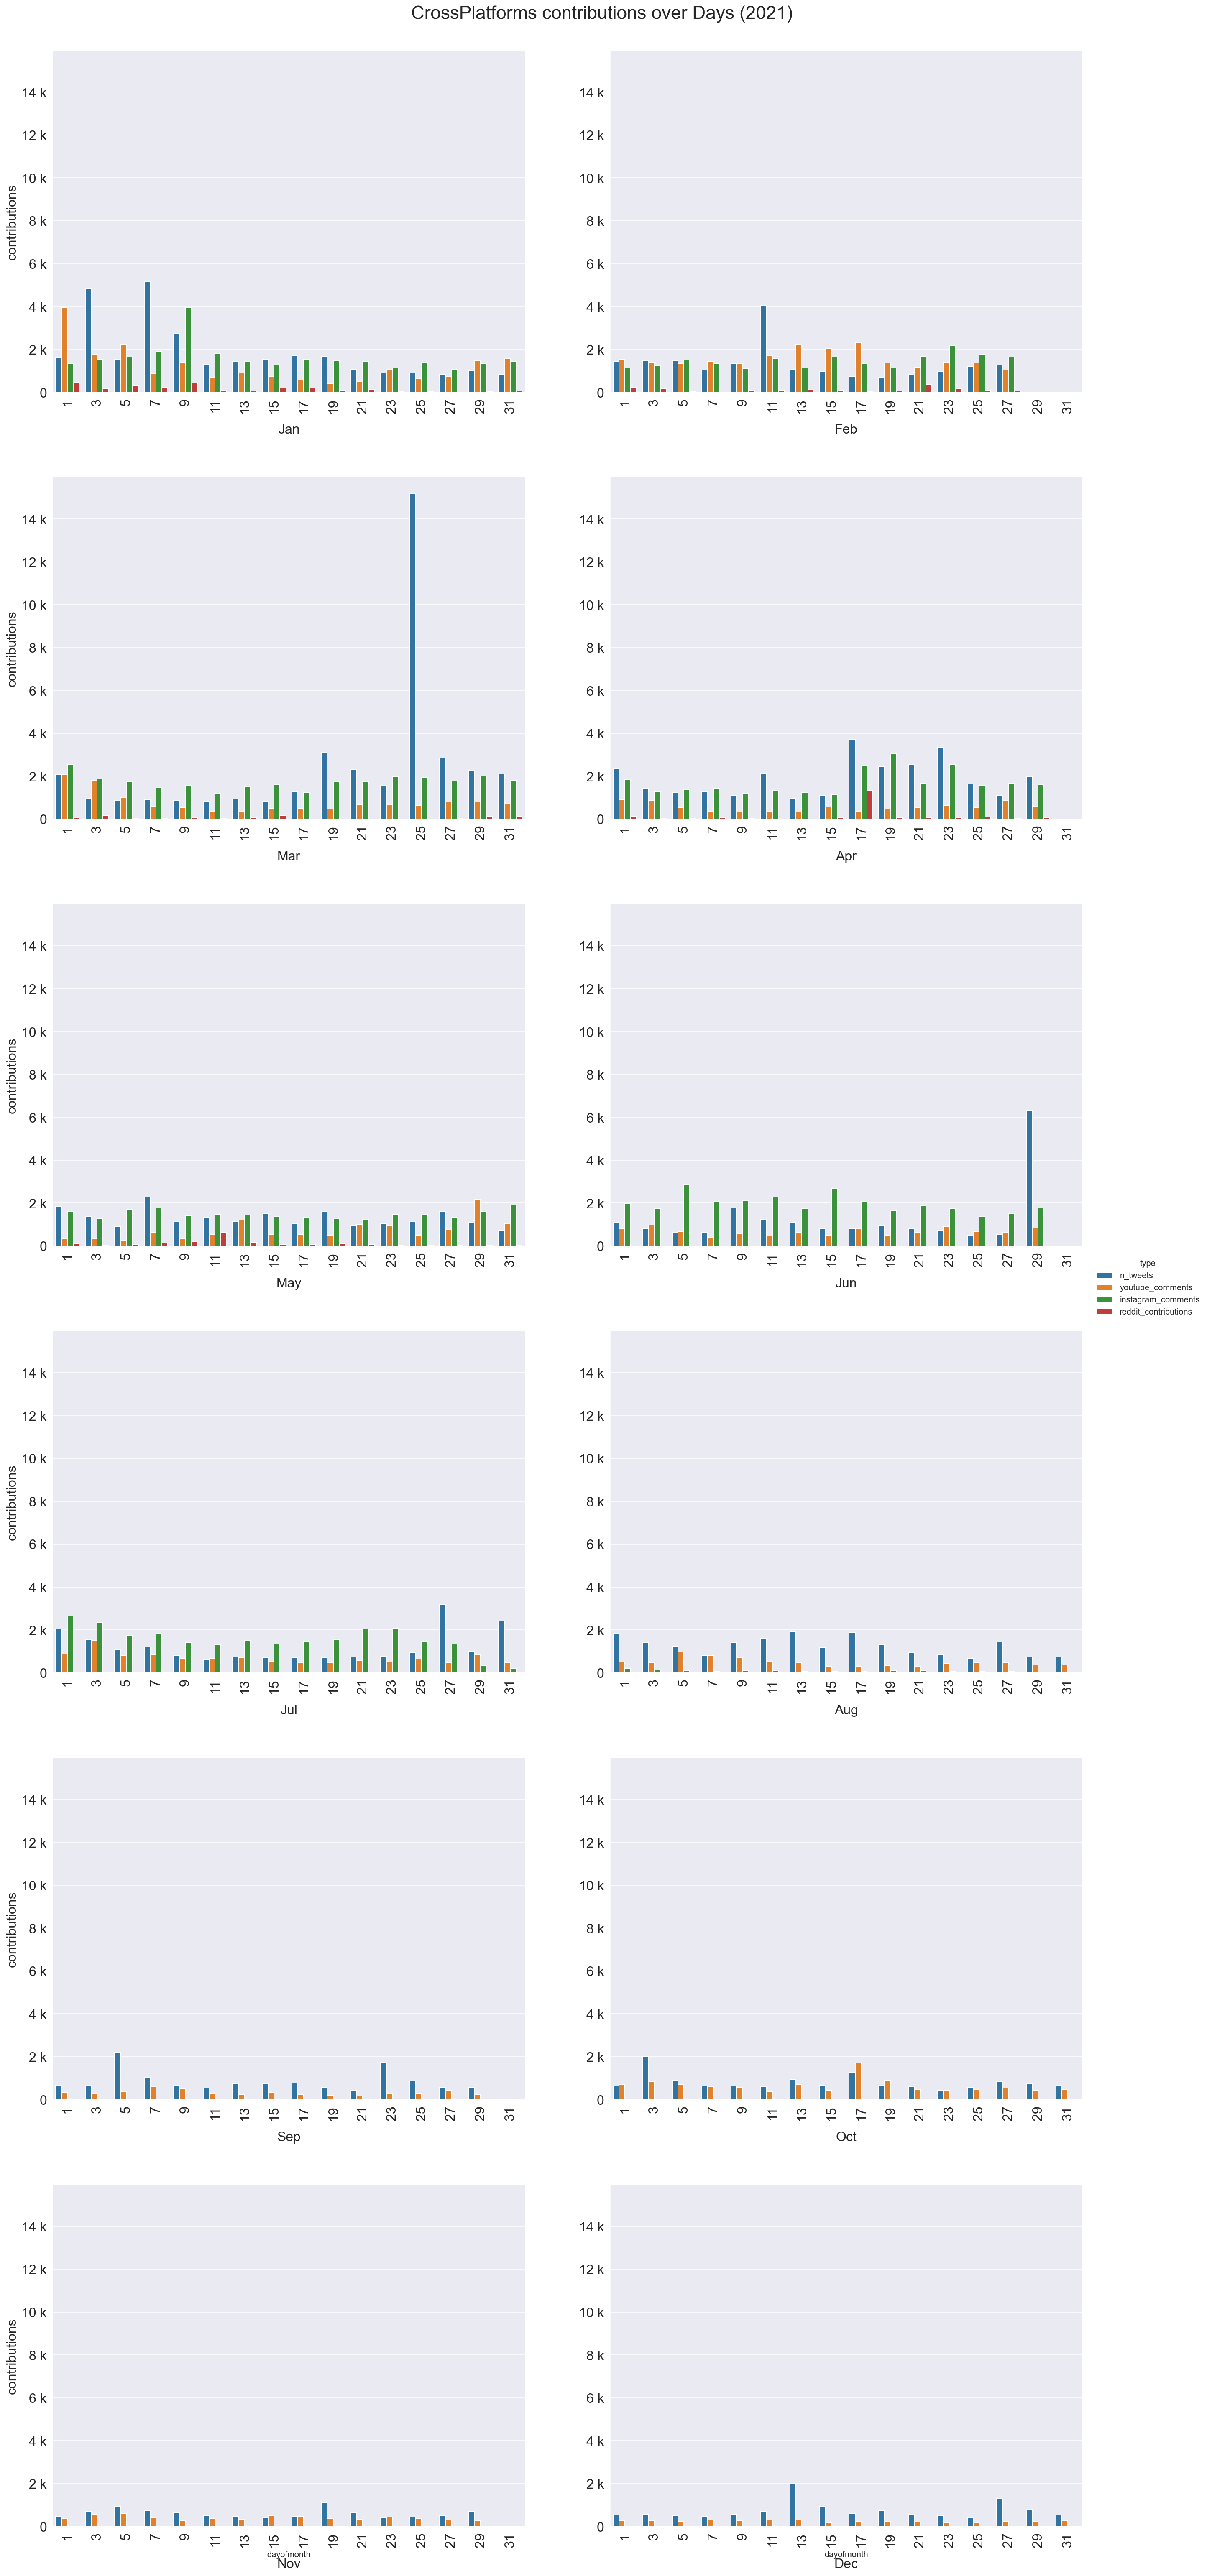

In [29]:
helpers.days_cross(df_days_21, x="dayofmonth", y="contributions", facet_on='month', n_col=2, h=7, loc=-0.135, 
                   ratio=1.3, fs=16, year_str='2021')

## 2022

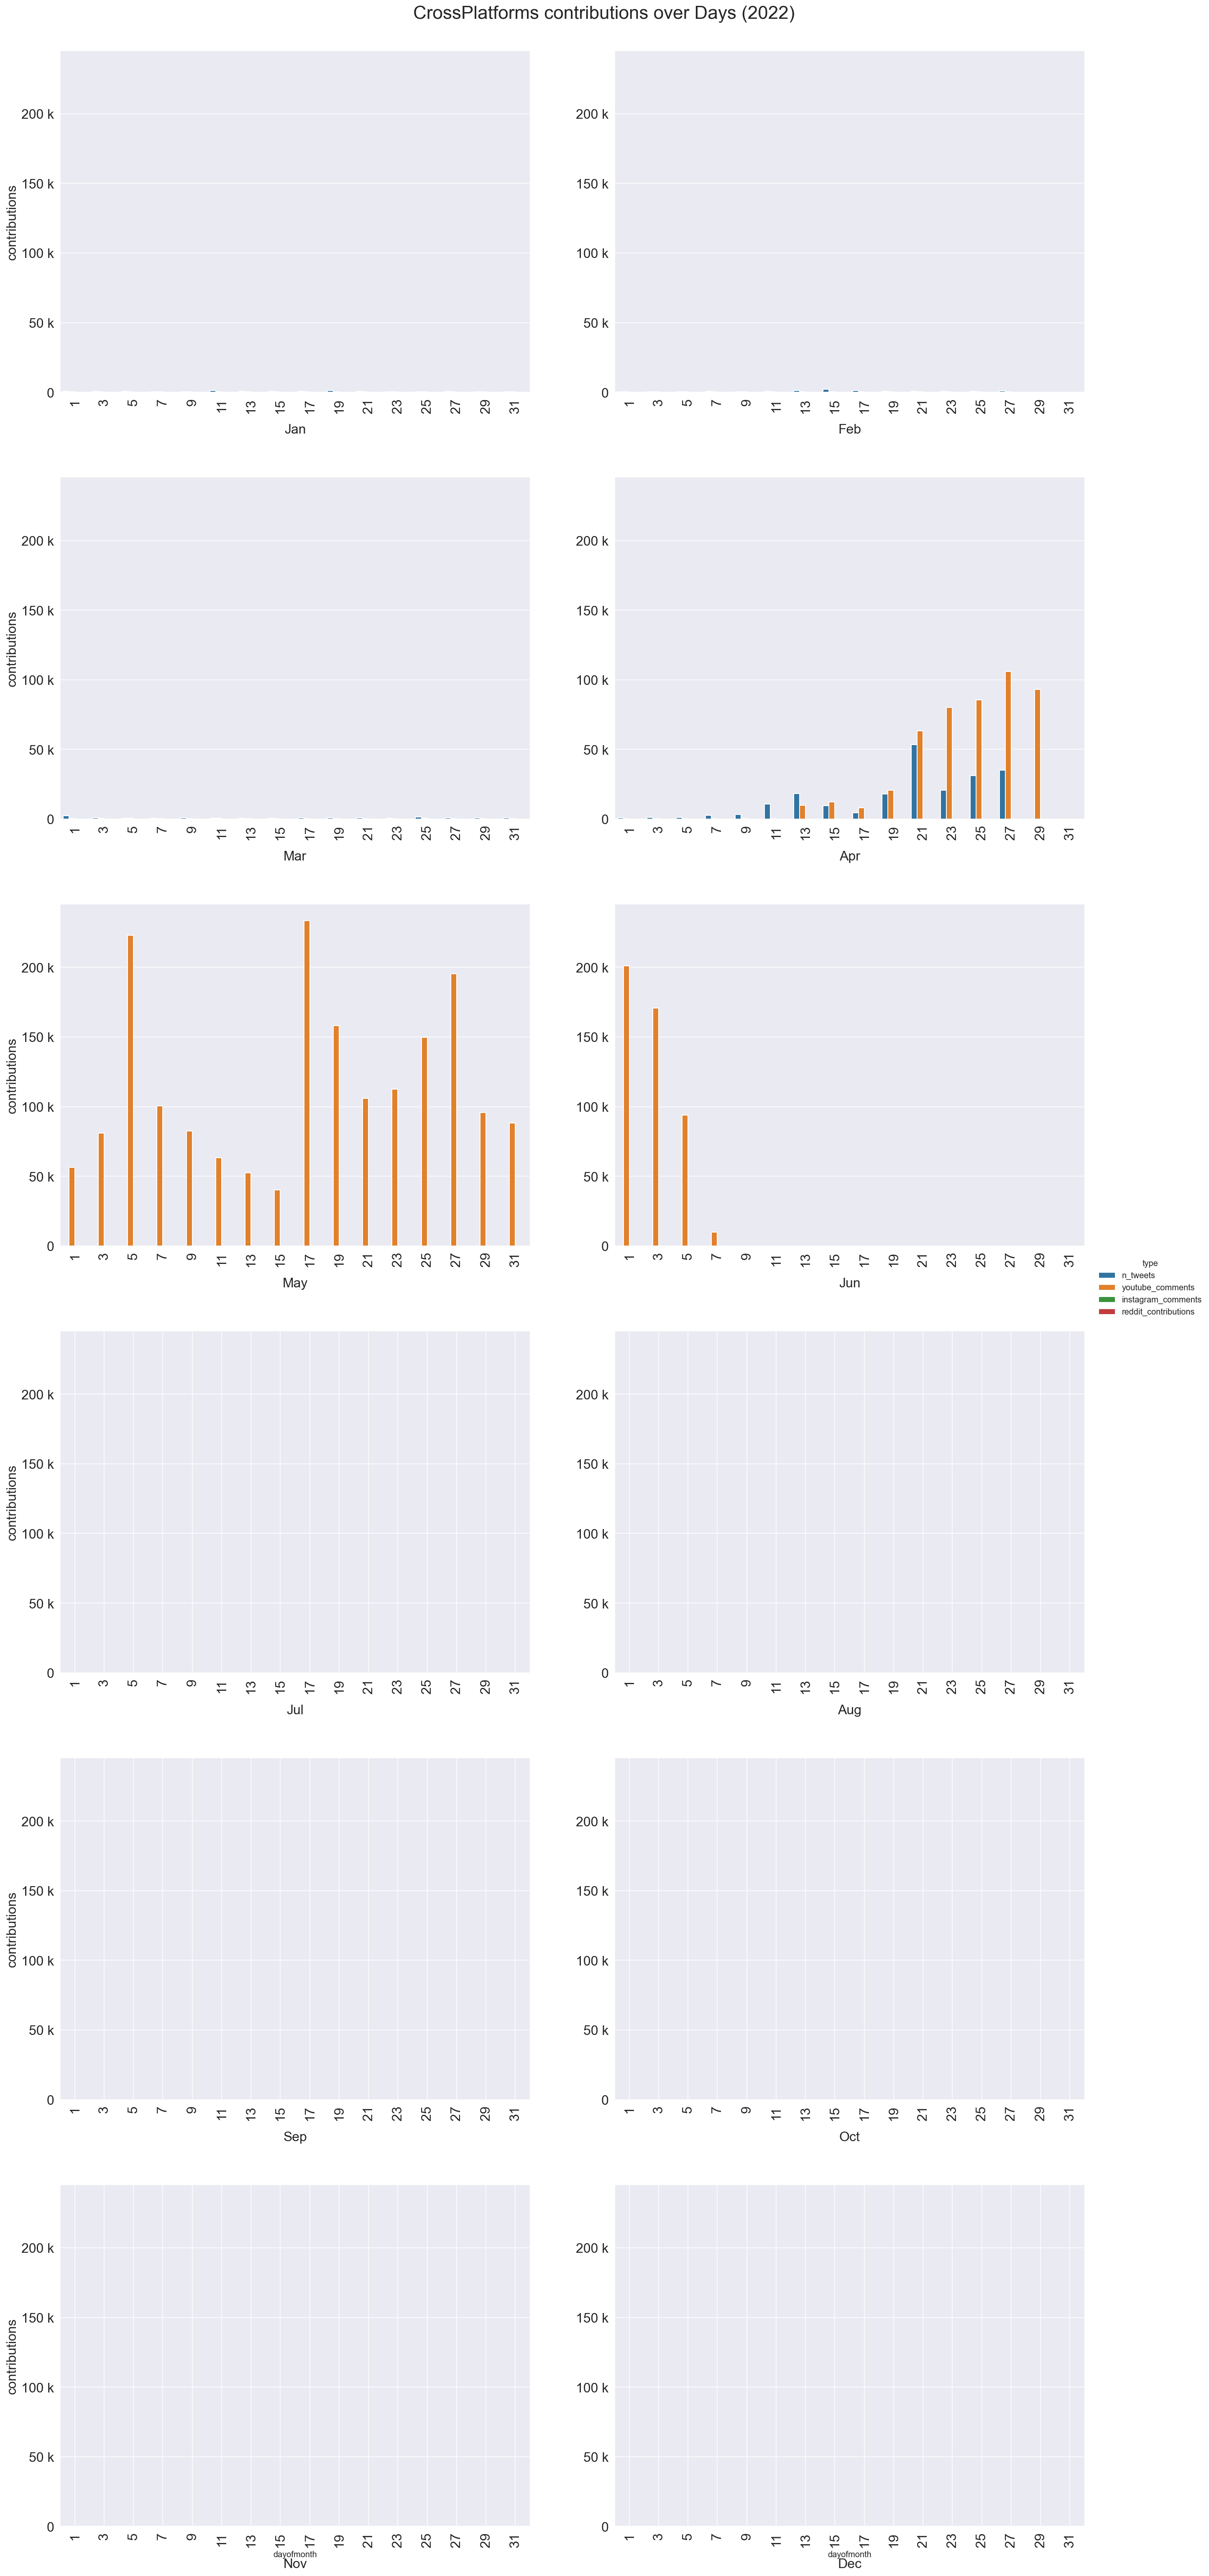

In [30]:
helpers.days_cross(df_days_22, x="dayofmonth", y="contributions", facet_on='month', n_col=2, h=7, loc=-0.135, 
                   ratio=1.3, fs=16, year_str='2022')

---

## <a id='interactions_over_time'></a>
> ## Exploring Interactions OVER TIME
> <ul>
 <li><a href="#over_time">Contributions OVER TIME</a></li>
 <li><a href="#interactions_over_time"><b>Interactions OVER TIME</b></a></li>
 <li><a href="#top_text">Most Repeated Text</a></li>
 <li><a href="#top_users">Top Commented Users</a></li>
 </ul>

|Platform | Interactions|
|:-|:-|
|Twitter|total_retweets + reply_count + like_count|
|YouTube| n_views + n_likes + n_comments|
|Instagram| n_replies + n_likes|
|Reddit| reddit_contributions_score (Upvotes - Downvotes) |

>>**Note**
>- We don't have **'favorite_count'** in the twitter metrics data (from kaggle)
>- But we have it for the 5 months data that Adel rescraped
>- New YouTube data don't have **dislikes**, as YouTube disabled the **"dislike feature"**.
>- Youtube was separated from the interactions comparison (since it has way larger values than others)

<a id='all_days_inter'></a>
>>### CrossPlatforms Interactions TimeSeries
> <ul>
 <li><a href="#all_days_inter"><b>CrossPlatforms Interactions TimeSeries</b></a></li>
 <li><a href="#all_years_inter">CrossPlatforms Interactions over Years</a></li>
 <li><a href="#all_months_inter">CrossPlatforms Interactions over Months</a></li>
 <li><a href="#over_days_inter">CrossPlatforms Interactions in Each Day</a></li>
 </ul>

In [31]:
df_days_inter = df_creations.groupby('date')['tweets_interactions', "youtube_videos_interactions", "instagram_comments_interactions", 'reddit_contributions_score'].sum().reset_index()
# df_days_inter.head()


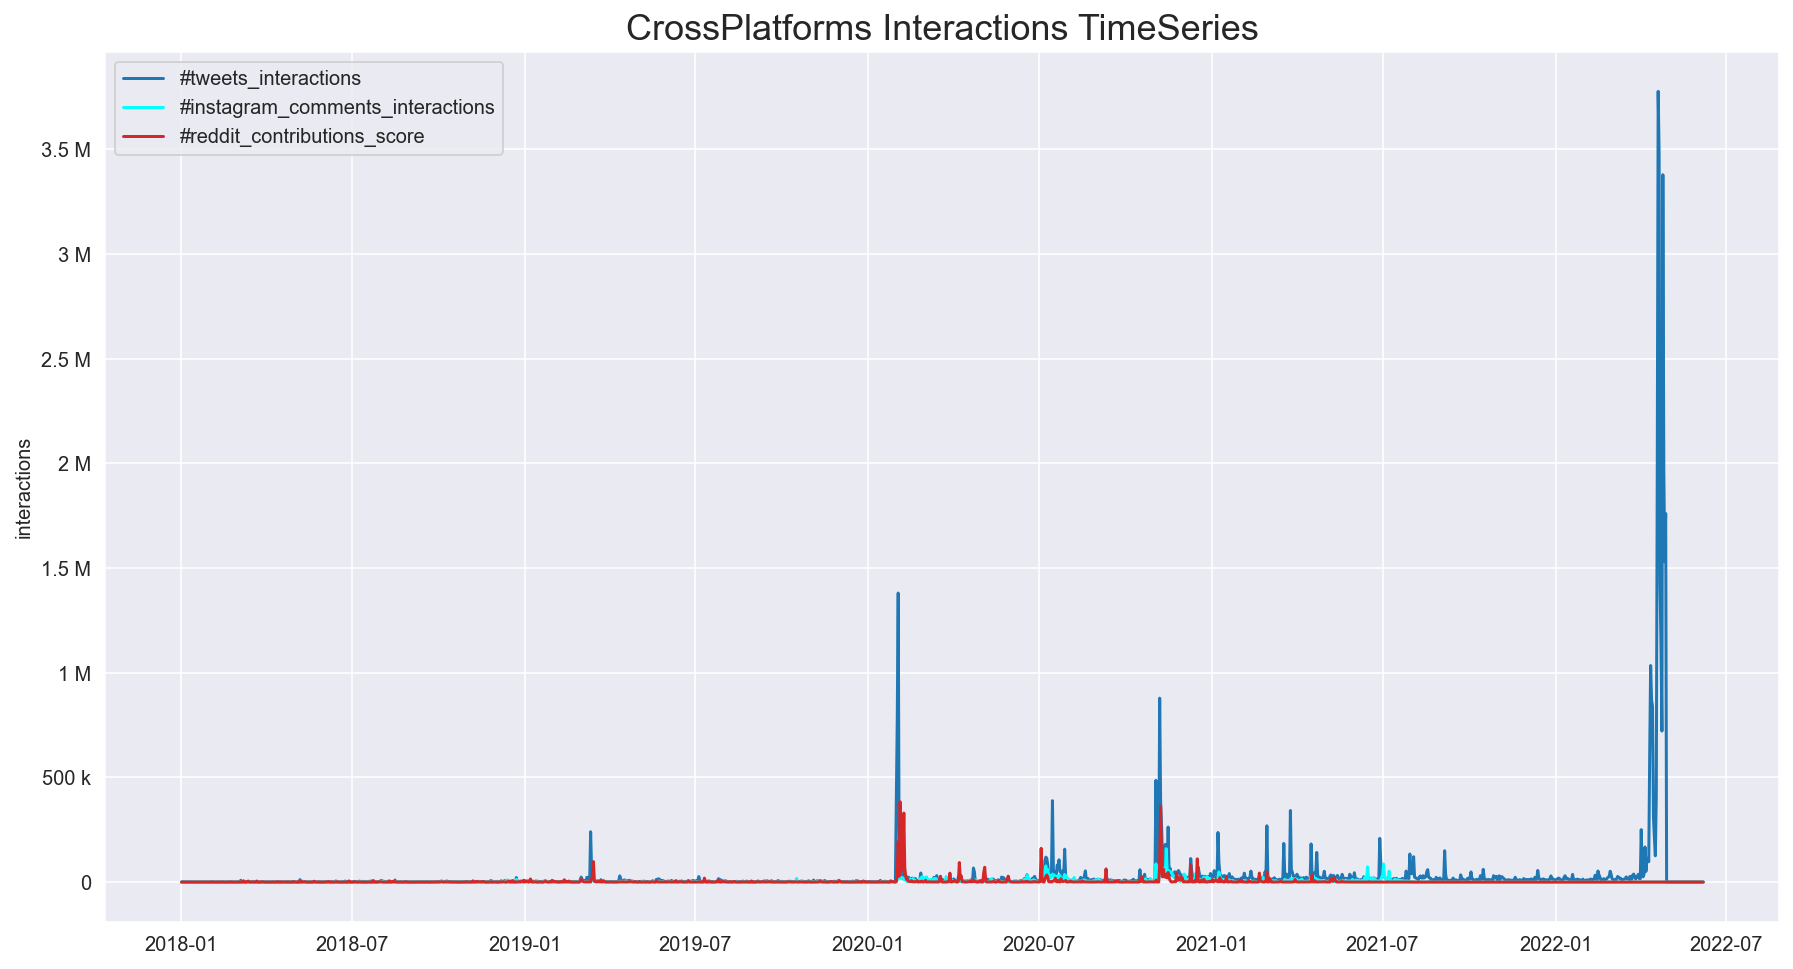

In [32]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(df_days_inter['date'], df_days_inter["tweets_interactions"], 
         label="#tweets_interactions", color="tab:blue");
# plt.plot(df_days_inter['date'], df_days_inter["youtube_videos_interactions"], label="#youtube_videos_interactions");
plt.plot(df_days_inter['date'], df_days_inter["instagram_comments_interactions"], 
         label="#instagram_comments_interactions", color="cyan");
plt.plot(df_days_inter['date'], df_days_inter["reddit_contributions_score"], 
         label="#reddit_contributions_score", color="tab:red");

plt.ylabel('interactions')
plt.title("CrossPlatforms Interactions TimeSeries", fontsize=18)
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))
ax.yaxis.set_major_formatter(tkr.EngFormatter())

plt.legend();

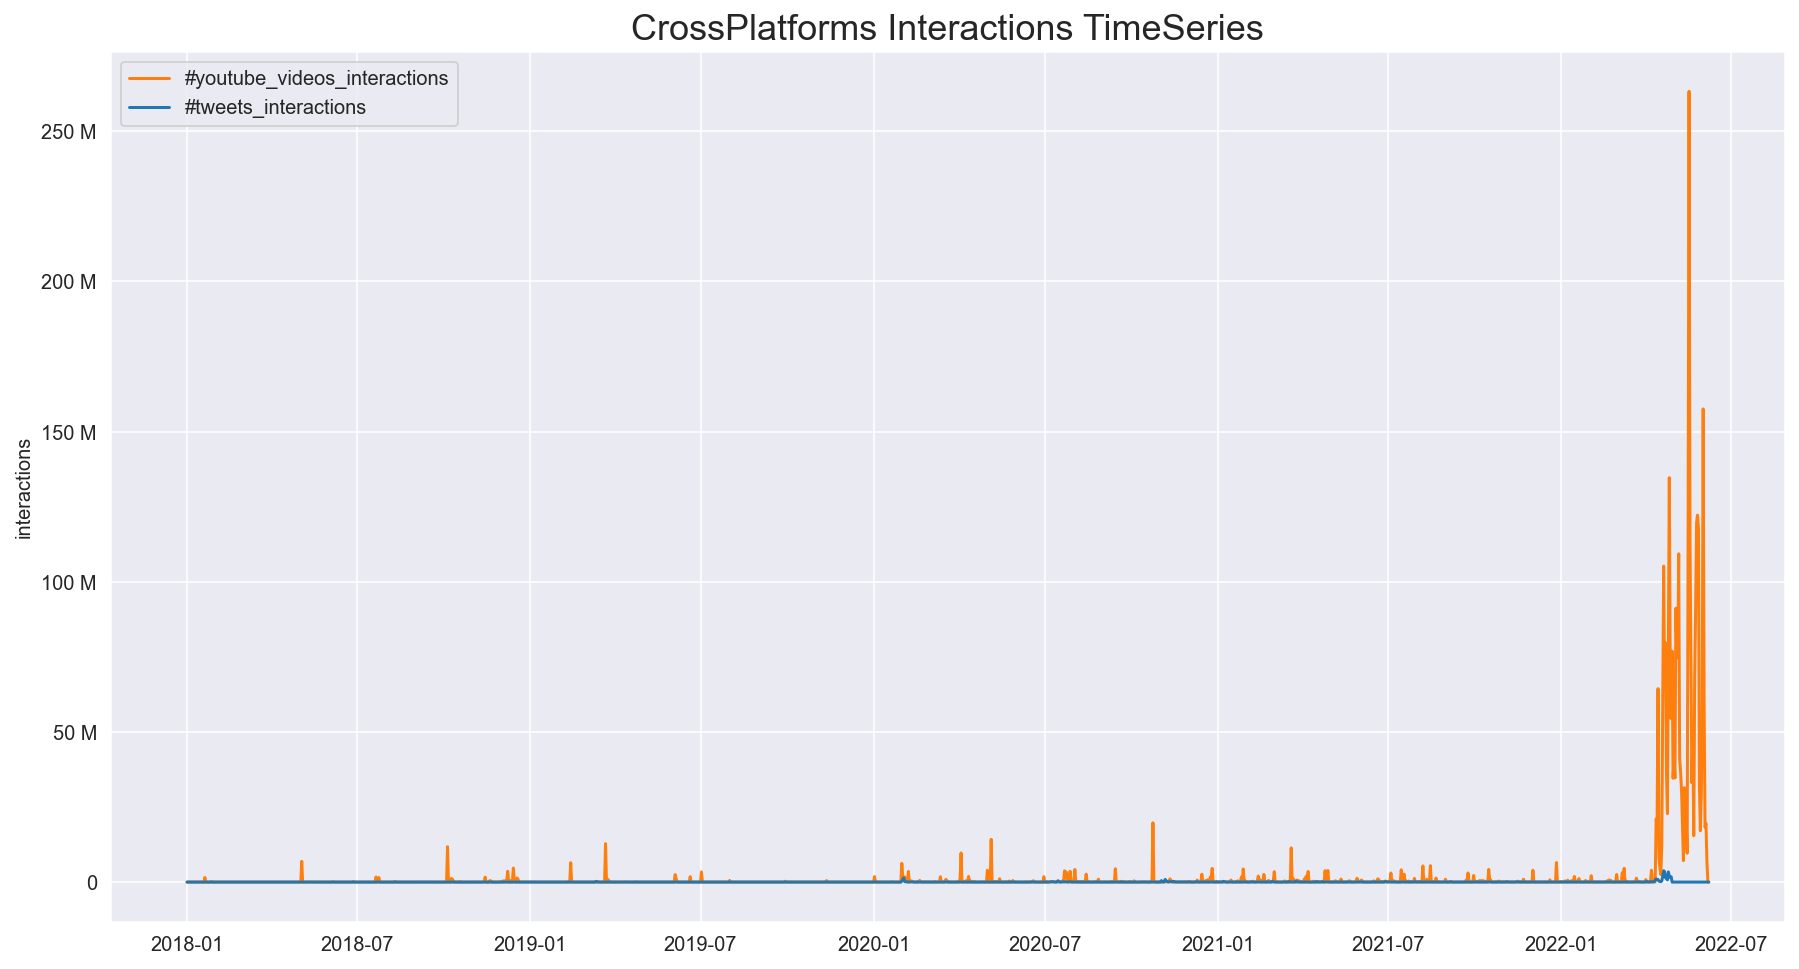

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(df_days_inter['date'], df_days_inter["youtube_videos_interactions"], 
         label="#youtube_videos_interactions", color="tab:orange");
plt.plot(df_days_inter['date'], df_days_inter["tweets_interactions"], 
         label="#tweets_interactions", color="tab:blue");
plt.ylabel('interactions')
plt.title("CrossPlatforms Interactions TimeSeries", fontsize=18)
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))
ax.yaxis.set_major_formatter(tkr.EngFormatter())

plt.legend();


<a id='all_years_inter'></a>
>>### CrossPlatforms Interactions over Years
> <ul>
 <li><a href="#all_days_inter">CrossPlatforms Interactions TimeSeries</a></li>
 <li><a href="#all_years_inter"><b>CrossPlatforms Interactions over Years</b></a></li>
 <li><a href="#all_months_inter">CrossPlatforms Interactions over Months</a></li>
 <li><a href="#over_days_inter">CrossPlatforms Interactions in Each Day</a></li>
 </ul>

In [34]:
df_years_inter = df_creations.groupby('year')['tweets_interactions', "youtube_videos_interactions", "instagram_comments_interactions", 'reddit_contributions_score'].sum().reset_index()
df_years_inter2 = df_years_inter.copy()

for col in ['tweets_interactions', "youtube_videos_interactions", "instagram_comments_interactions", 'reddit_contributions_score']:
    df_years_inter2[col] = df_years_inter2[col].apply(lambda x: f'{x/1000000000:.1f}B' if x/1000000000>=1 else f'{x/1000000:.1f}M' if x/1000000>=1 else f'{x/1000:.1f}K' if x/10000>=1 else f'{x}')

df_years_inter2

year tweets_interactions youtube_videos_interactions  \
0  2018              355.4K                       44.4M   
1  2019                1.5M                       31.6M   
2  2020               11.8M                      129.4M   
3  2021                8.6M                      119.7M   
4  2022               27.9M                        3.2B   

  instagram_comments_interactions reddit_contributions_score  
0                          423.8K                     254.4K  
1                          626.8K                     564.5K  
2                            3.9M                       3.8M  
3                            1.8M                     437.0K  
4                             0.0                        0.0

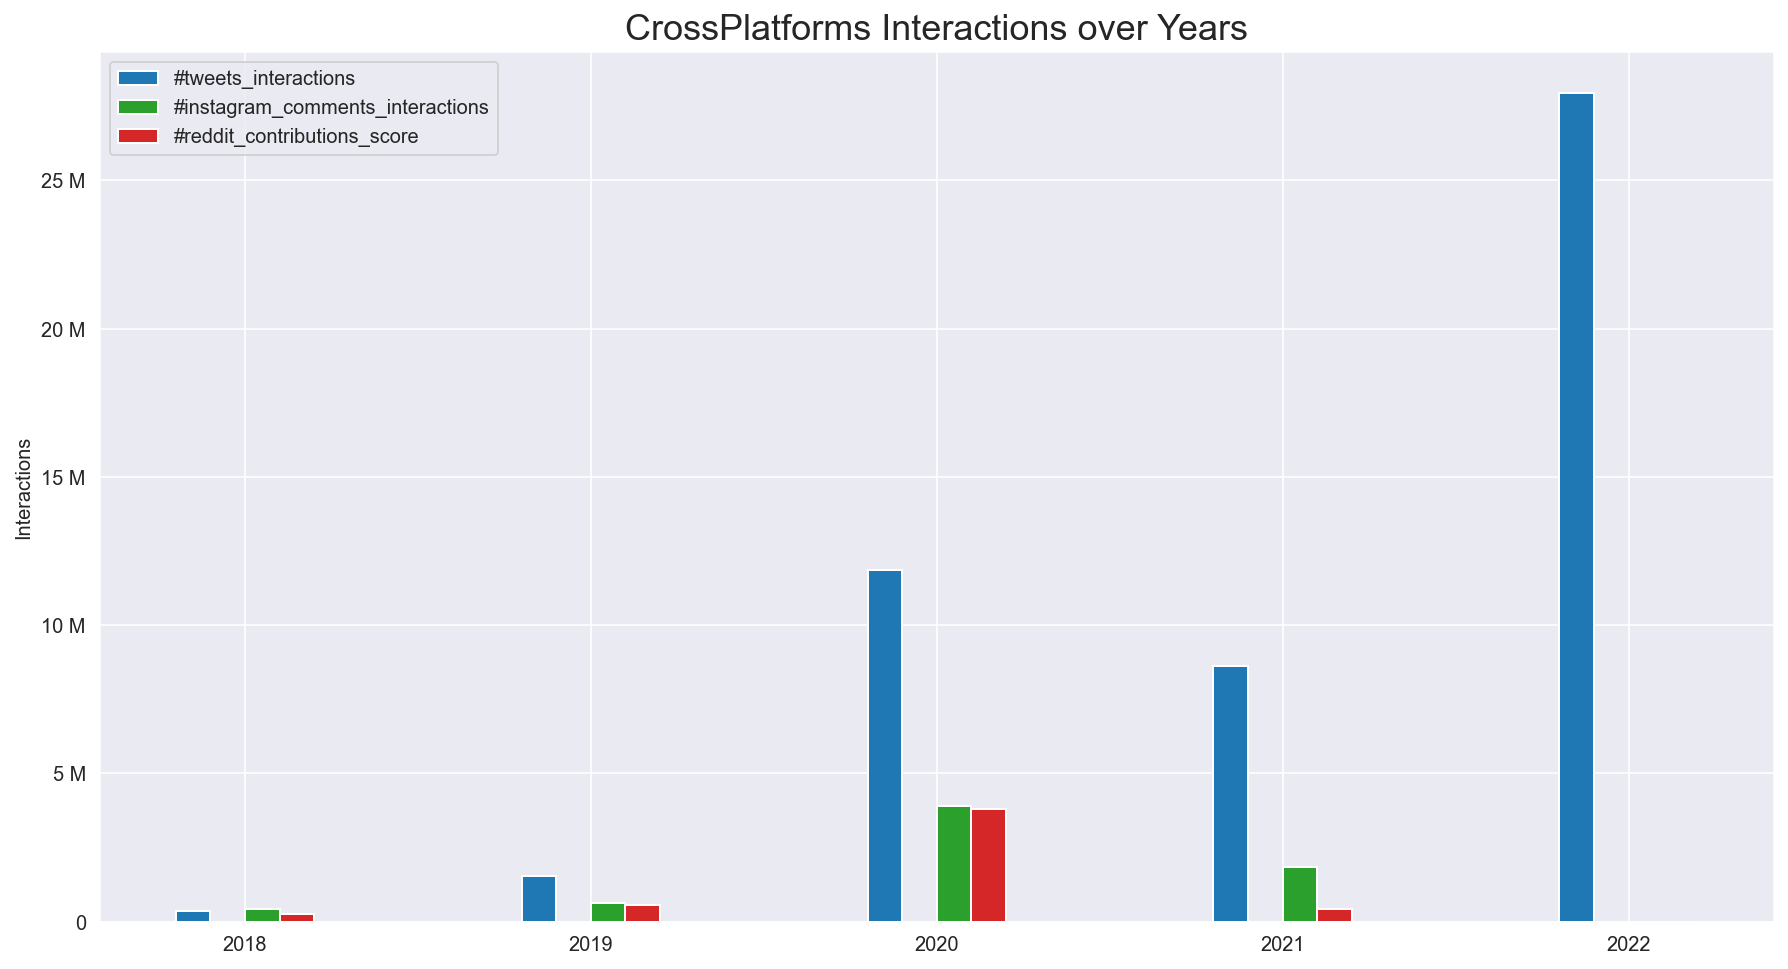

In [35]:
x_axis = df_years["year"]
fig, ax = plt.subplots(figsize=(15,8))
plt.bar(x_axis - 0.15, df_years_inter["tweets_interactions"], width=0.1,
        label="#tweets_interactions", color="tab:blue");
# plt.bar(x_axis - 0.05, df_years_inter["youtube_videos_interactions"], width=0.1, label="#youtube_videos_interactions");
plt.bar(x_axis + 0.05, df_years_inter["instagram_comments_interactions"], width=0.1, 
        label="#instagram_comments_interactions", color="tab:green");
plt.bar(x_axis + 0.15, df_years_inter["reddit_contributions_score"], width=0.1,
        label="#reddit_contributions_score", color="tab:red");

plt.ylabel('Interactions')
plt.title("CrossPlatforms Interactions over Years", fontsize=18)
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))
ax.yaxis.set_major_formatter(tkr.EngFormatter())

plt.legend();

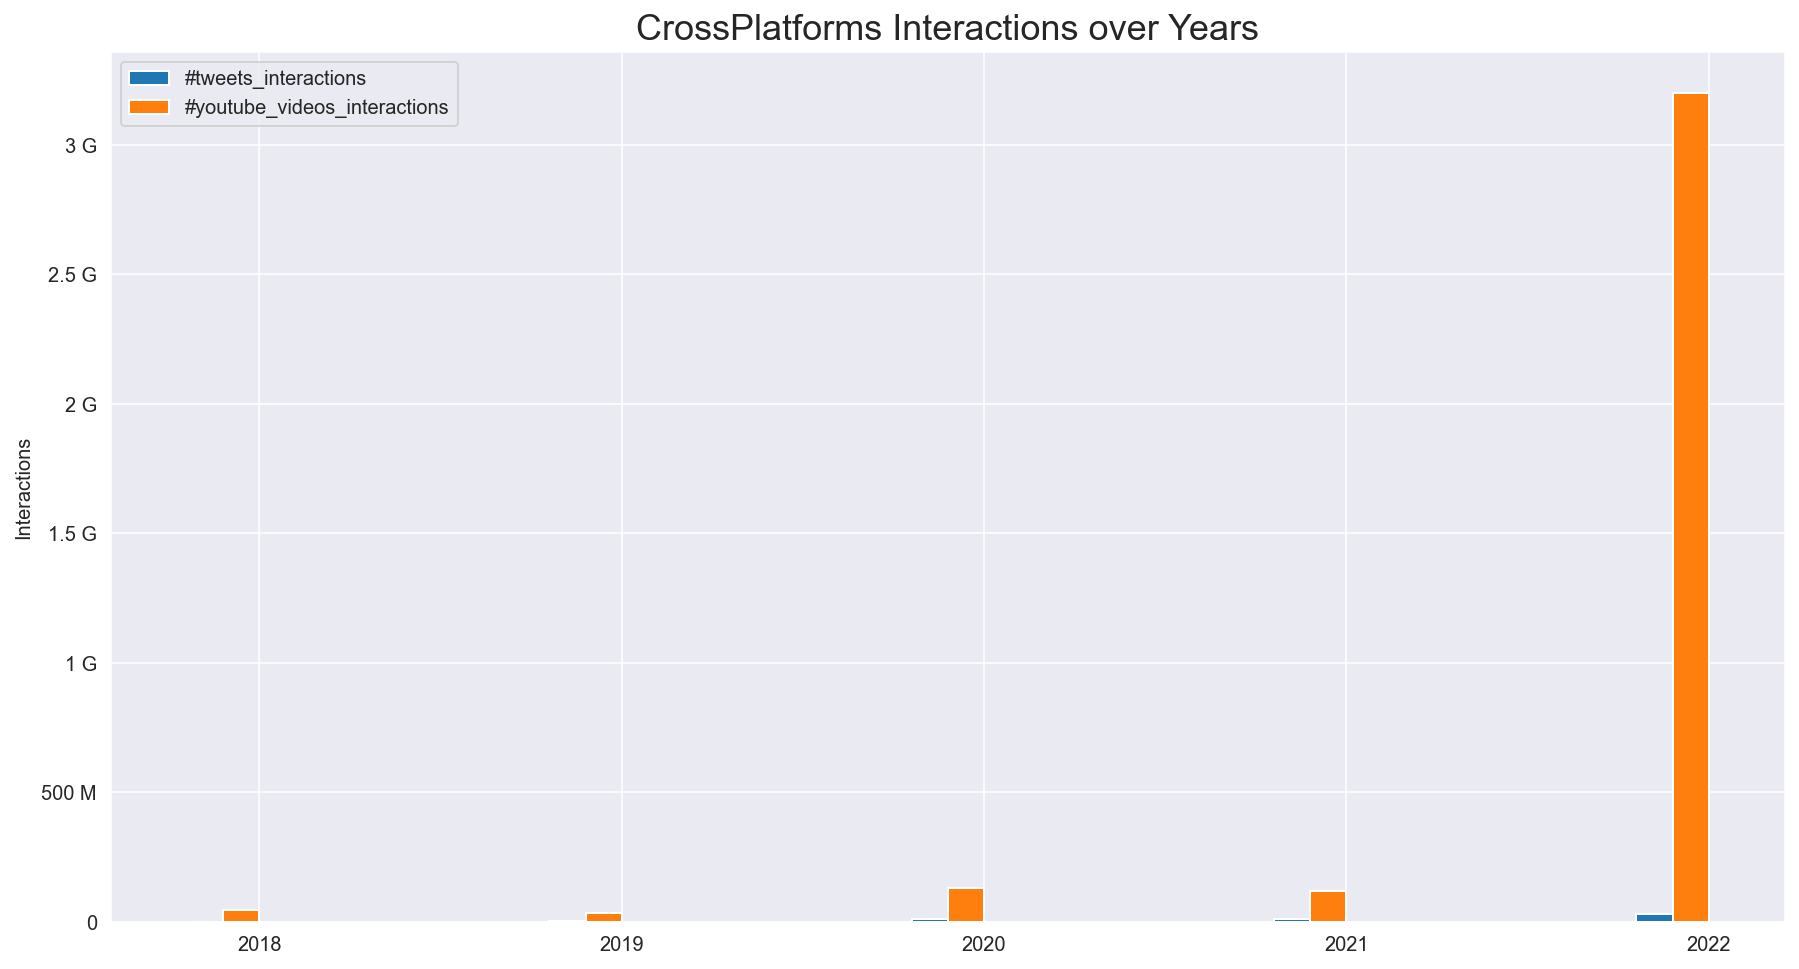

In [36]:
x_axis = df_years["year"]
fig, ax = plt.subplots(figsize=(15,8))
plt.bar(x_axis - 0.15, df_years_inter["tweets_interactions"], width=0.1,
        label="#tweets_interactions", color="tab:blue");
plt.bar(x_axis - 0.05, df_years_inter["youtube_videos_interactions"], width=0.1,
        label="#youtube_videos_interactions", color="tab:orange");

plt.ylabel('Interactions')
plt.title("CrossPlatforms Interactions over Years", fontsize=18)
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))
ax.yaxis.set_major_formatter(tkr.EngFormatter())

plt.legend();

---

<a id='all_months_inter'></a>
>>### CrossPlatforms Interactions over Months
> <ul>
 <li><a href="#all_days_inter">CrossPlatforms Interactions TimeSeries</a></li>
 <li><a href="#all_years_inter">CrossPlatforms Interactions over Years</a></li>
 <li><a href="#all_months_inter"><b>CrossPlatforms Interactions over Months</b></a></li>
 <li><a href="#over_days_inter">CrossPlatforms Interactions in Each Day</a></li>
 </ul>

In [37]:
tmp = df_creations.groupby(['month', 'year'])['tweets_interactions', "instagram_comments_interactions", 'reddit_contributions_score'].sum().reset_index()
df_month_inter = tmp.melt(id_vars=['month', 'year'], var_name='type', value_name='interactions')
df_month_inter.head(1)

month  year                 type  interactions
0   Apr  2018  tweets_interactions       14185.0

https://stackoverflow.com/questions/52670304/python-facetgrid-with-sns-barplot-and-map-target-no-overlapping-group-bars <br>
https://stackoverflow.com/questions/61455874/facetplot-catplot-seaborn-how-to-change-the-bar-positions

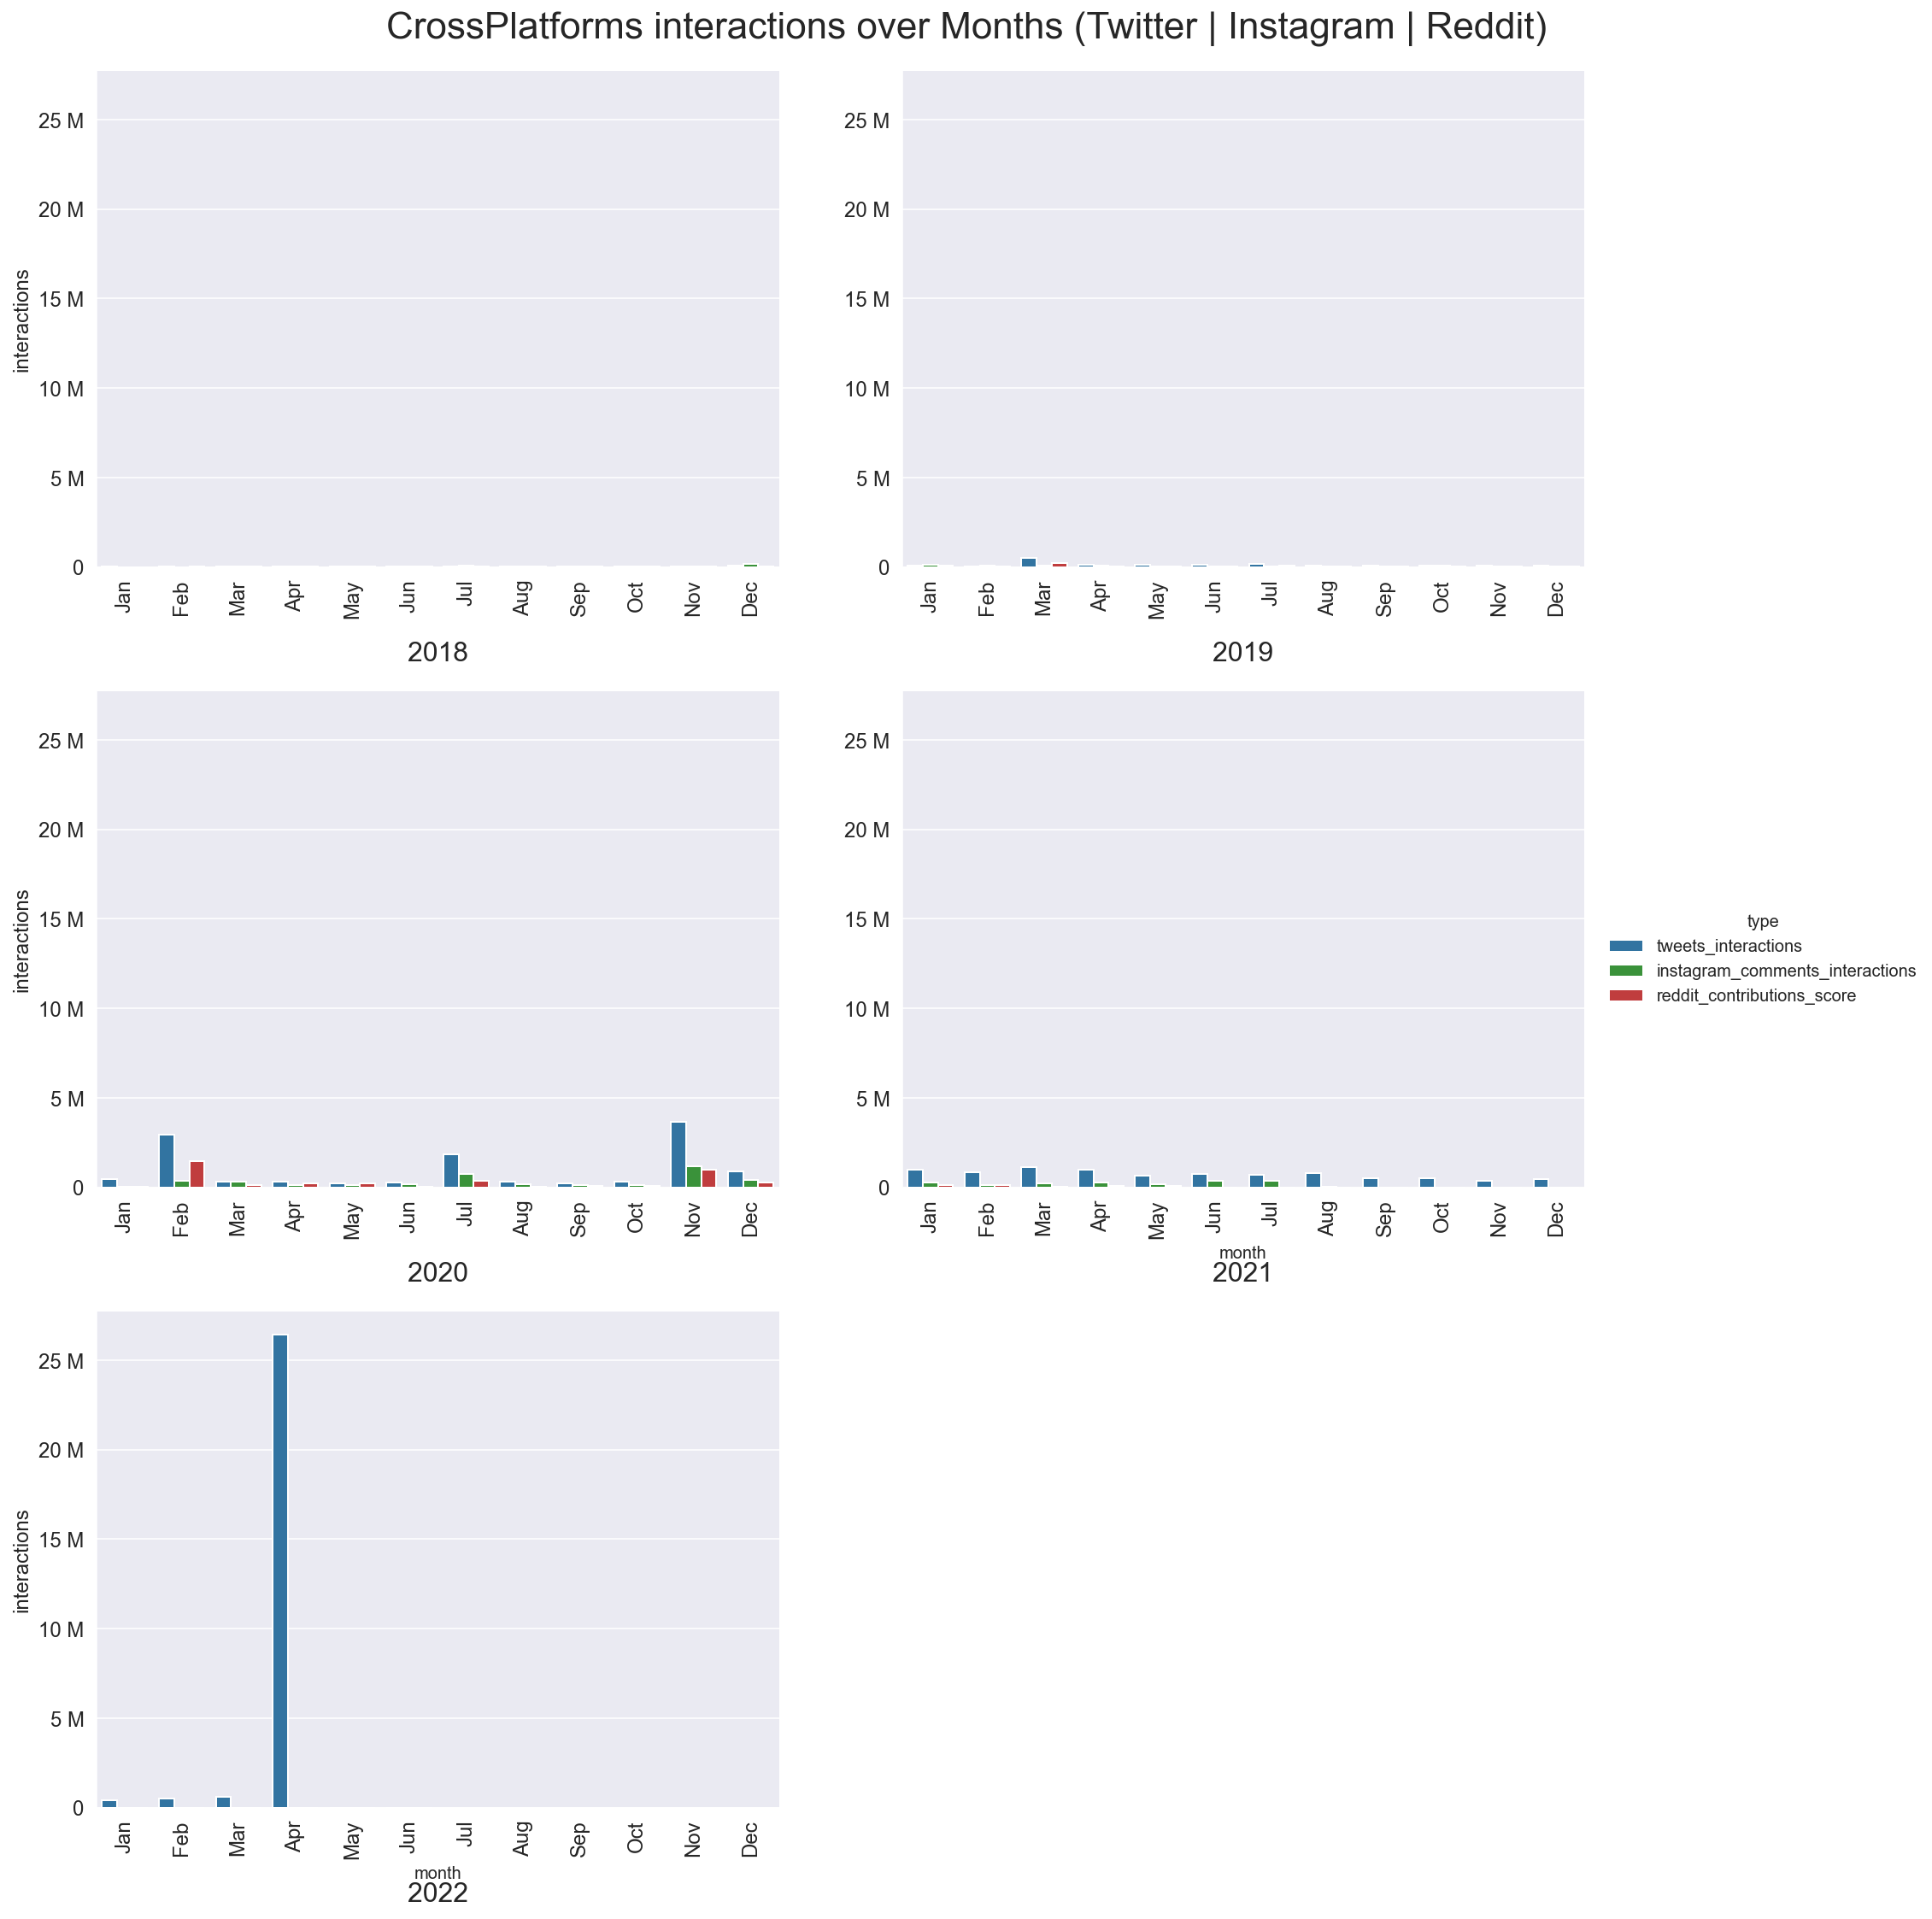

In [38]:
helpers.months_cross(df_month_inter, x="month", y="interactions", facet_on='year', n_col=2, loc=-0.21, 
             year_str='Twitter | Instagram | Reddit', fs=12, c=['tab:blue', 'tab:green', 'tab:red'])

In [39]:
importlib.reload(helpers)

<module 'helpers' from '/Users/mnagy99/jupyter/AH/Cross Platforms/SNA-AH-Cross-Platforms/helpers.py'>

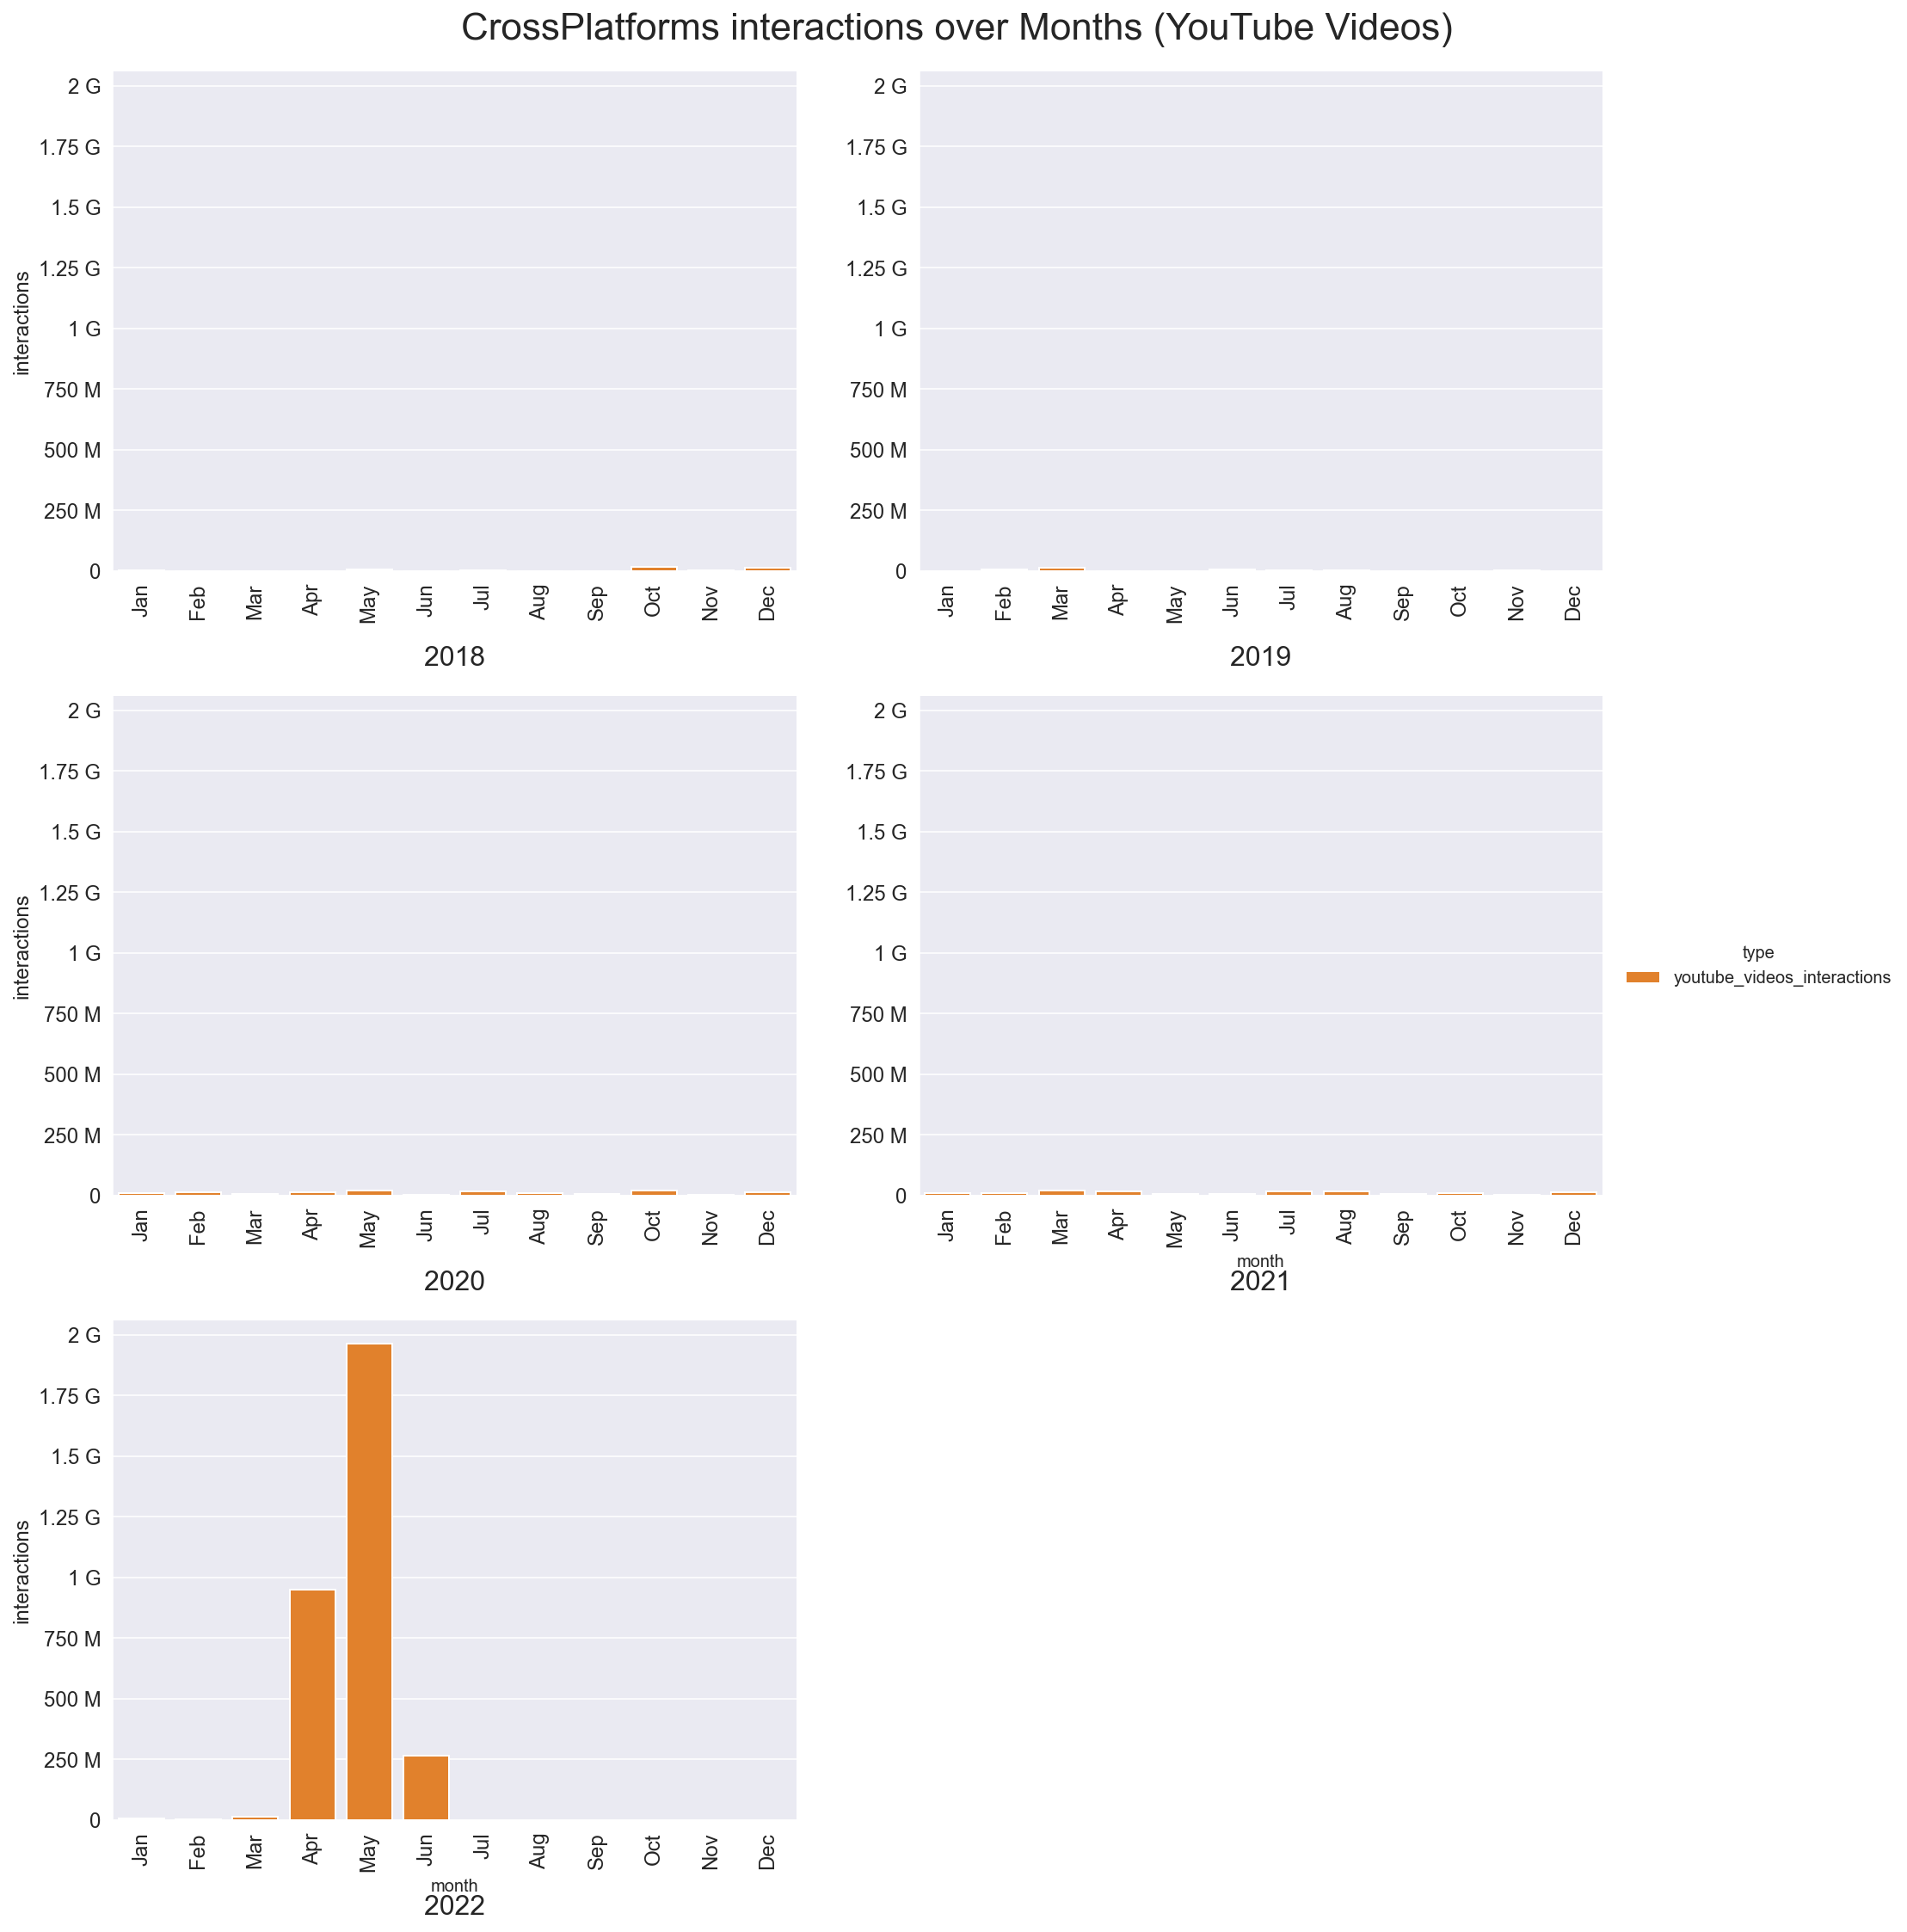

In [40]:
tmp = df_creations.groupby(['month', 'year'])['youtube_videos_interactions'].sum().reset_index()
df_month_inter2 = tmp.melt(id_vars=['month', 'year'], var_name='type', value_name='interactions')
helpers.months_cross(df_month_inter2, x="month", y="interactions", facet_on='year', n_col=2, 
                     year_str='YouTube Videos', fs=12, c=['tab:orange'], loc=-0.21)

In [41]:
df_month_inter_18 = df_month_inter[df_month_inter['year']==2018]
df_month_inter_19 = df_month_inter[df_month_inter['year']==2019]
df_month_inter_20 = df_month_inter[df_month_inter['year']==2020]
df_month_inter_21 = df_month_inter[df_month_inter['year']==2021]
df_month_inter_22 = df_month_inter[df_month_inter['year']==2022]

## CrossPlatform Interactions over Months (Twitter | Instagram | Reddit)

In [42]:
# importlib.reload(helpers)

## 2018

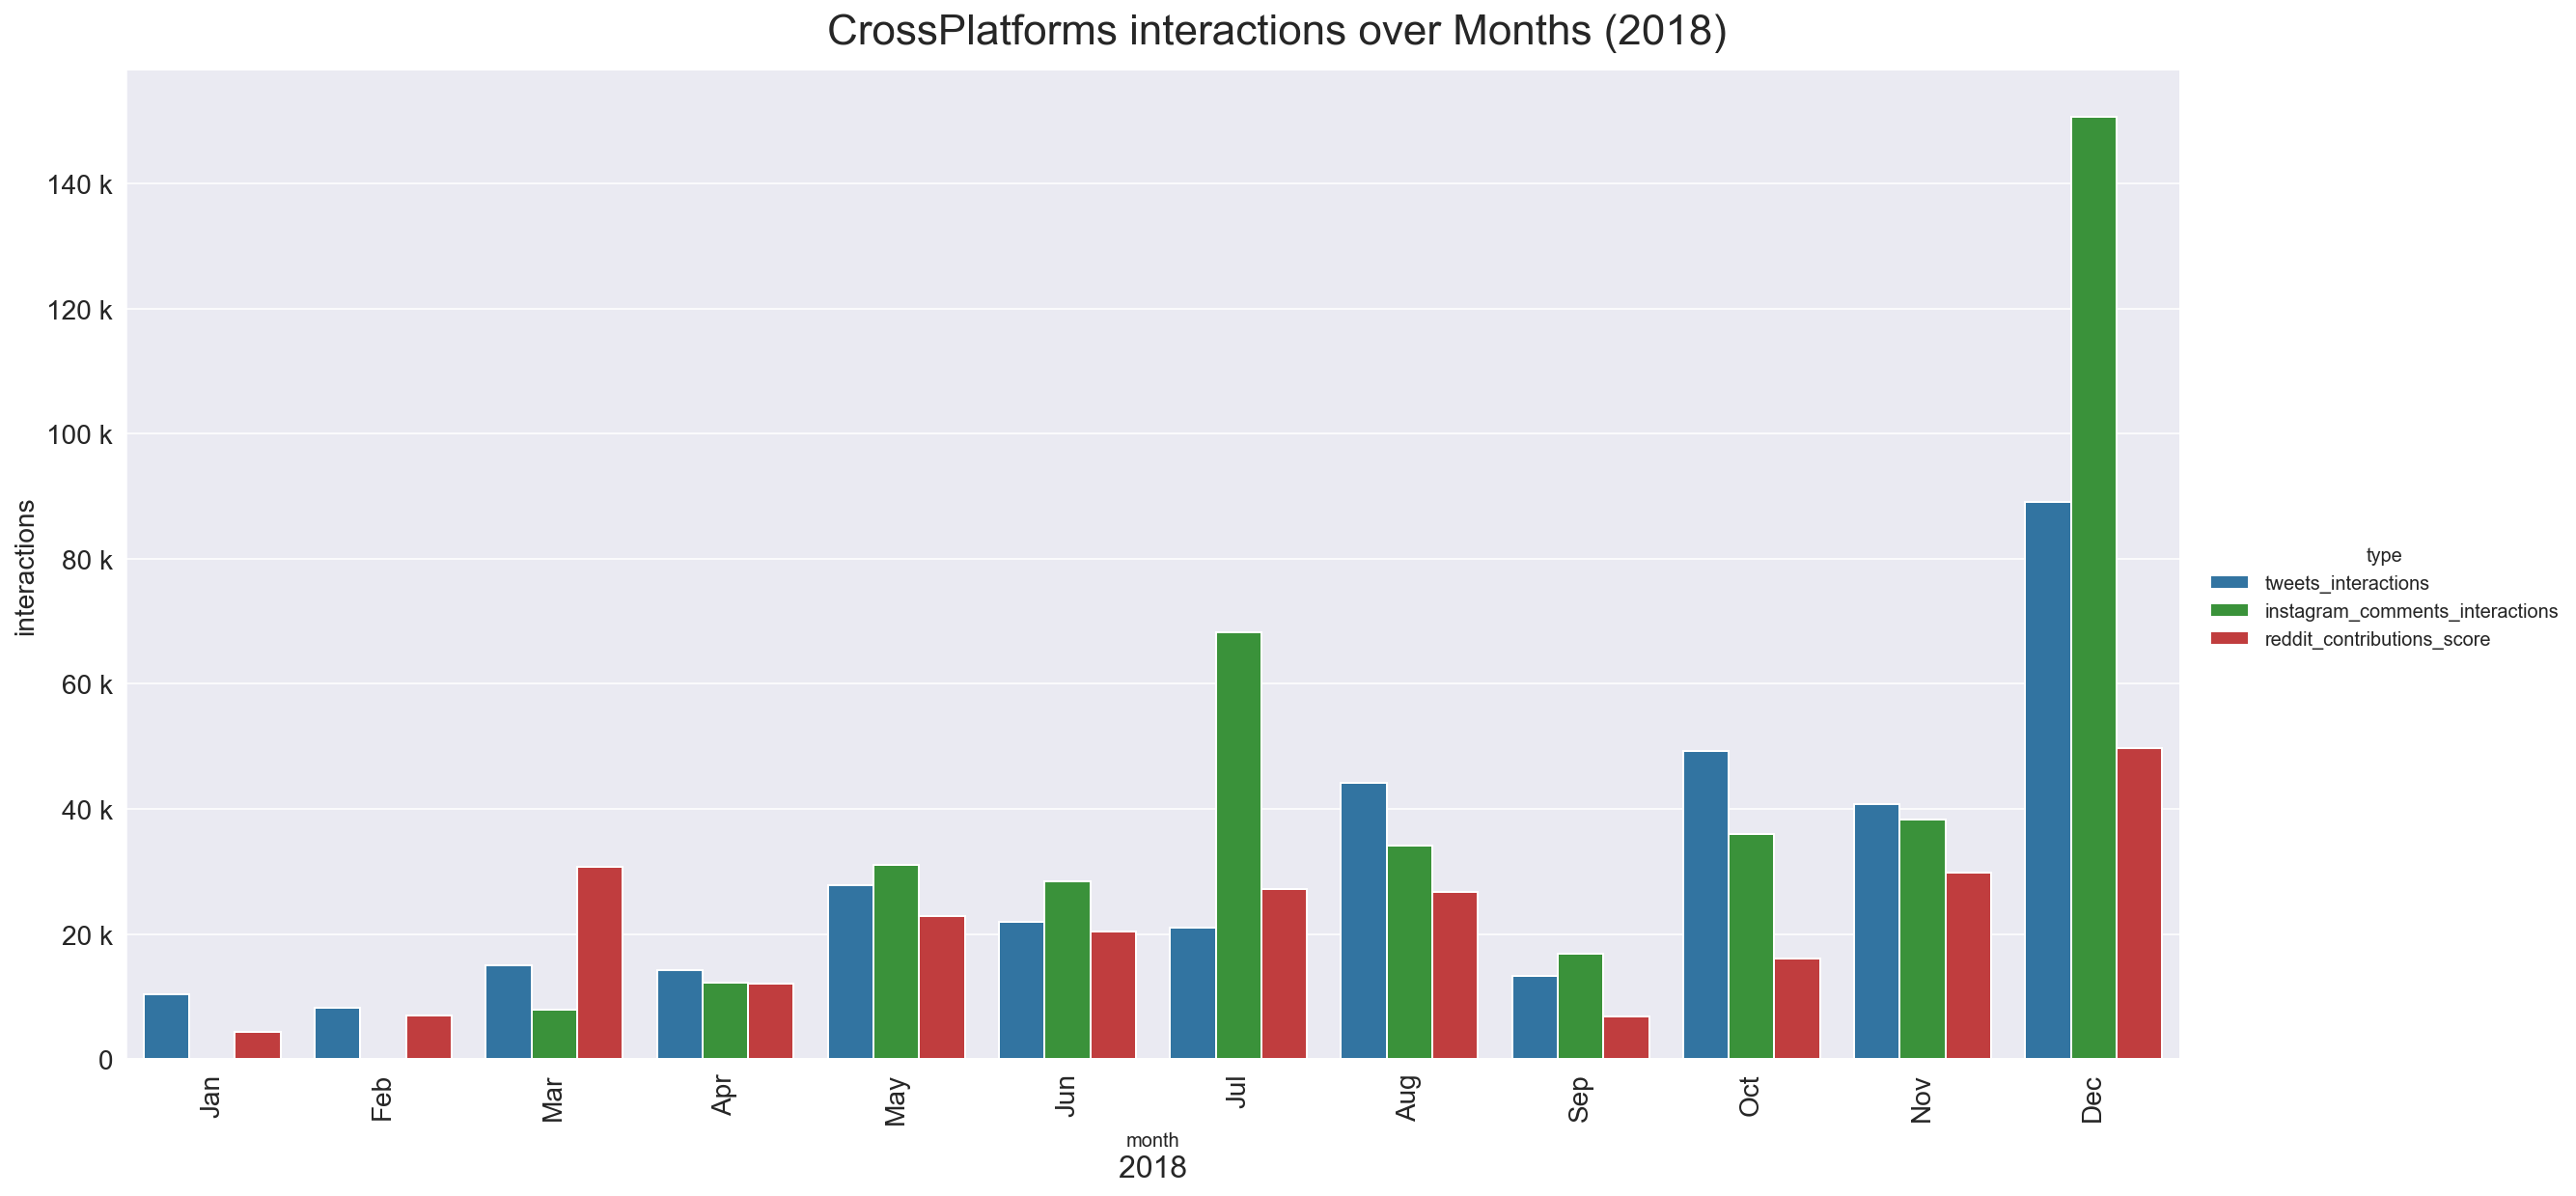

In [43]:
helpers.months_cross(df_month_inter_18, x="month", y="interactions", facet_on='year', n_col=1, h=8, loc=-0.13, 
                     ratio=2, fs=14, year_str='2018', c=['tab:blue', 'tab:green', 'tab:red'])

## 2019

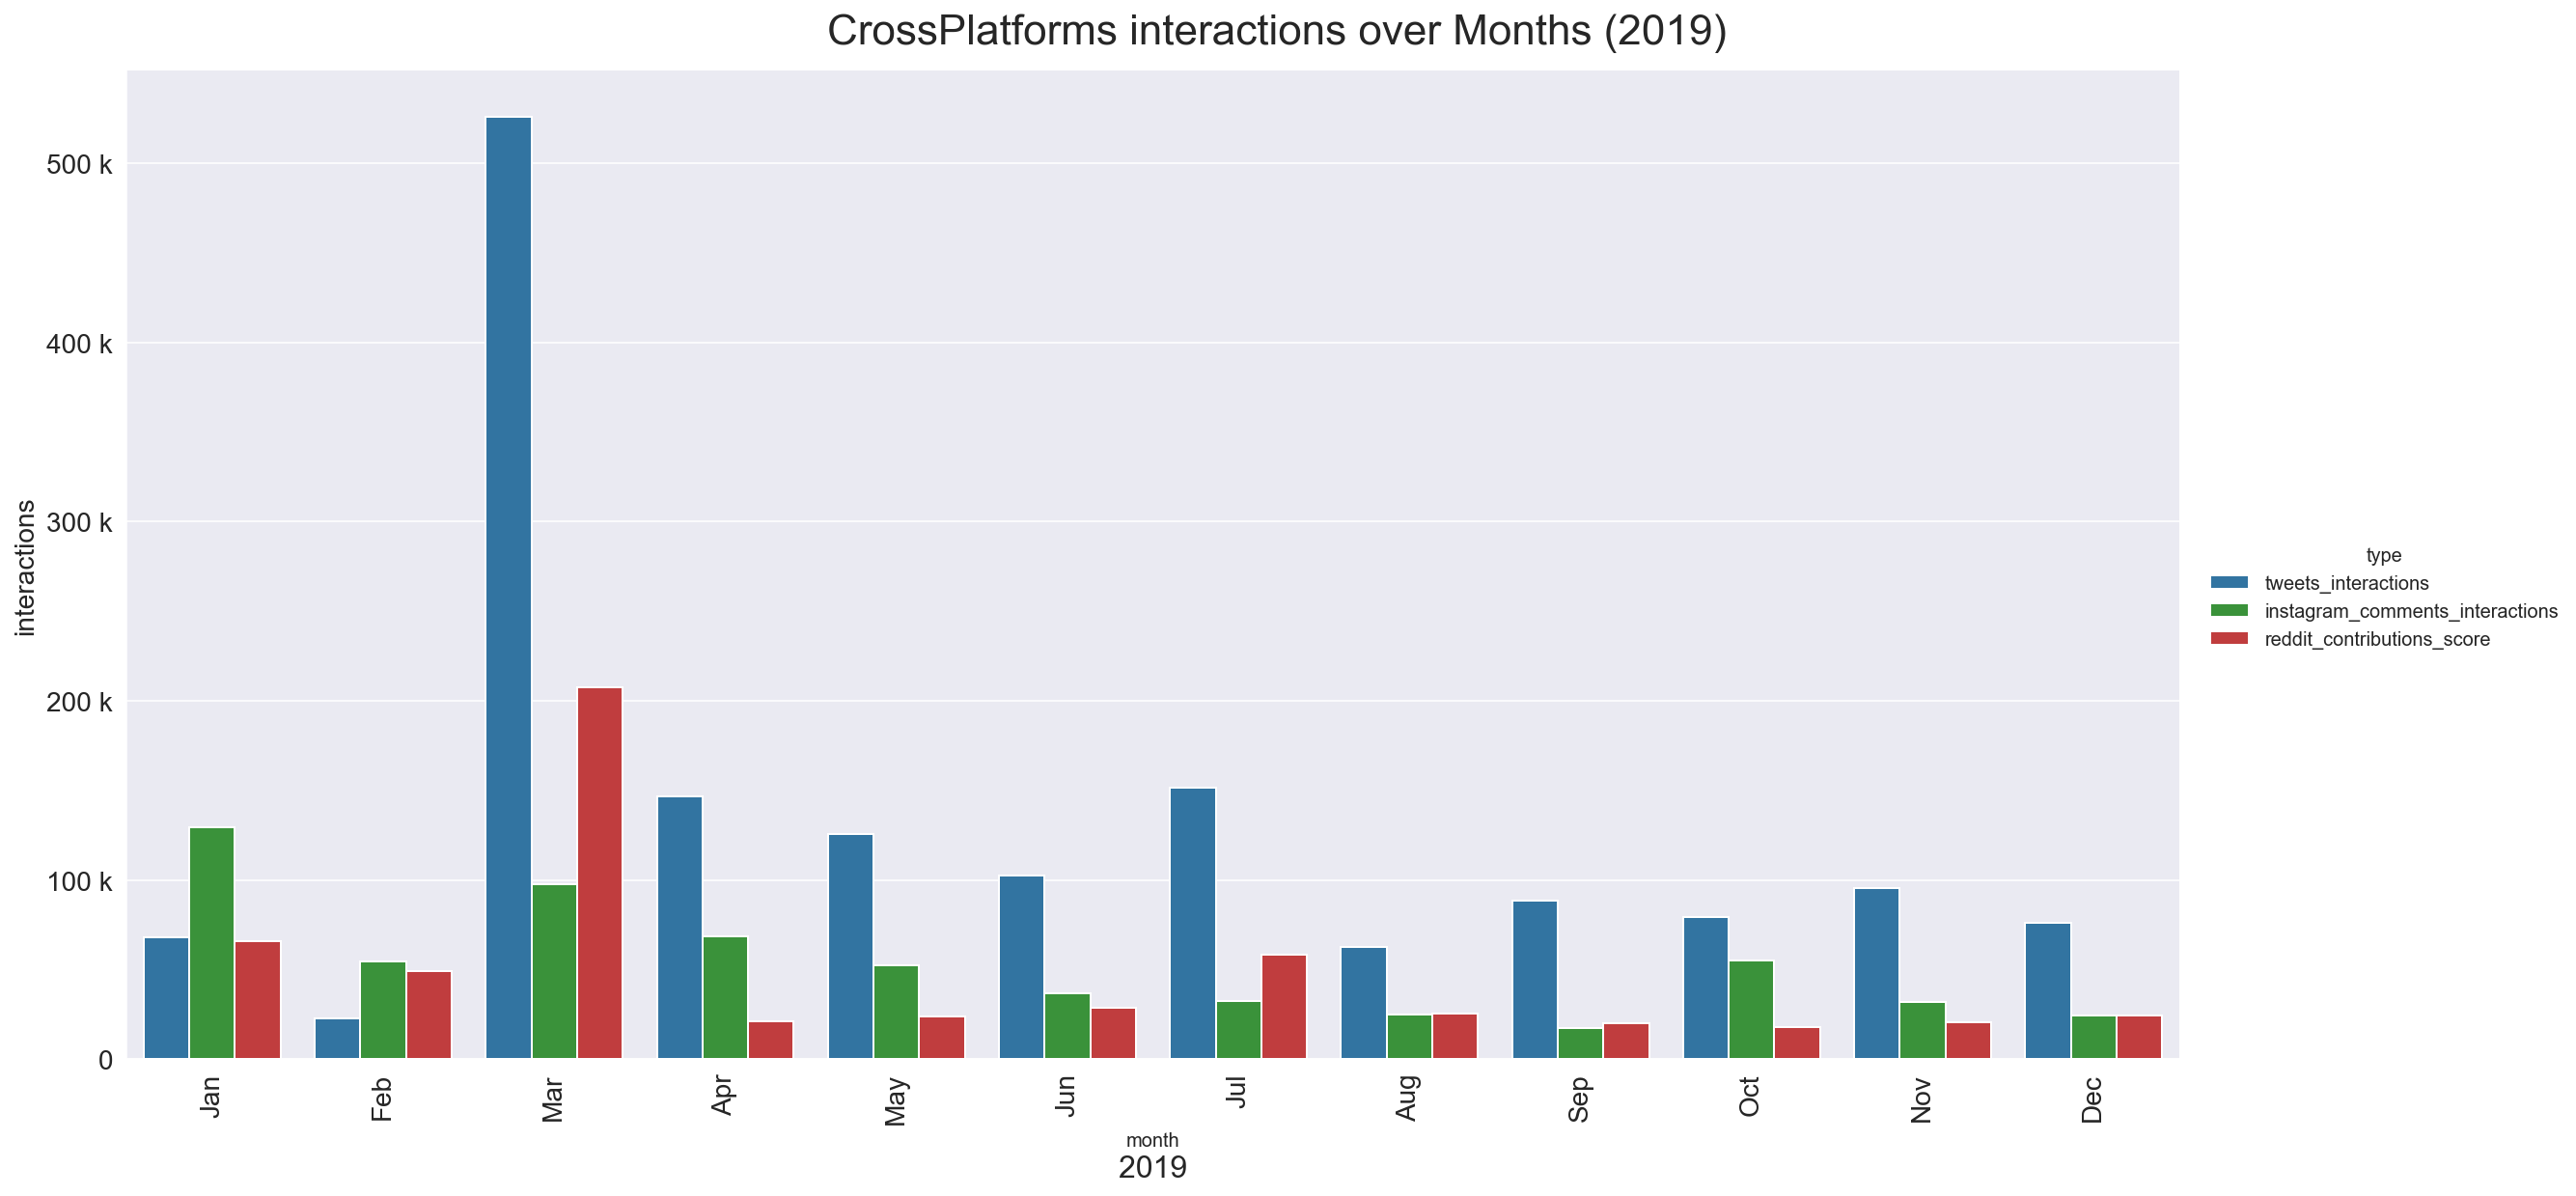

In [44]:
helpers.months_cross(df_month_inter_19, x="month", y="interactions", facet_on='year', n_col=1, h=8, loc=-0.13,
                     ratio=2, fs=14, year_str='2019', c=['tab:blue', 'tab:green', 'tab:red'])

## 2020

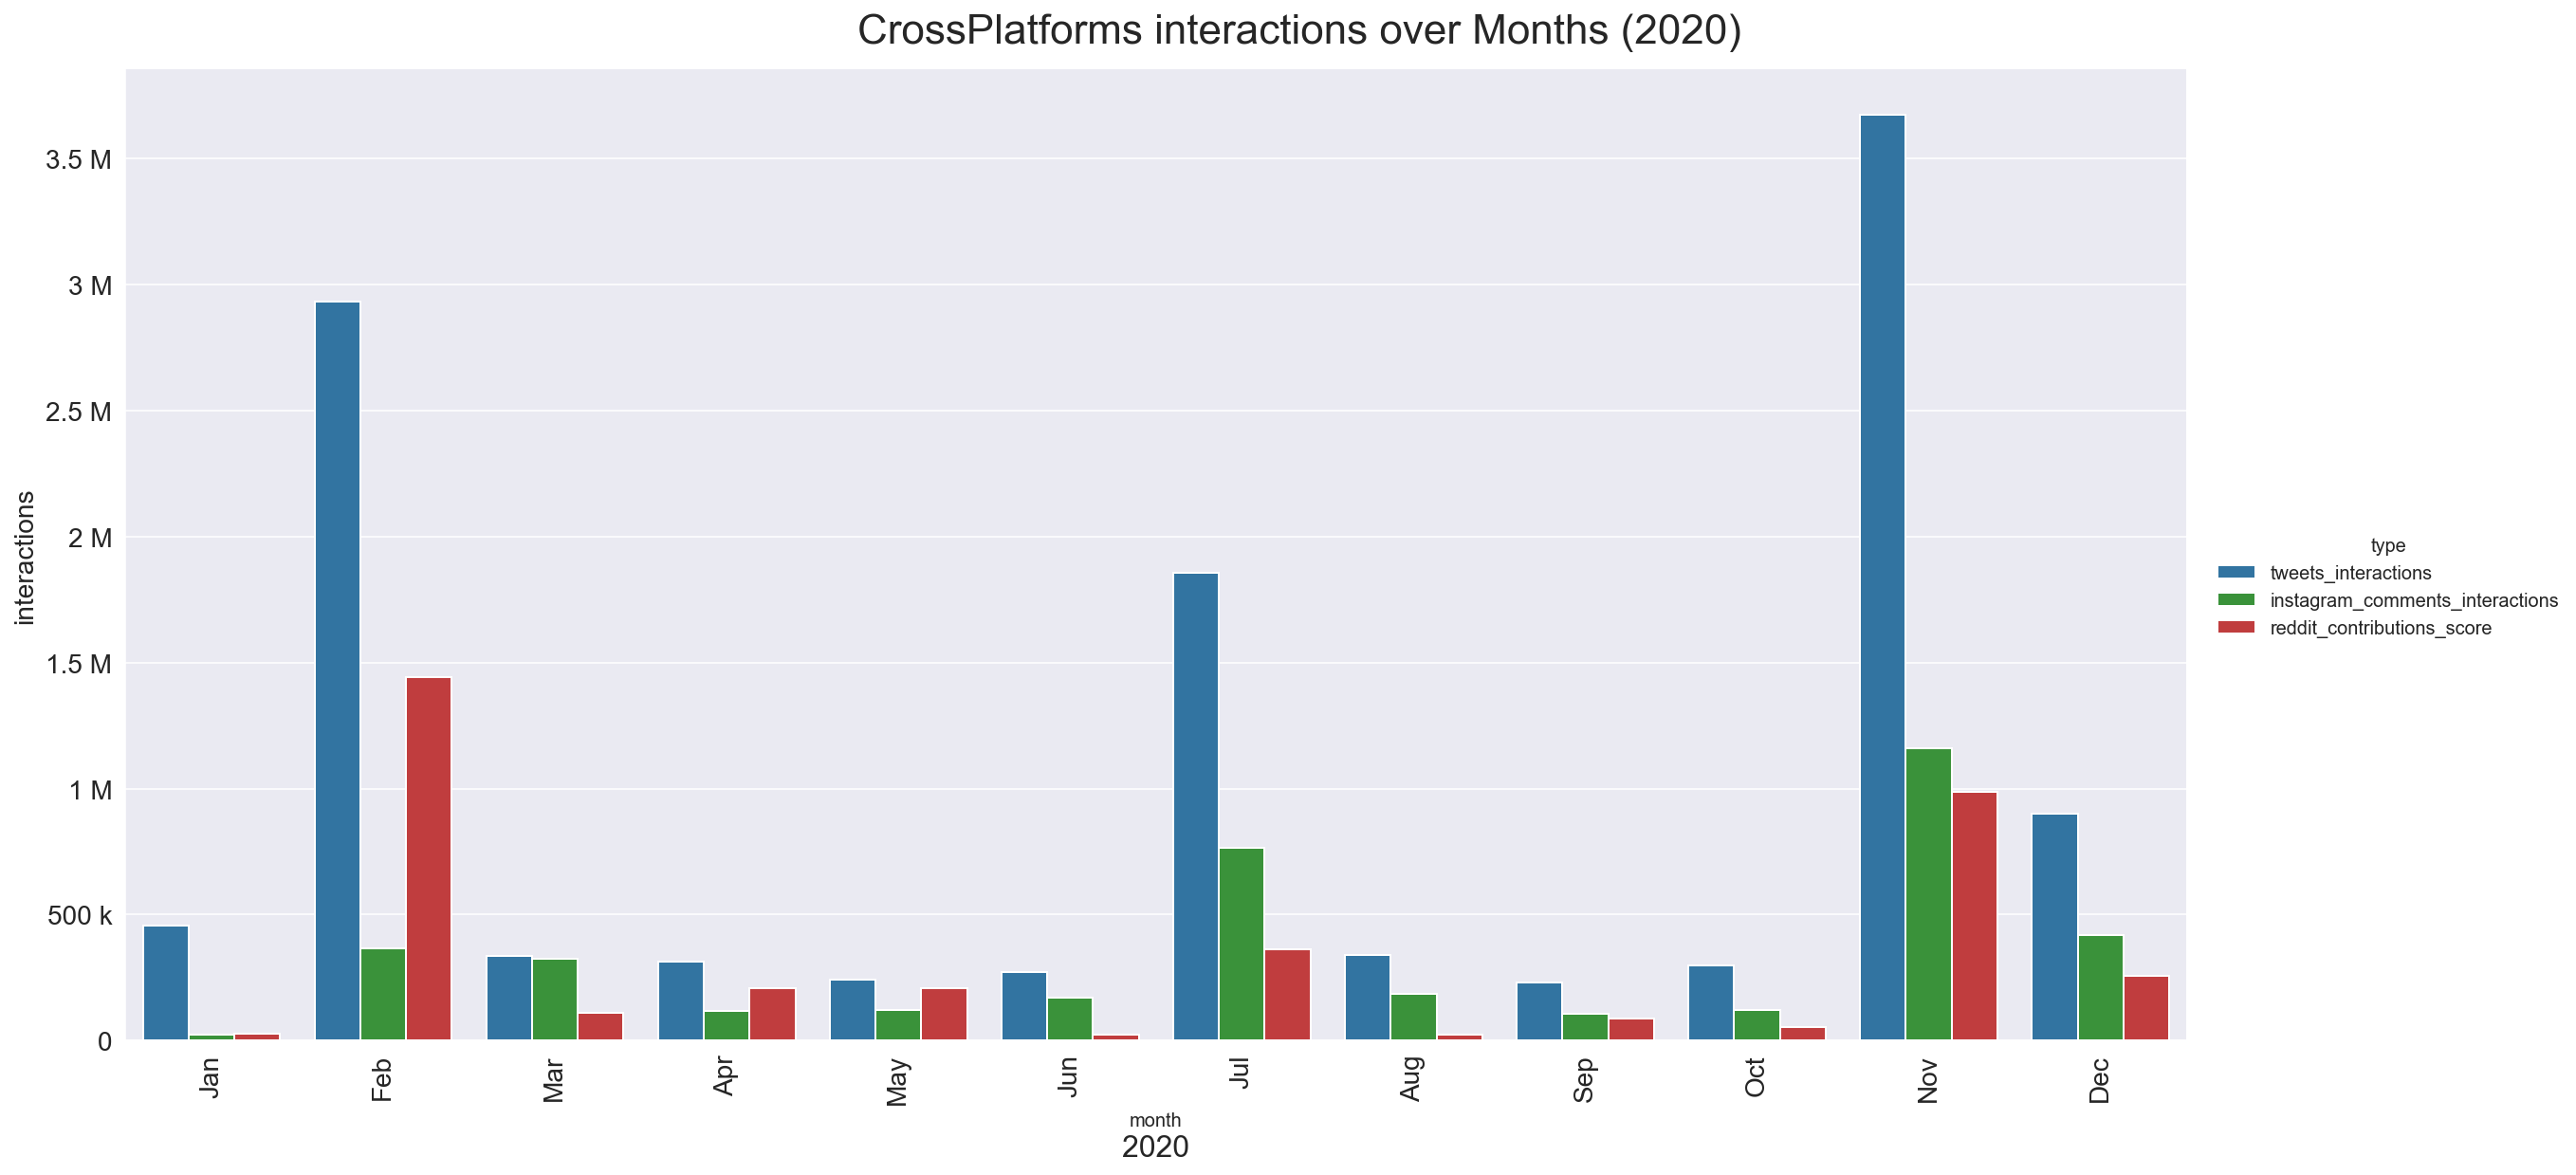

In [45]:
helpers.months_cross(df_month_inter_20, x="month", y="interactions", facet_on='year', n_col=1, h=8, loc=-0.13, 
                     ratio=2, fs=14, year_str='2020', c=['tab:blue', 'tab:green', 'tab:red'])

## 2021

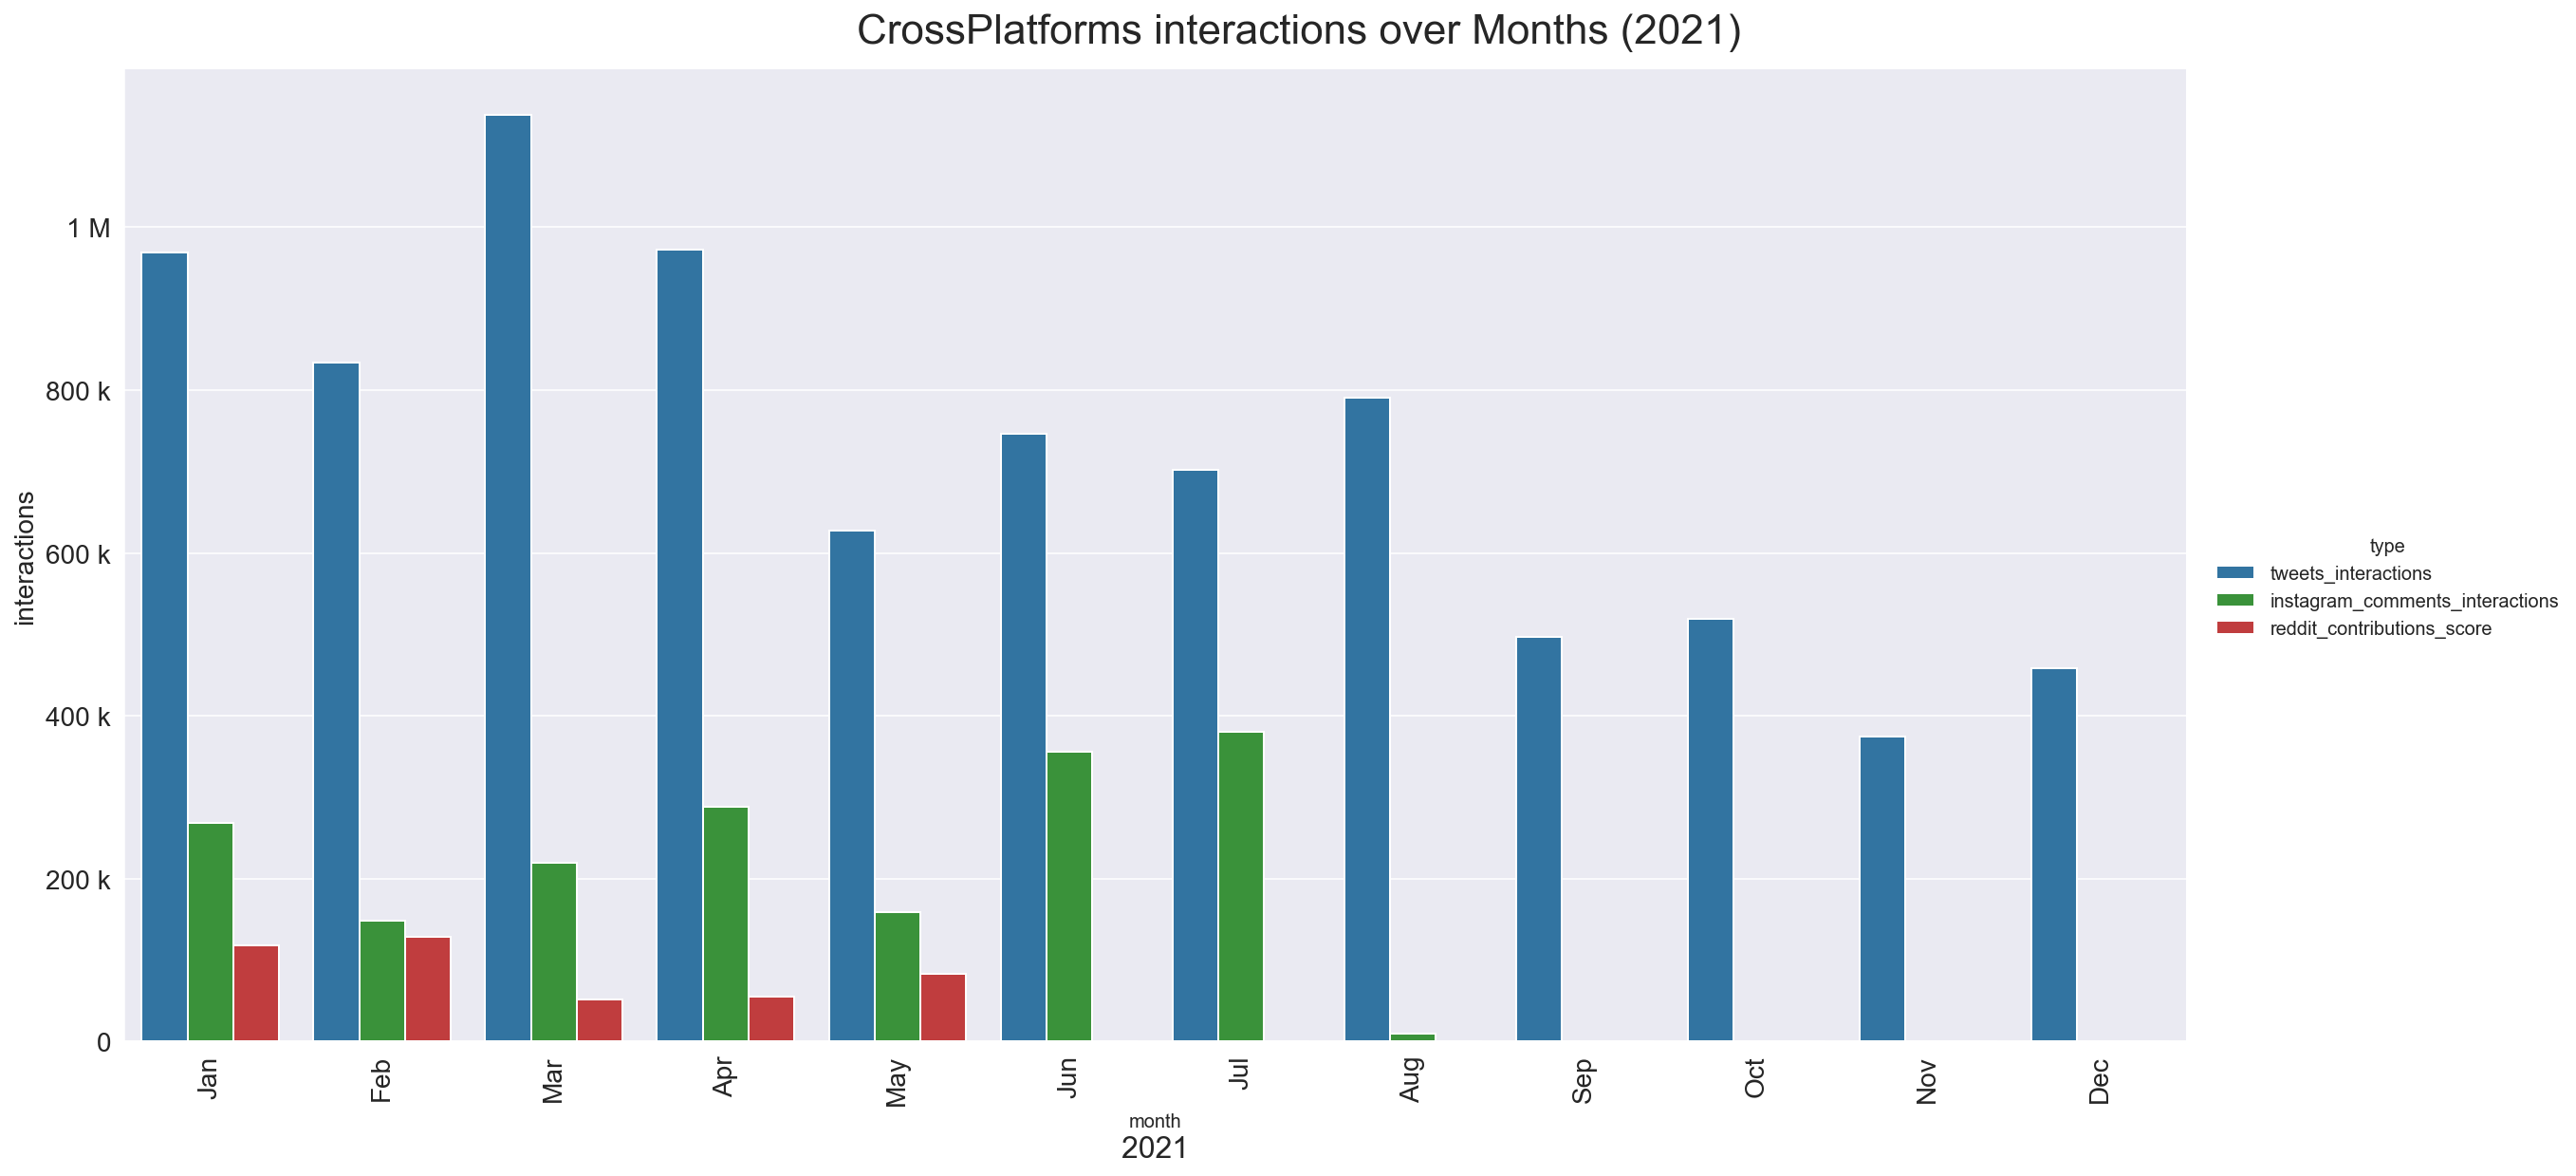

In [46]:
helpers.months_cross(df_month_inter_21, x="month", y="interactions", facet_on='year', n_col=1, h=8, loc=-0.13, 
                     ratio=2, fs=14, year_str='2021', c=['tab:blue', 'tab:green', 'tab:red'])

## 2022

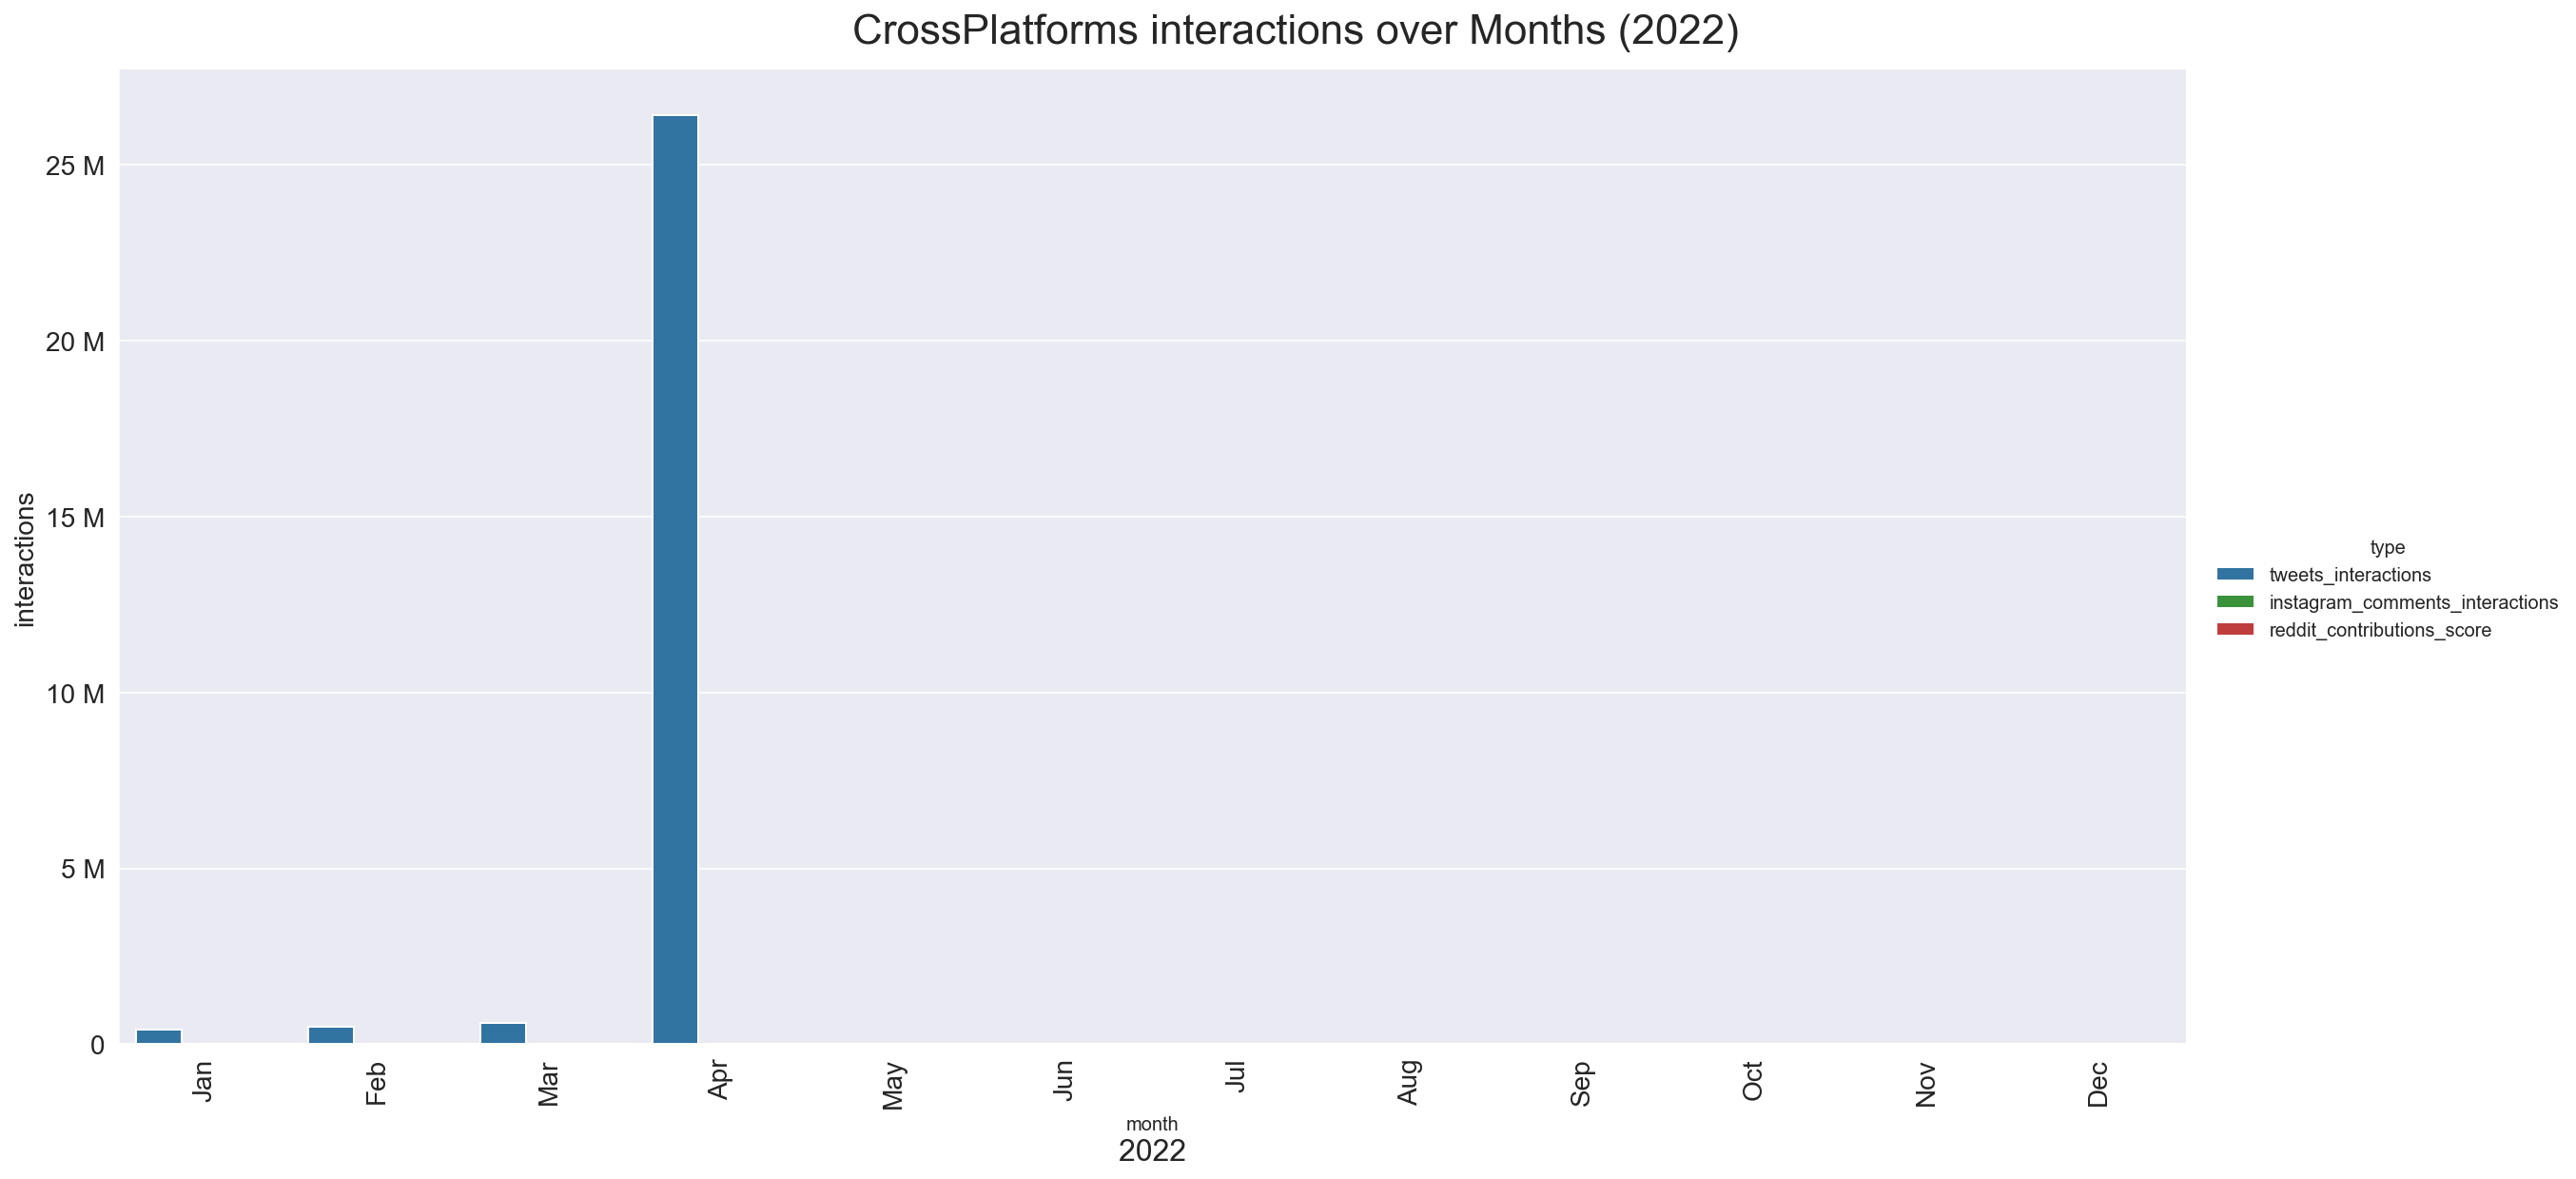

In [47]:
helpers.months_cross(df_month_inter_22, x="month", y="interactions", facet_on='year', n_col=1, h=8, loc=-0.13, 
                     ratio=2, fs=14, year_str='2022', c=['tab:blue', 'tab:green', 'tab:red'])

---

<a id='over_days_inter'></a>
>>### CrossPlatforms Interactions in Each Day
> <ul>
 <li><a href="#all_days_inter">CrossPlatforms Interactions TimeSeries</a></li>
 <li><a href="#all_years_inter">CrossPlatforms Interactions over Years</a></li>
 <li><a href="#all_months_inter">CrossPlatforms Interactions over Months</a></li>
 <li><a href="#over_days_inter"><b>CrossPlatforms Interactions in Each Day</b></a></li>
 </ul>

In [48]:
tmp = df_creations.groupby(['month', 'year', 'dayofmonth'])['tweets_interactions', "instagram_comments_interactions", 'reddit_contributions_score'].sum().reset_index()
df_days2_inter = tmp.melt(id_vars=['month', 'year', 'dayofmonth'], var_name='type', value_name='interactions')
df_days2_inter.head(1)

month  year  dayofmonth                 type  interactions
0   Apr  2018           1  tweets_interactions         831.0

In [49]:
df_days_inter_18 = df_days2_inter[df_days2_inter['year']==2018]
df_days_inter_19 = df_days2_inter[df_days2_inter['year']==2019]
df_days_inter_20 = df_days2_inter[df_days2_inter['year']==2020]
df_days_inter_21 = df_days2_inter[df_days2_inter['year']==2021]
df_days_inter_22 = df_days2_inter[df_days2_inter['year']==2022]

In [50]:
# importlib.reload(helpers)

## 2018

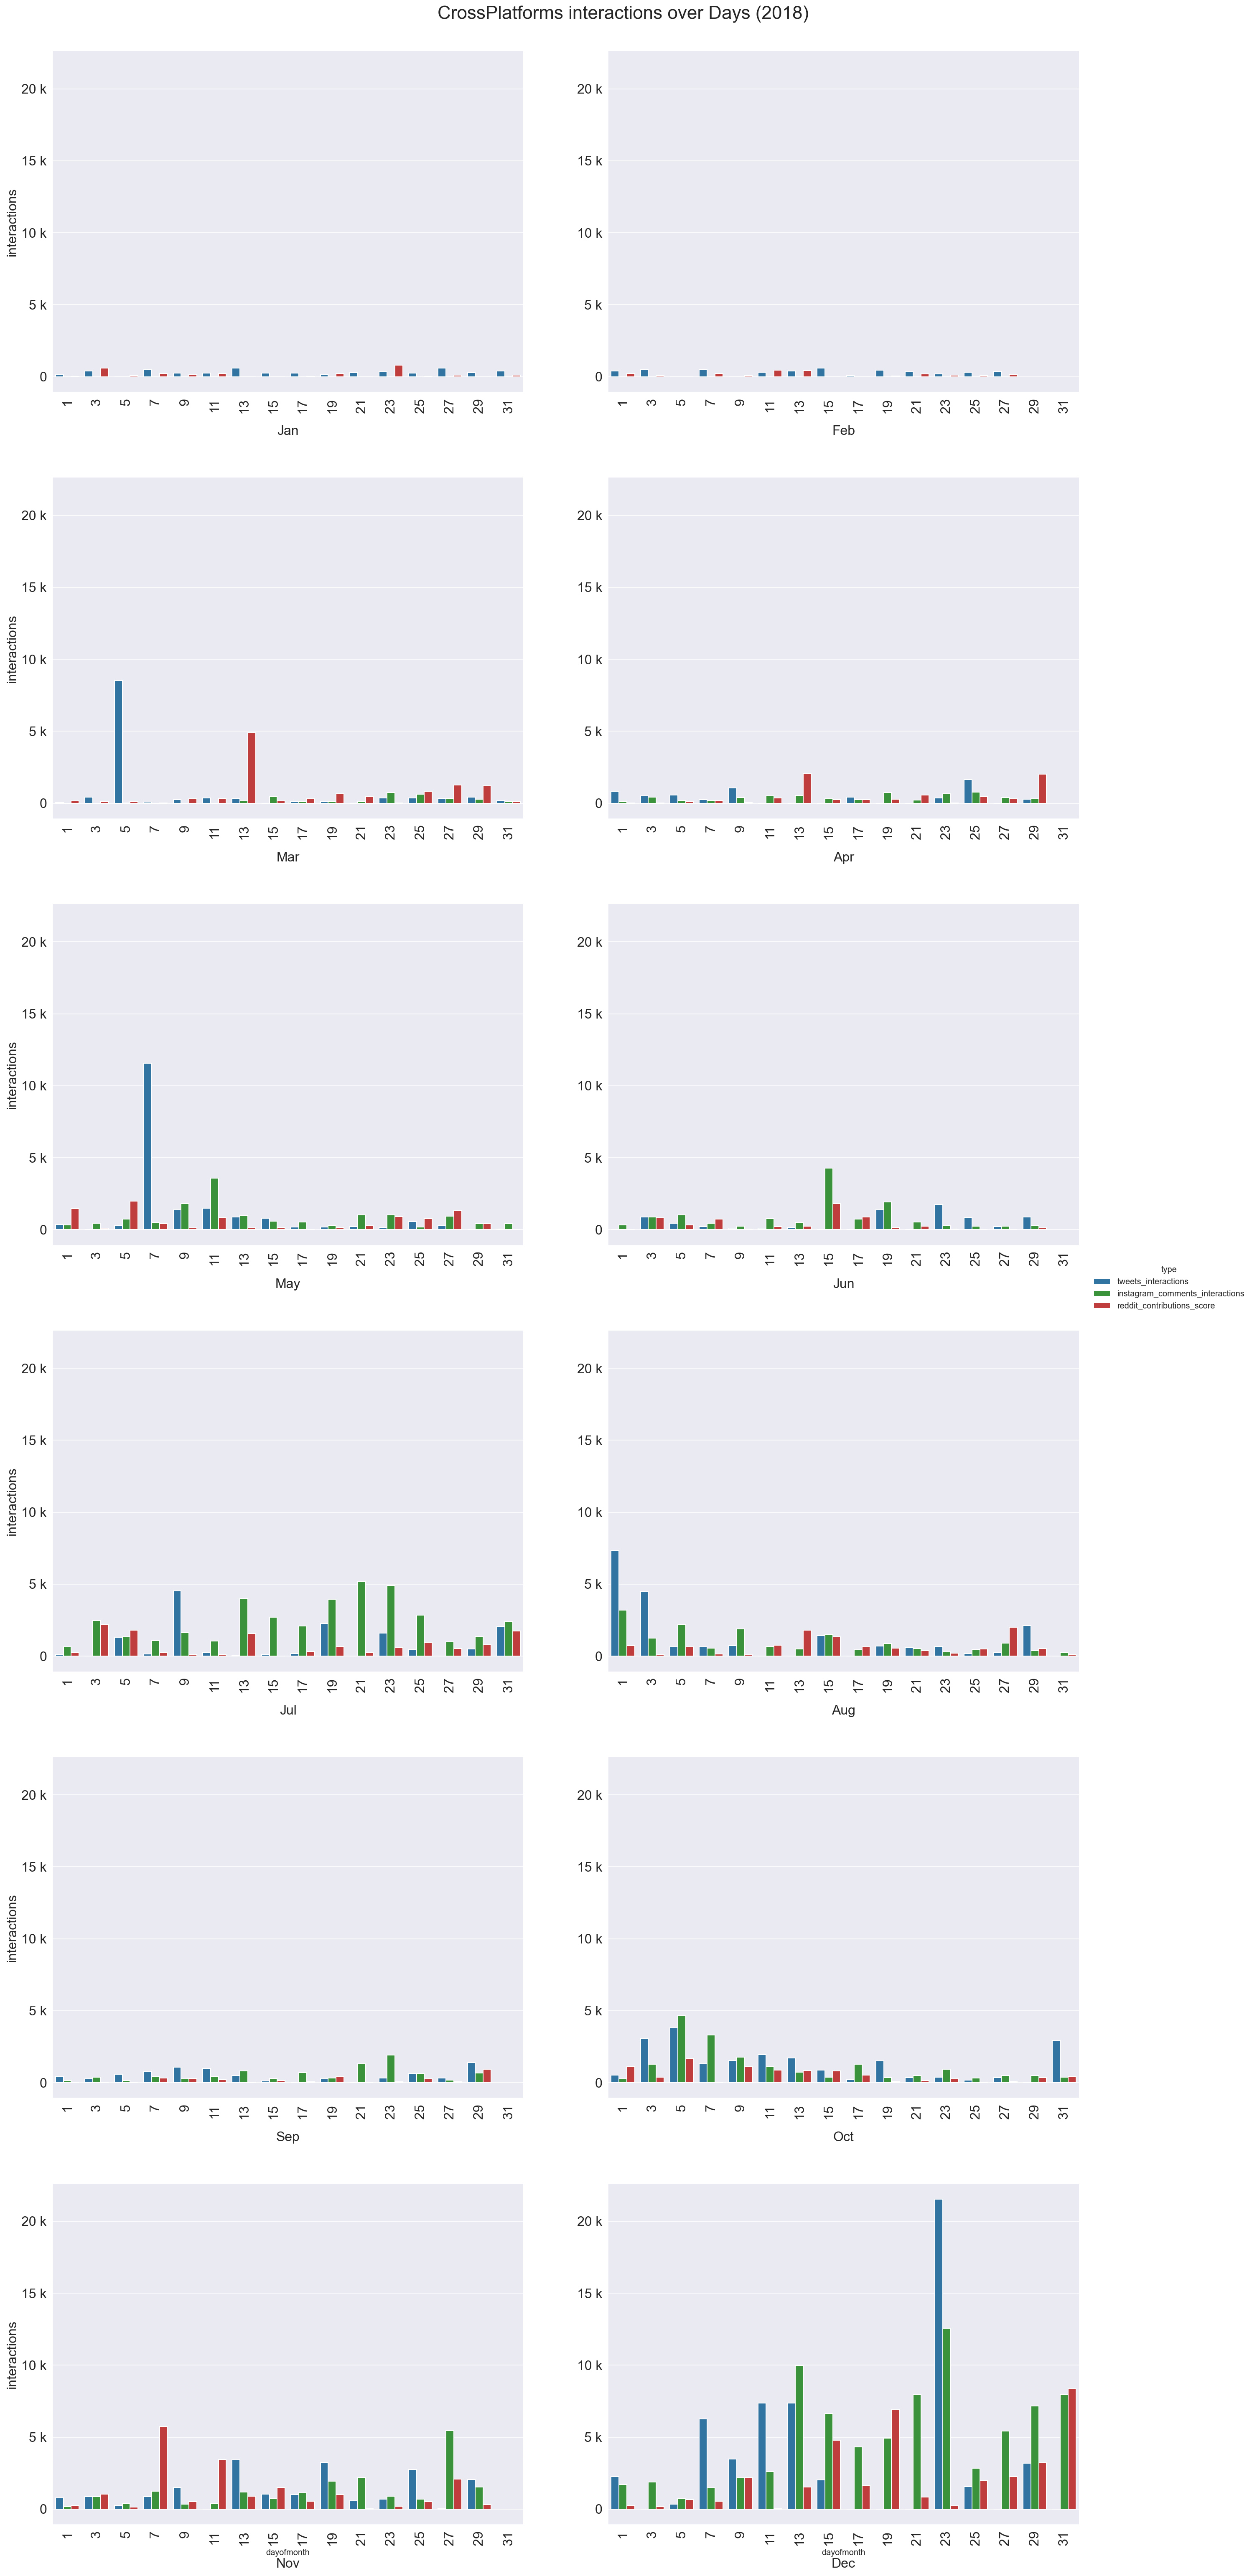

In [51]:
helpers.days_cross(df_days_inter_18, x="dayofmonth", y="interactions", facet_on='month', n_col=2, h=7, loc=-0.14, 
                   ratio=1.3, fs=16, year_str='2018', c=['tab:blue', 'tab:green', 'tab:red'])

<br>

## 2019

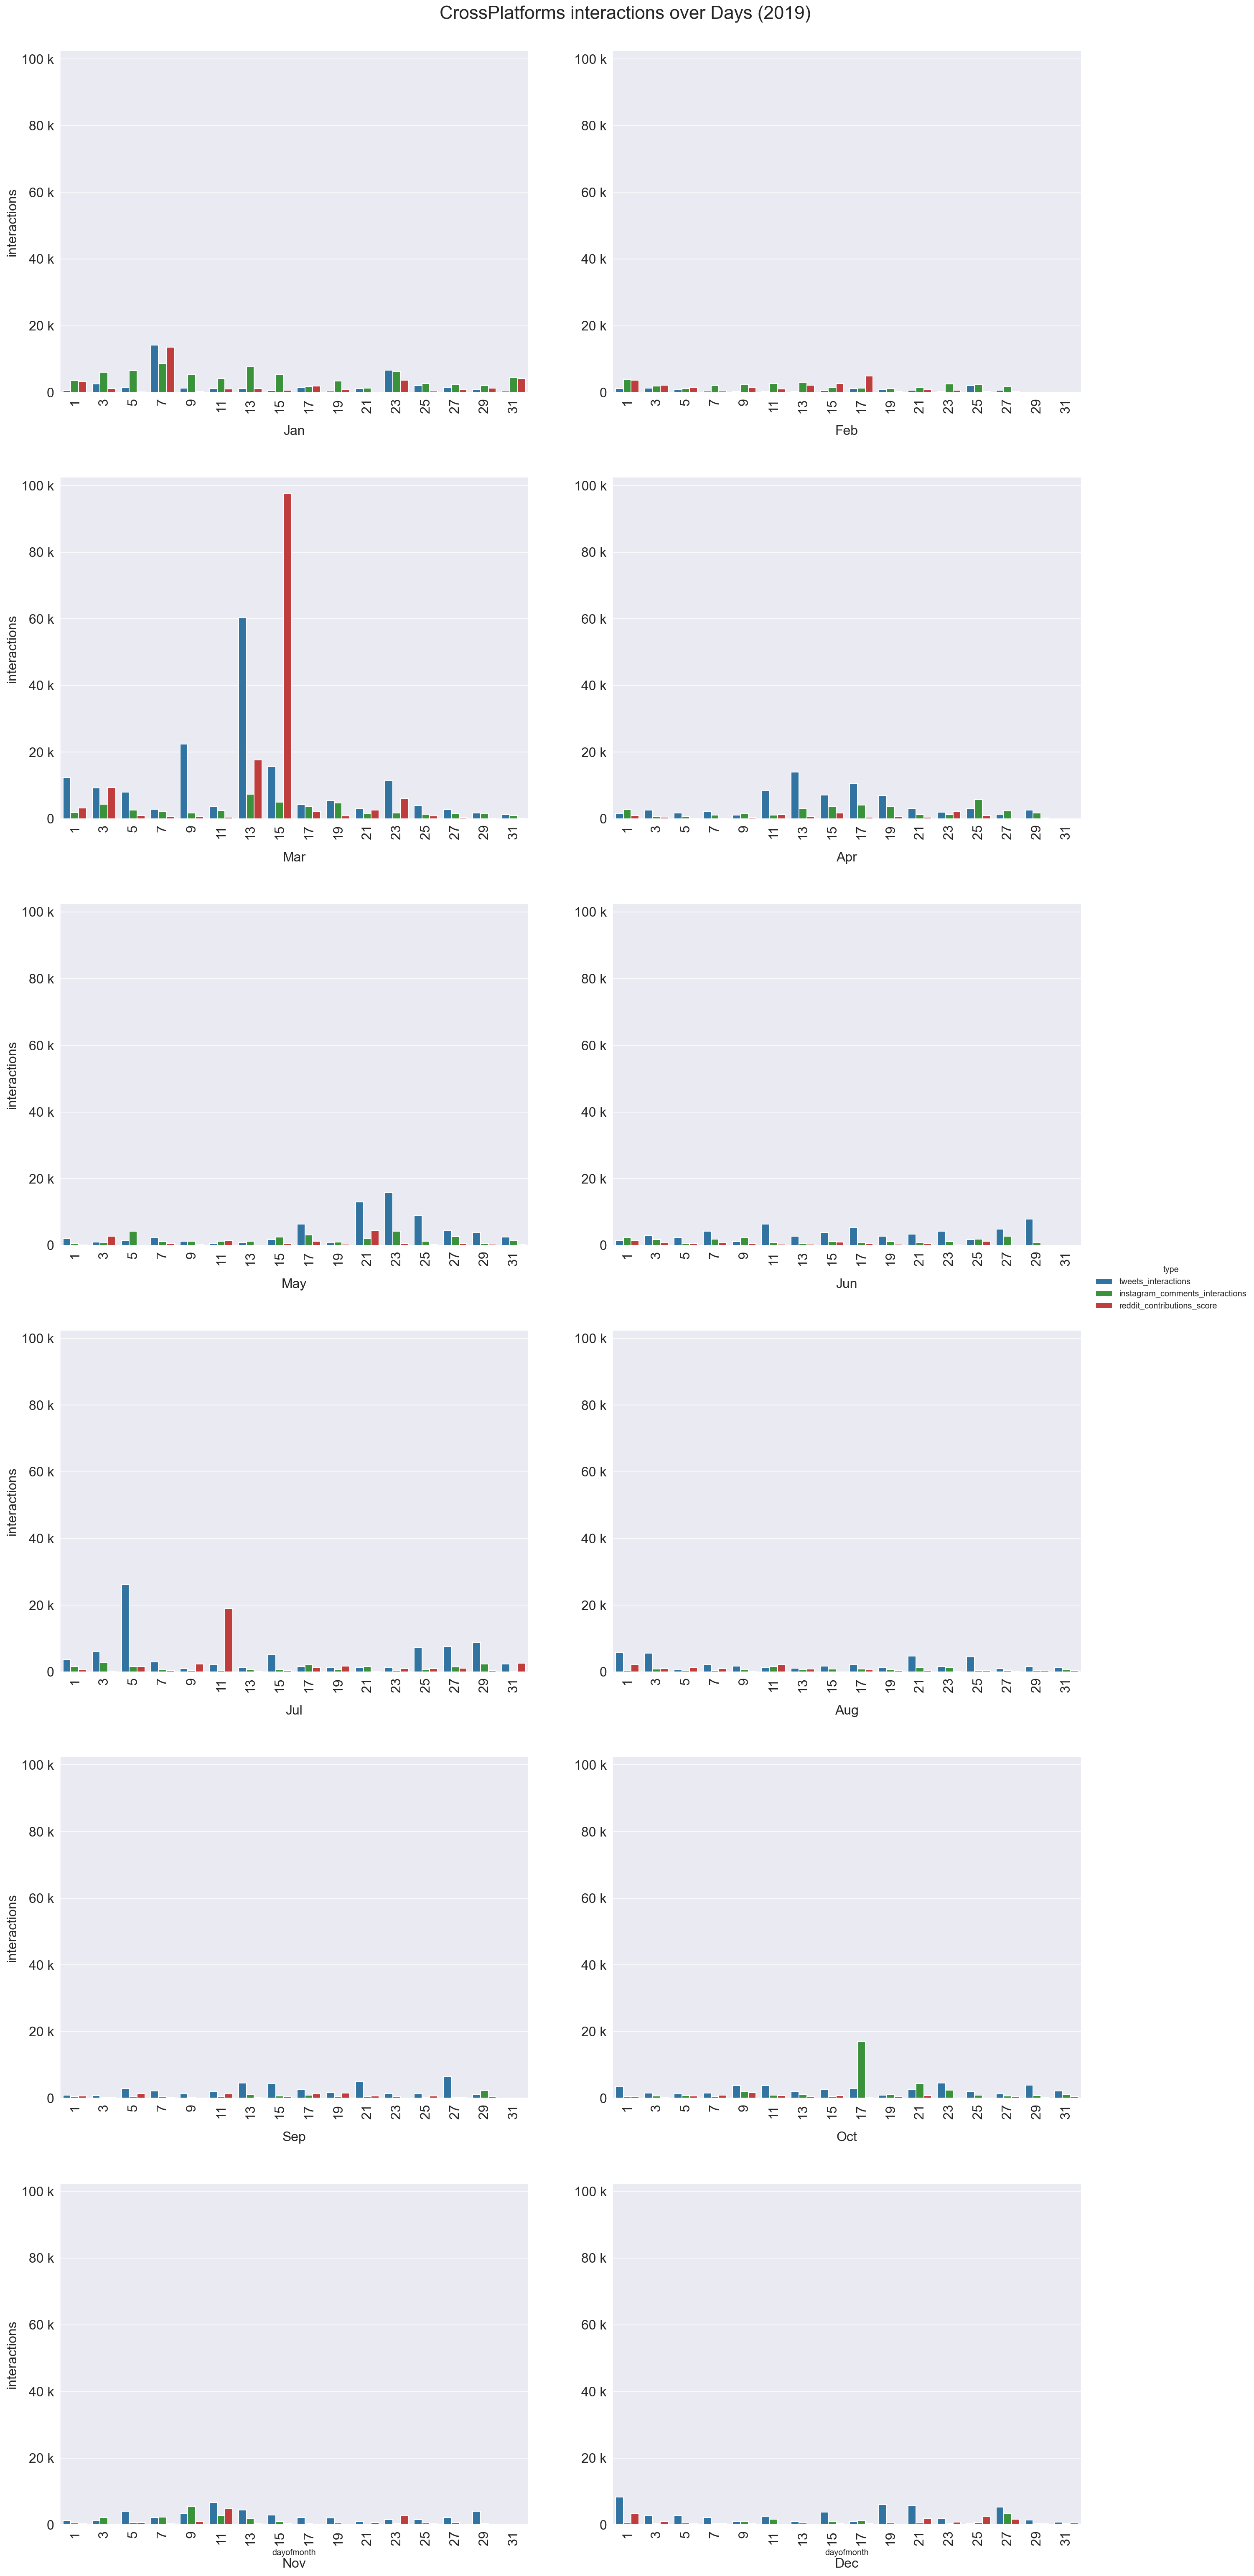

In [52]:
helpers.days_cross(df_days_inter_19, x="dayofmonth", y="interactions", facet_on='month', n_col=2, h=7, loc=-0.14, 
                   ratio=1.3, fs=16, year_str='2019', c=['tab:blue', 'tab:green', 'tab:red'])

## 2020

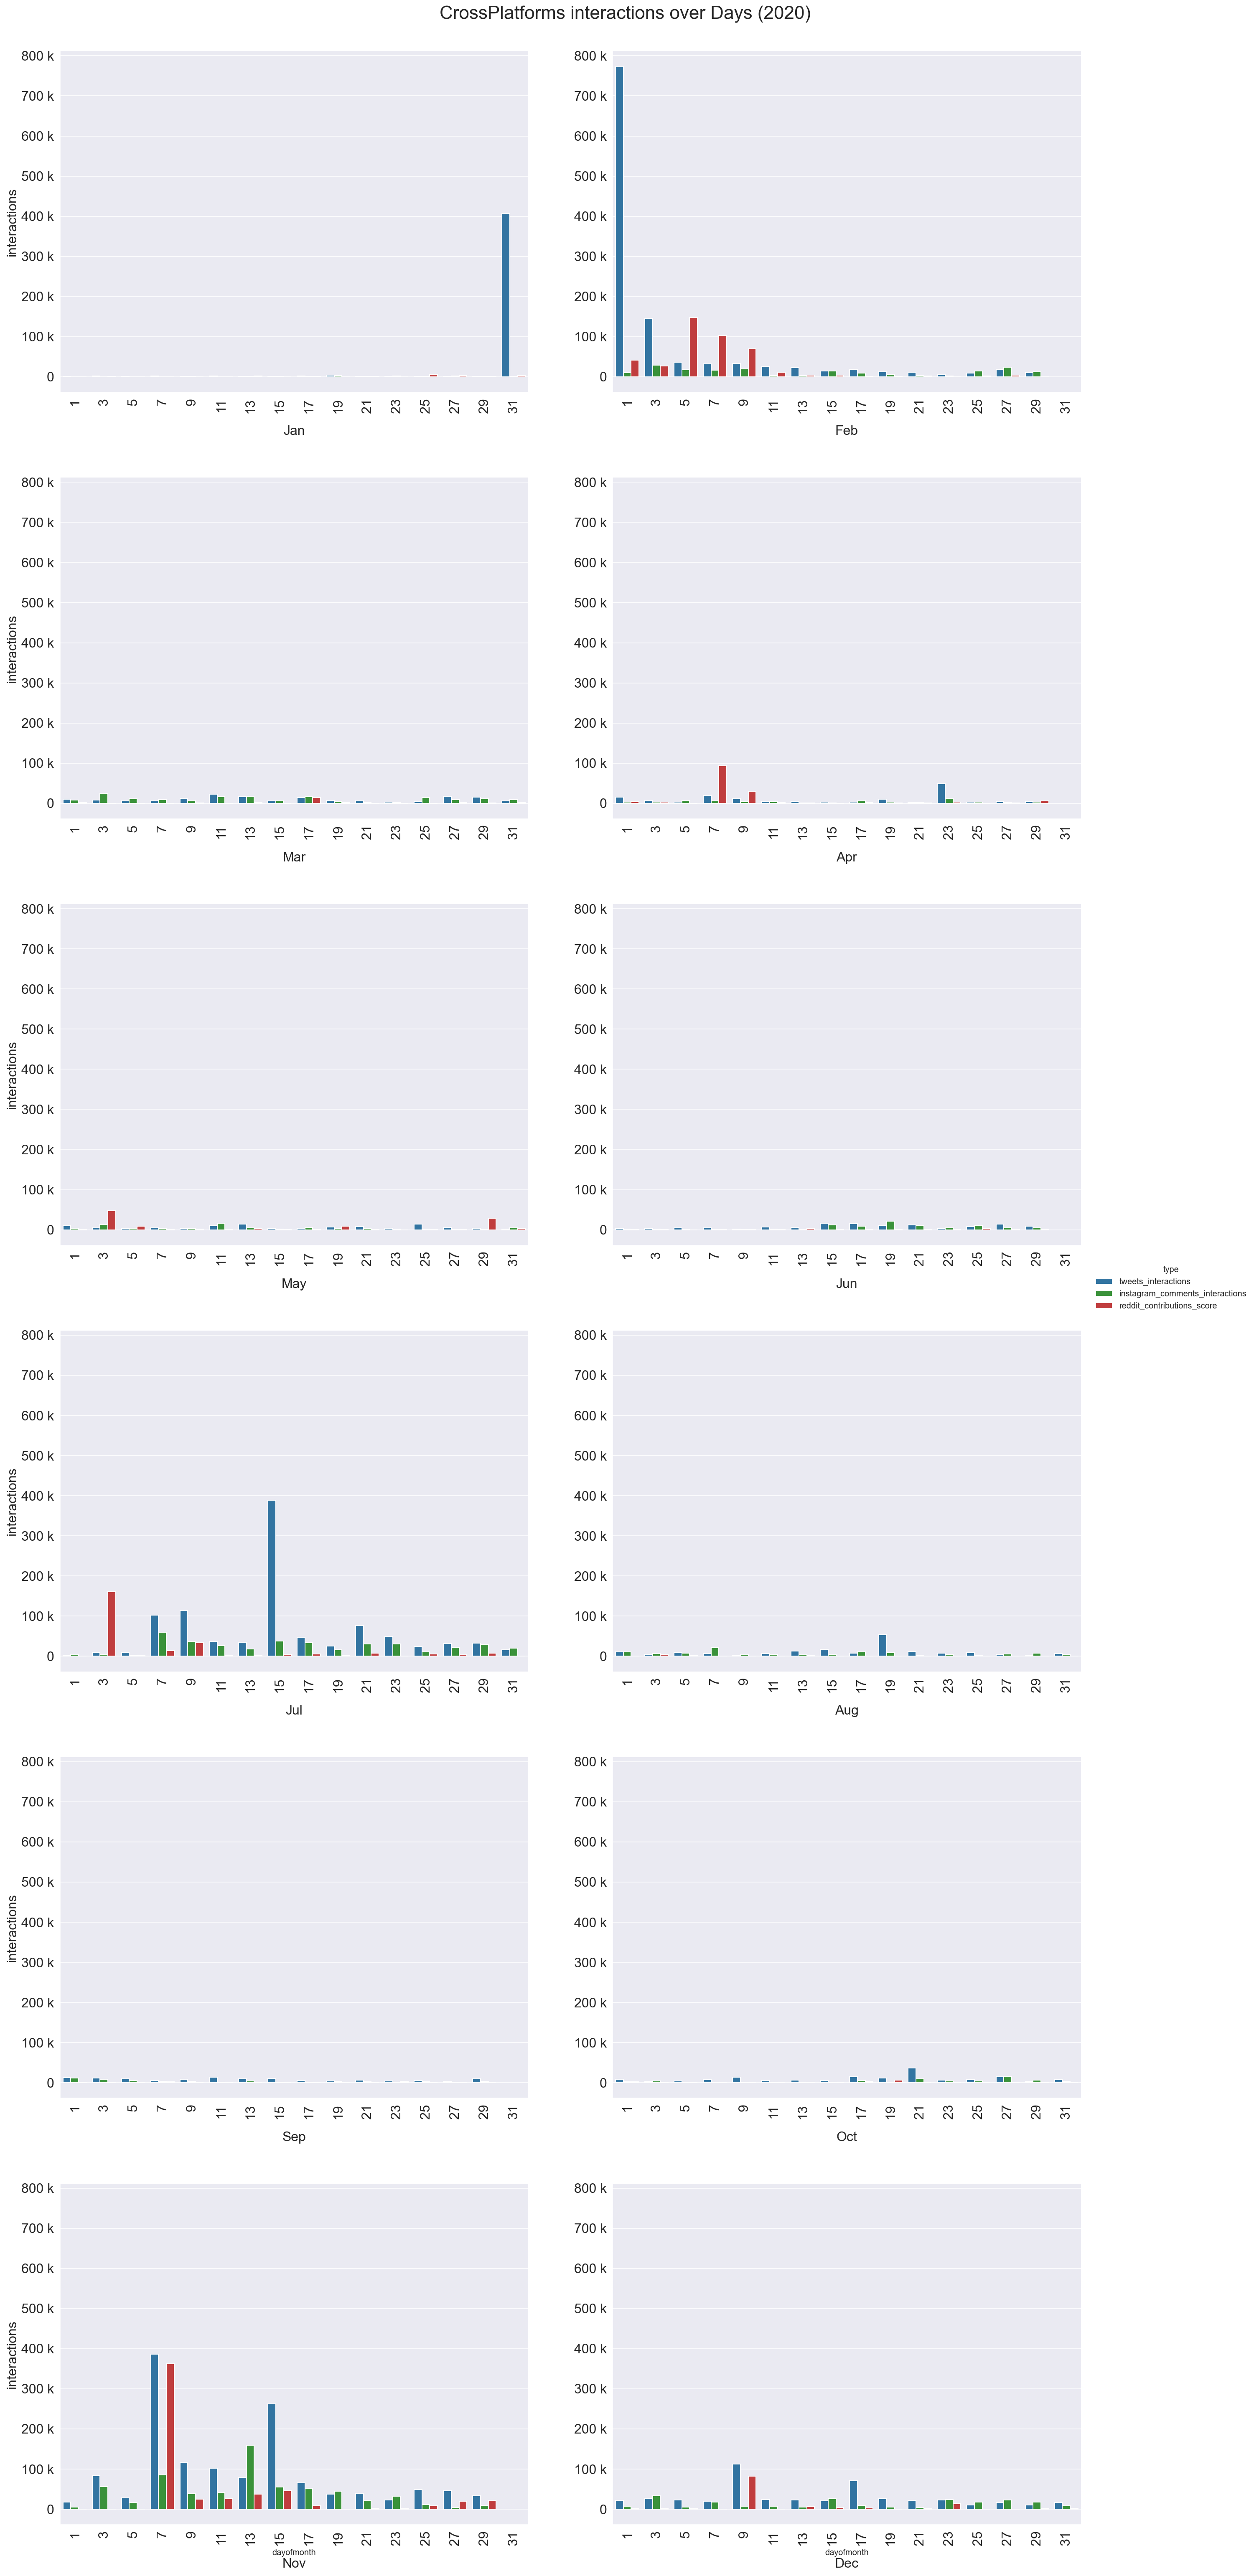

In [53]:
helpers.days_cross(df_days_inter_20, x="dayofmonth", y="interactions", facet_on='month', n_col=2, h=7, loc=-0.14, 
                   ratio=1.3, fs=16, year_str='2020', c=['tab:blue', 'tab:green', 'tab:red'])

## 2021

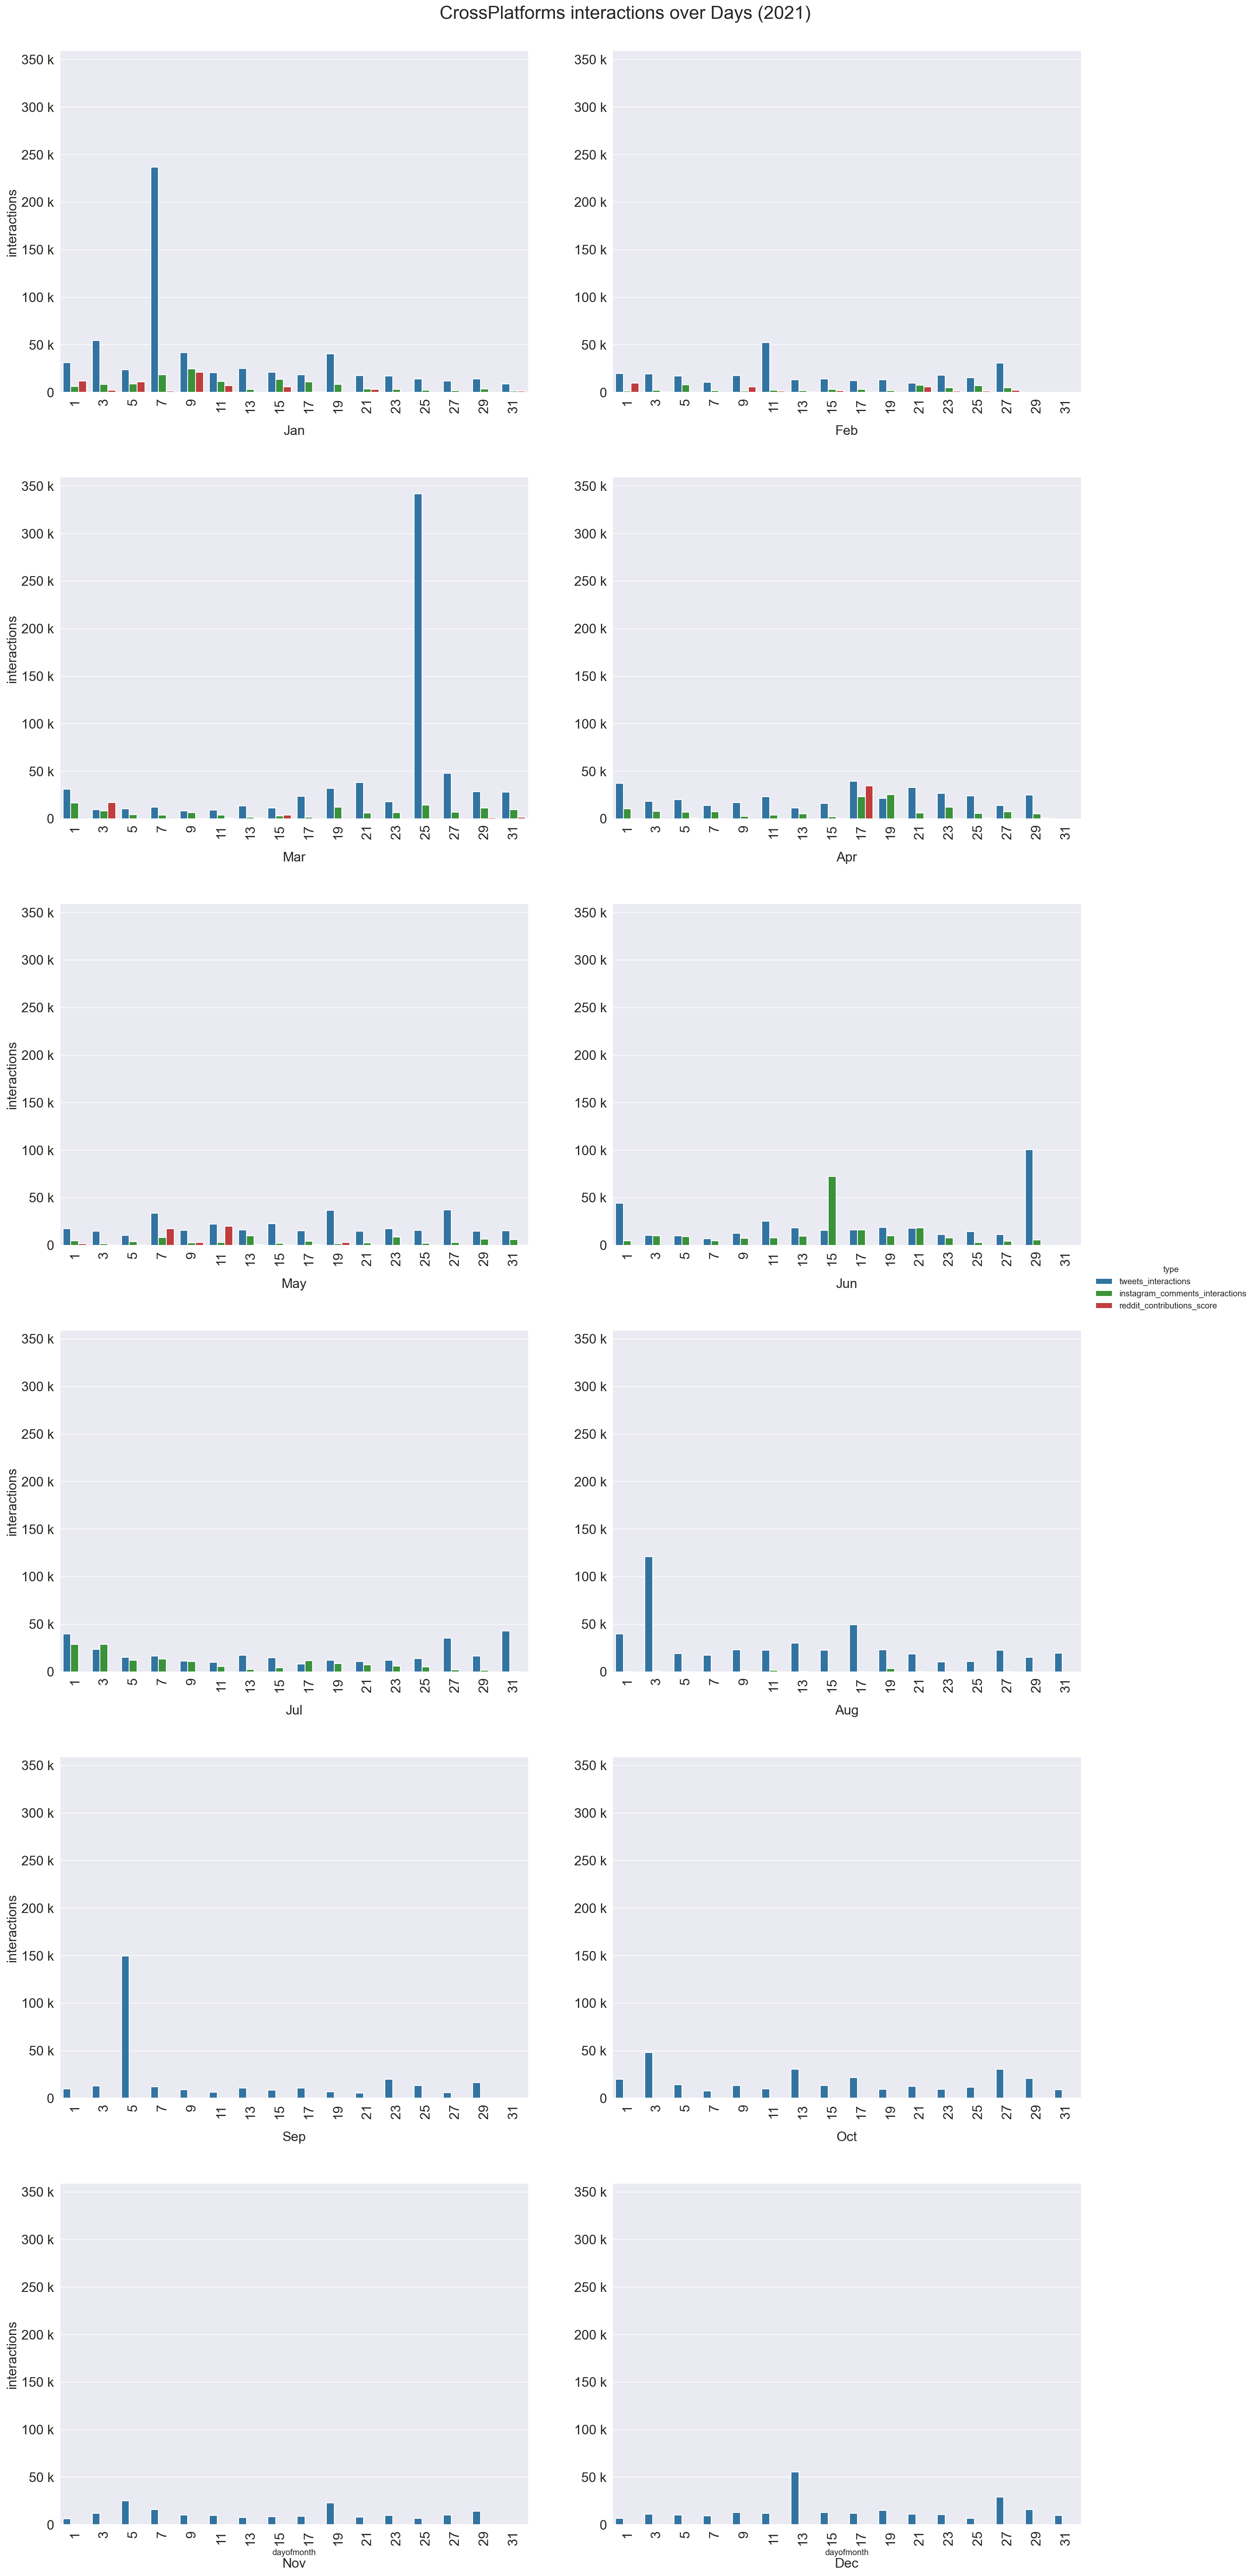

In [54]:
helpers.days_cross(df_days_inter_21, x="dayofmonth", y="interactions", facet_on='month', n_col=2, h=7, loc=-0.14, 
                   ratio=1.3, fs=16, year_str='2021', c=['tab:blue', 'tab:green', 'tab:red'])

## 2022

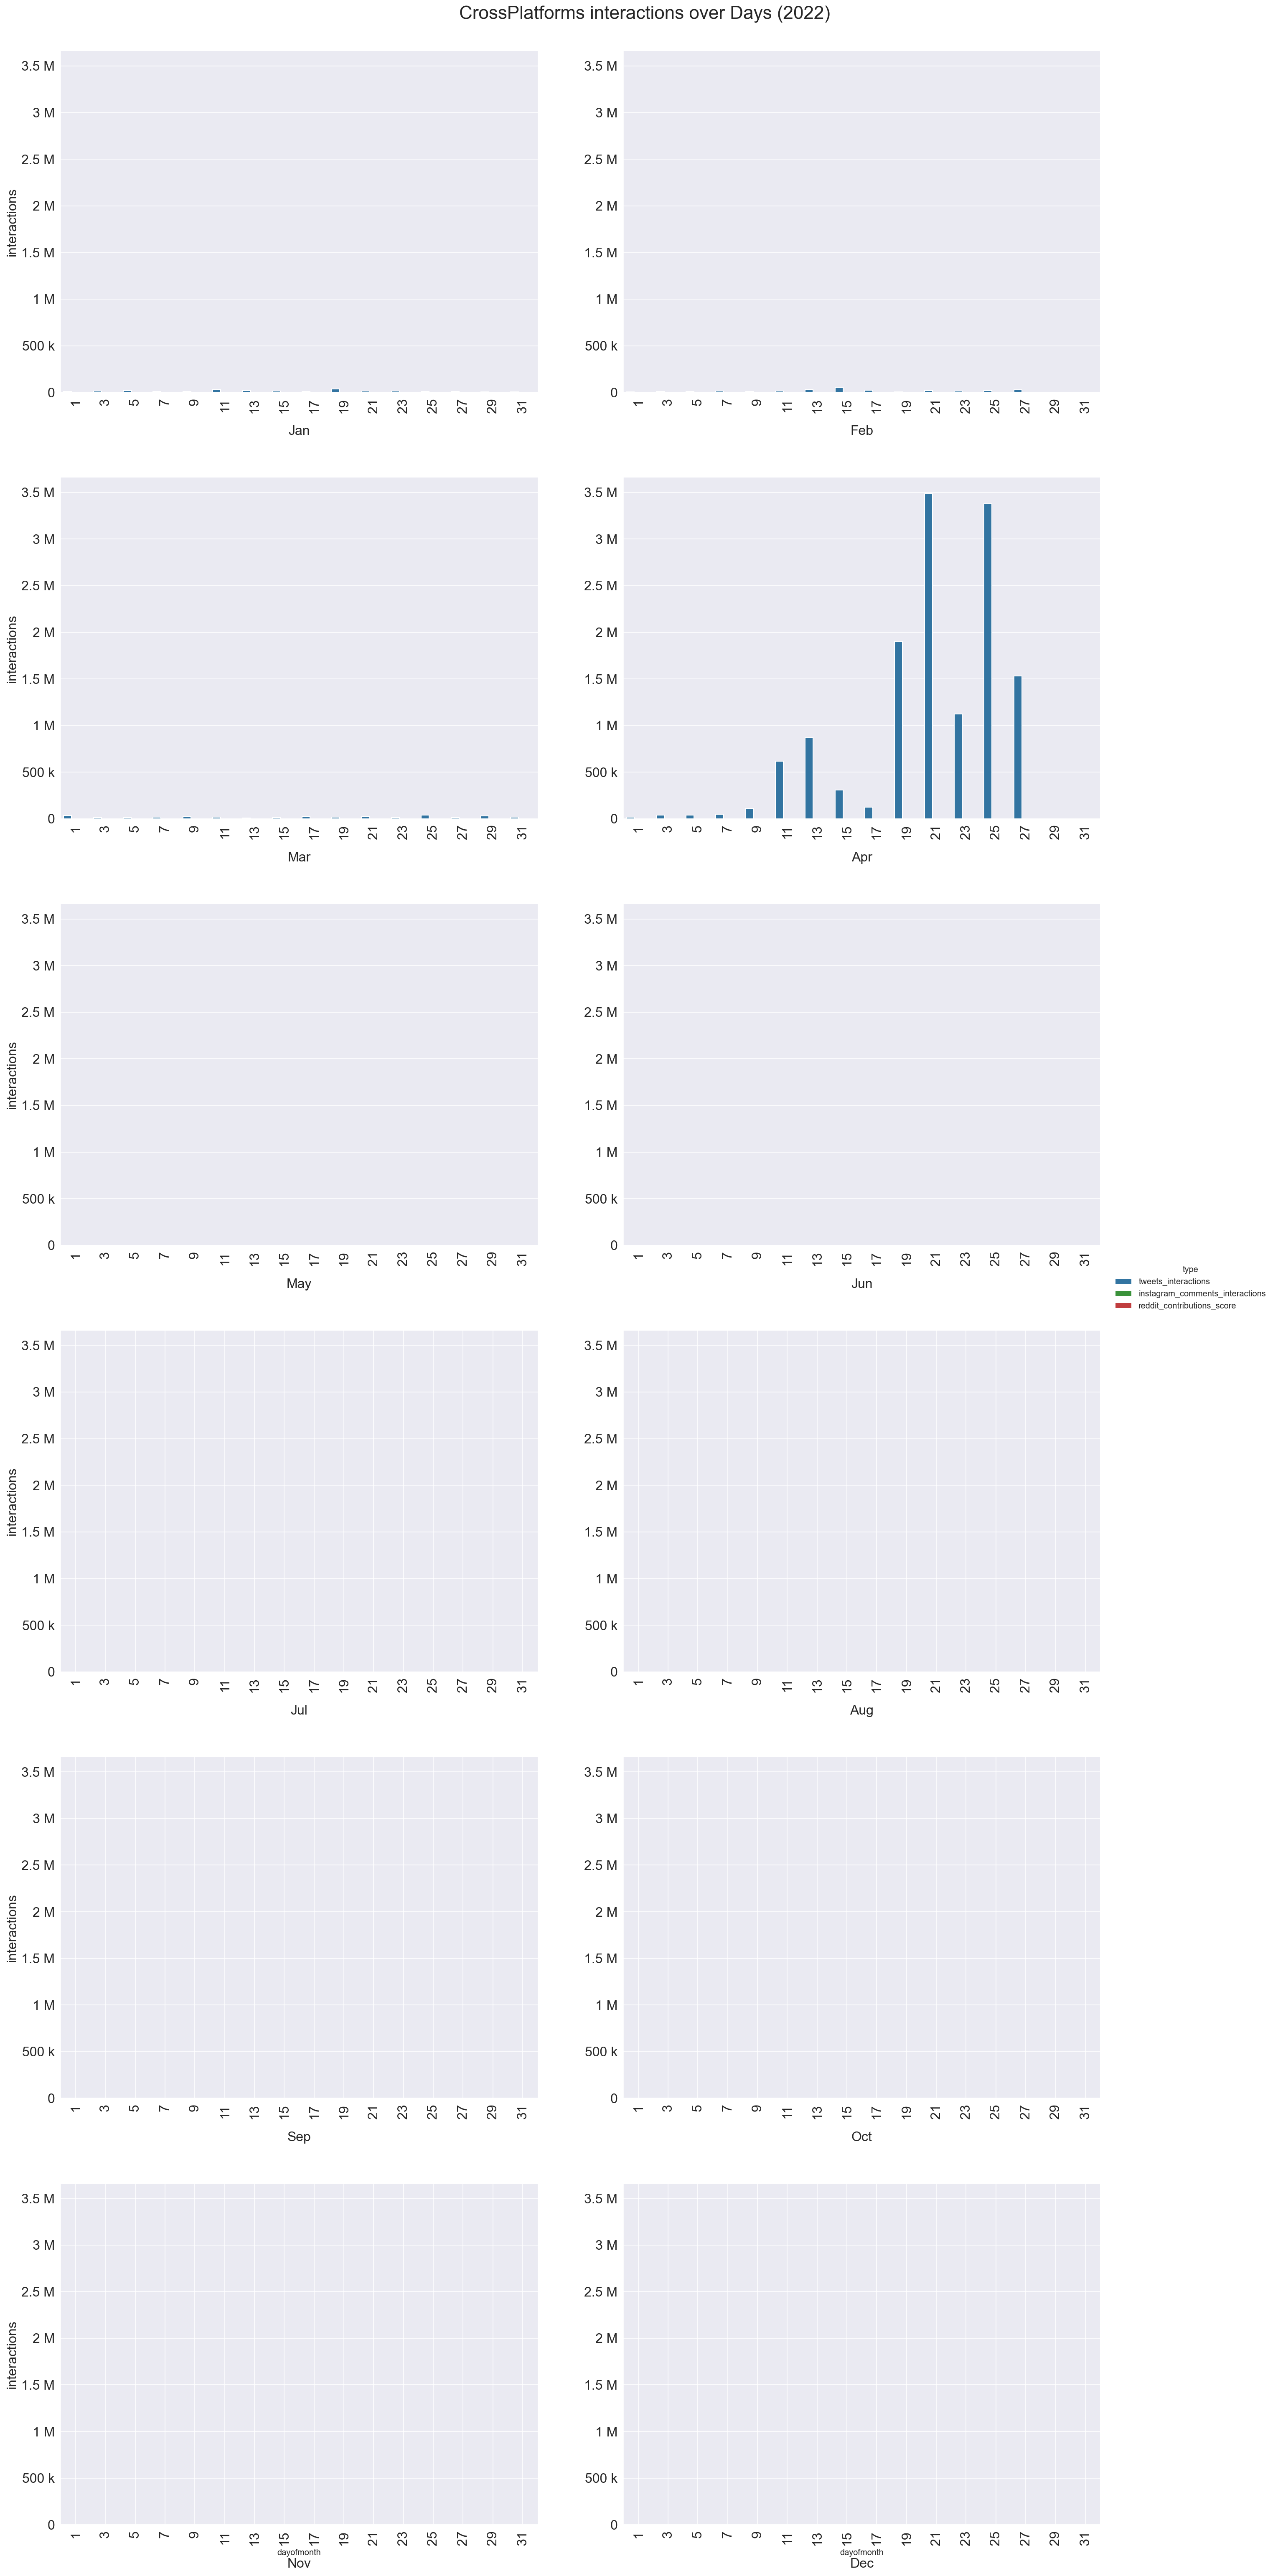

In [55]:
helpers.days_cross(df_days_inter_22, x="dayofmonth", y="interactions", facet_on='month', n_col=2, h=7, loc=-0.14, 
                   ratio=1.3, fs=16, year_str='2022', c=['tab:blue', 'tab:green', 'tab:red'])

---

## <a id='top_text'></a>
> ## Most Repeated Text
> <ul>
 <li><a href="#over_time">Contributions OVER TIME</a></li>
 <li><a href="#interactions_over_time">Interactions OVER TIME</a></li>
 <li><a href="#top_text"><b>Most Repeated Text</b></a></li>
 <li><a href="#top_users">Top Commented Users</a></li>
 </ul>

## Twitter

In [56]:
tweets.text.value_counts().head(10)

#justiceforjohnnydepp                          79623
#amberheardisanabuser                           3550
fuck amber heard                                3530
#amberheardisaliar                              3382
#johnnydepp \n#justiceforjohnnydepp             2369
#justiceforjohnnydepp #amberheardisanabuser     2000
#justiceforjohnnydepp ⚖️                        1570
#johnnydepp\n#justiceforjohnnydepp              1521
johnny depp \n#justiceforjohnnydepp             1437
johnny depp\n#justiceforjohnnydepp               861
Name: text, dtype: int64

## YouTube Comments

In [57]:
youtube_comments.text.value_counts().head(10)

yes                                                                            11776
“they won’t believe you, because you are a man”\r\n\r\nshe is not a victim.     6844
“they won’t believe you, because you are a man”\n\nshe is not a victim.         6482
that's crazy                                                                    4152
lol                                                                             4013
"they won't believe you, because you are a man"\n\nshe is not a victim.         3804
#justiceforjohnnydepp                                                           3222
justice for johnny                                                              2943
that’s crazy                                                                    2941
😂😂😂                                                                             2347
Name: text, dtype: int64

## YouTube Video Titles

In [58]:
youtube_videos.title.value_counts().head(10)

GULLY Official Trailer (2021) Amber Heard                                                              9
GULLY Official Trailer (2021)                                                                          6
LIVE: Johnny Depp-Amber Heard defamation trial testimony | LiveNOW from FOX                            5
Johnny Sparrow VS Ex Aqua Mera #shorts #ambervjohnny #johnnyvamber #amberheard #johnnydepp #verdict    5
Johnny Depp wins libel lawsuit against ex-wife Amber Heard                                             5
Everything Amber Heard has shared about her baby girl, Oonagh Paige                                    4
Amber Heard                                                                                            4
Johnny Depp wins defamation case against Amber Heard                                                   4
Amber Heard Testifies In Johnny Depp Defamation Trial | NBC News                                       3
WATCH LIVE | Day 21 of the Johnny Depp v Amber Heard Li

## Instagram

In [59]:
instagram_comments.clean_text.value_counts().head(10)

beautiful                7183
#justiceforjohnnydepp    4958
beautiful                4336
wow                      2918
nice                     2809
1                        2430
2                        2413
gorgeous                 2154
ti amo amore             1955
♥                        1880
Name: clean_text, dtype: int64

## Reddit

In [60]:
reddit_contributions.text.value_counts().head(10)

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  4955
Amber Heard                                                                                                                                                                                             

---

## <a id='top_users'></a>
> ## Top Commented Users
> <ul>
 <li><a href="#over_time">Contributions OVER TIME</a></li>
 <li><a href="#interactions_over_time">Interactions OVER TIME</a></li>
 <li><a href="#top_text">Most Repeated Text</a></li>
 <li><a href="#top_users"><b>Top Commented Users</b></a></li>
 </ul>

## Twitter

In [61]:
tweets.username.value_counts().head(10)

Libby 🐝🏴‍☠️🥚 #JusticeForJohnnyDepp               16145
LL                                               11426
Teri Carson ☠️ 🇮🇪 💀 🇨🇮 ☠️                         7150
Princess Consuela Bananahammock                   5420
🍩🍉M.G. Justice For Johnny Depp⚖Wald-Mignon🦋🌞🌷     5284
Marley M                                          5184
Ciang385                                          5182
Nor33 🇫🇷                                          4710
good will                                         4664
Ewinters Wald-Mignon                              4300
Name: username, dtype: int64

## YouTube Comments

In [62]:
youtube_comments.username.value_counts().head(10)

Johnny Depp       9115
slynnc kitty      4647
eHacker           3523
LaraCroftEyes1    3114
J                 1700
A                 1631
Binge Central     1604
M                 1416
peter pan         1222
Chris             1190
Name: username, dtype: int64

## YouTube Channels

In [63]:
youtube_videos.ch_title.value_counts().head(10)

Law&Crime Network        325
Film Streak              268
LiveNOW from FOX         177
eHacker                  109
Entertainment Tonight     94
Viral Vision              67
Popcorned Planet          66
Celebrity Craze           60
The Gossipy               51
Nerdette's NewsStand      48
Name: ch_title, dtype: int64

## Instagram

In [64]:
instagram_comments.username.value_counts().head(10)

kurilka_dzen            3987
celebx.world            3879
hannah_in.wonderland    3738
a2621010                3149
angel_amber__heard      2902
razaopetraglia          2623
erdmannleistung2        2490
ozosmanli_tesbih        1997
words_without_u         1878
sweet_and_caring_       1685
Name: username, dtype: int64

## Reddit

In [65]:
reddit_contributions.user_name.value_counts().head(10)

-banned-               25136
AutoModerator           2670
CelebBattleVoteBot       565
5th_Law_of_Robotics      366
DerHander                279
Support_Johnny_Depp      256
fluidmoviestar           201
AutoNewsAdmin            176
gaul66                   156
newsfeedmedia            140
Name: user_name, dtype: int64

---

<br>

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK

<br>